# Veritas Data Services
## PBJ Daily Nurse Staffing – Q2 2024 (CMS)
### Project Introduction & Analysis Plan

The Payroll-Based Journal (PBJ) Daily Nurse Staffing Q2 2024 dataset, published by the Centers for Medicare & Medicaid Services (CMS), provides facility-level daily staffing and census data for U.S. nursing homes. This dataset is essential for regulatory oversight, quality measurement, and staffing compliance evaluation.

This project, conducted by Veritas Data Services, transforms this large administrative dataset into clear, actionable insights that help stakeholders understand staffing levels, operational patterns, and care delivery risks across facilities.

## Dataset Overview

After extraction and cleaning, the dataset contains:

- Total Rows: 1,325,324
- Total Columns: 33
- Quarter Covered: 2024 Q2 (April 1 – June 30)
- Facilities Represented: 14,564
- Reporting Frequency: Daily per facility
- Source: CMS PBJ Daily Nurse Staffing Data

The dataset includes:
- Facility identifiers (PROVNUM, PROVNAME, CITY, STATE, COUNTY)
- Daily census (MDScensus)
- Daily staffing hours for RN, LPN, CNA, Nurse Aides in Training, Medication Aides
- Employee vs Contract hours
- Derived metrics including Total Hours and HPRD (Hours per Resident Day)

## Analysis Framework

The analysis is organized into 20 professional, stakeholder-focused questions designed to capture staffing sufficiency, state-level patterns, outliers, workforce mix, and operational risks.

These insights support decision-making for:
- CMS quality analysts
- Nursing home administrators
- Healthcare investors
- Staffing directors
- Policy and regulatory teams

# PBJ Daily Nurse Staffing — Q2 2024
## Official Analysis Questions (Stakeholder-Friendly Version)

Below are the key questions this analysis will answer. These questions are written in clear,
non-technical language so that any reader — including non-analysts — can understand the purpose
and value of each part of the study.


# ⭐ NATIONAL STAFFING LEVELS

### **1. What is the national average amount of nursing care each resident receives per day?**
(We will calculate the Hours Per Resident Day — HPRD — for RN, LPN, CNA, and Total.)

### **2. How are staffing levels distributed across all nursing homes nationwide?**
(Are most facilities low, average, or high in the amount of care they provide?)

### **3. What percentage of facilities meet or fall below expected staffing requirements?**
(Helps identify whether staffing is generally adequate across the country.)


# ⭐ STATE & REGIONAL COMPARISONS

### **4. How do average staffing levels differ from state to state?**
(Some states may consistently staff better or worse than others.)

### **5. What does each state’s skill mix look like?**
(How much care comes from RNs vs LPNs vs CNAs in each state?)

### **6. Which states are the best and worst staffed overall?**
(Top 10 and bottom 10 states based on total HPRD.)

### **7. Do different U.S. regions show unique staffing patterns?**
(Northeast vs South vs Midwest vs West.)


# ⭐ FACILITY-LEVEL OPERATIONS

### **8. How does total staffing change day-by-day throughout Q2?**
(We will look at trends from April to June.)

### **9. Do facilities staff differently on weekdays compared to weekends?**
(A common quality-of-care issue.)

### **10. Which facilities show consistently low staffing (“red flags”)?**
(Facilities at the bottom of national staffing levels.)

### **11. Which facilities show unusual spikes or drops in staffing?**
(These may indicate reporting issues or operational instability.)


# ⭐ CENSUS & STAFFING RELATIONSHIP

### **12. How strongly is resident census related to staffing levels?**
(Are high-census facilities providing enough care?)

### **13. Which facilities have many residents but low staffing?**
(These will be highlighted as high-risk facilities.)


# ⭐ DATA QUALITY & REPORTING CHECKS

### **14. Do facilities with missing or invalid Provider IDs show different staffing patterns?**
(This helps detect reporting problems.)

### **15. Are there abnormal zeros, sudden jumps, or strange values in the data?**
(Such anomalies often reveal reporting errors.)

### **16. Are some facilities reporting unrealistic staffing numbers?**
(We check for impossible or suspicious patterns.)


# ⭐ ADVANCED STAFFING ANALYTICS

### **17. Are some facilities substituting staff types?**
(Example: Using more CNAs instead of RNs or vice versa.)

### **18. Which facilities fall in the top and bottom 5% of staffing quality?**
(Creating a national “watch list” and “excellence list.”)

### **19. How do all staffing roles relate to each other?**
(Full correlation matrix across RN, LPN, CNA, NA trainees, Med Aides.)

### **20. What is the overall staffing quality score for each state?**
(A composite metric combining staffing levels, mix, and consistency.)


These 20 questions give a complete, multi-angle understanding of staffing quality,
operations, integrity, and risk across the entire United States nursing home sector
for Q2 2024.




## **Question 1 What is the National Average HPRD?**  
This analysis answers a core staffing question:

**What is the national average number of nursing care hours provided per resident per day**, broken down by:
- **RN HPRD**  (Registered Nurse hours per resident per day)
- **LPN HPRD** (Licensed Practical Nurse hours per resident per day)
- **CNA HPRD** (Certified Nursing Assistant hours per resident per day)
- **Total HPRD** (Combined RN + LPN + CNA hours per resident per day)

This national benchmark helps stakeholders understand overall staffing sufficiency across all U.S. nursing facilities in Q2 2024 and sets the foundation for state comparisons, facility outlier detection, and compliance monitoring.



In [16]:
import pandas as pd
import numpy as np

file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final.csv"

df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(df.shape)
df.head()


C:\Users\SHARON\AppData\Local\Temp\ipykernel_7424\3676143222.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded successfully!
(1325324, 43)


,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Total_Nurse_Hours,HPRD_Total,Hours_RN_All,HPRD_RN,Hours_LPN_All,HPRD_LPN,HPRD_CNA,HPRD_NATrn,HPRD_MedAide,HPRD_Skilled
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,1970-01-01 00:00:00.020240401,51.0,10.77,...,524.90,10.292157,76.87,1.092157,25.50,0.500000,3.138824,0.0,0.0,4.730980
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,1970-01-01 00:00:00.020240402,52.0,8.43,...,482.26,9.274231,89.96,1.216923,15.22,0.292692,2.614423,0.0,0.0,4.124038
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,1970-01-01 00:00:00.020240403,53.0,11.13,...,510.54,9.632830,99.50,1.439434,5.46,0.103019,2.836038,0.0,0.0,4.378491
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,1970-01-01 00:00:00.020240404,52.0,12.27,...,474.24,9.120000,83.93,1.040962,20.18,0.388077,2.557885,0.0,0.0,3.986923
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,1970-01-01 00:00:00.020240405,52.0,4.95,...,483.54,9.298846,76.00,1.031346,27.85,0.535577,2.652308,0.0,0.0,4.219231


In [17]:
import pandas as pd

# 1. Fix PROVNUM — convert to consistent 6-digit strings
df["PROVNUM"] = df["PROVNUM"].astype(str).str.replace(".0", "", regex=False).str.zfill(6)

# 2. Fix WorkDate — extract last 8 digits and convert
df["WorkDate"] = pd.to_datetime(
    df["WorkDate"].astype(str).str[-8:], 
    format="%Y%m%d", 
    errors="coerce"
)

print("PROVNUM sample:", df["PROVNUM"].head())
print("WorkDate sample:", df["WorkDate"].head())
print("Missing dates:", df["WorkDate"].isna().sum())


PROVNUM sample: 0    015009
1    015009
2    015009
3    015009
4    015009
Name: PROVNUM, dtype: object
WorkDate sample: 0   2024-04-01
1   2024-04-02
2   2024-04-03
3   2024-04-04
4   2024-04-05
Name: WorkDate, dtype: datetime64[ns]
Missing dates: 0


In [18]:
# Save updated clean dataset
save_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final.csv"

df.to_csv(save_path, index=False)

print("Dataset saved successfully!")
print("Saved to:", save_path)
print("New shape:", df.shape)


Dataset saved successfully!
Saved to: C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final.csv
New shape: (1325324, 43)


In [19]:
# Columns required for Question 1
required_cols = ["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]

print("🔍 Checking if required columns exist:")
for col in required_cols:
    print(f"{col}: {'✔️ Present' if col in df.columns else '❌ MISSING'}")

# Check datatypes
print("\n🔍 Data types:")
print(df[required_cols].dtypes)

# Check for nulls in required columns
print("\n🔍 Null values per column:")
print(df[required_cols].isnull().sum())

# Quick descriptive stats to detect extreme values
print("\n🔍 Descriptive statistics:")
print(df[required_cols].describe())


🔍 Checking if required columns exist:
HPRD_RN: ✔️ Present
HPRD_LPN: ✔️ Present
HPRD_CNA: ✔️ Present
HPRD_Total: ✔️ Present

🔍 Data types:
HPRD_RN       float64
HPRD_LPN      float64
HPRD_CNA      float64
HPRD_Total    float64
dtype: object

🔍 Null values per column:
HPRD_RN       320
HPRD_LPN      320
HPRD_CNA      320
HPRD_Total    320
dtype: int64

🔍 Descriptive statistics:
            HPRD_RN      HPRD_LPN      HPRD_CNA    HPRD_Total
count  1.325004e+06  1.325004e+06  1.325004e+06  1.325004e+06
mean   4.593152e-01  7.938751e-01  2.113334e+00  7.687822e+00
std    4.729102e-01  4.325669e-01  7.048827e-01  2.384640e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.051282e-01  5.532609e-01  1.725000e+00  6.428571e+00
50%    3.671304e-01  7.771053e-01  2.059259e+00  7.376777e+00
75%    5.914706e-01  9.959551e-01  2.445397e+00  8.531235e+00
max    5.524000e+01  1.680271e+02  1.497500e+02  3.861600e+02


In [21]:
# Question 1 — National Average HPRD Values

q1_results = df[["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]].mean()

print(" NATIONAL AVERAGE HPRD VALUES (Q2 2024)")
print(q1_results)


 NATIONAL AVERAGE HPRD VALUES (Q2 2024)
HPRD_RN       0.459315
HPRD_LPN      0.793875
HPRD_CNA      2.113334
HPRD_Total    7.687822
dtype: float64


In [25]:
import pandas as pd
import numpy as np

file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final.csv"
df = pd.read_csv(file_path, low_memory=False)

print("Loaded:", df.shape)
df.head()


Loaded: (1325324, 43)


,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Total_Nurse_Hours,HPRD_Total,Hours_RN_All,HPRD_RN,Hours_LPN_All,HPRD_LPN,HPRD_CNA,HPRD_NATrn,HPRD_MedAide,HPRD_Skilled
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-01,51.0,10.77,...,524.90,10.292157,76.87,1.092157,25.50,0.500000,3.138824,0.0,0.0,4.730980
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-02,52.0,8.43,...,482.26,9.274231,89.96,1.216923,15.22,0.292692,2.614423,0.0,0.0,4.124038
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-03,53.0,11.13,...,510.54,9.632830,99.50,1.439434,5.46,0.103019,2.836038,0.0,0.0,4.378491
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-04,52.0,12.27,...,474.24,9.120000,83.93,1.040962,20.18,0.388077,2.557885,0.0,0.0,3.986923
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-05,52.0,4.95,...,483.54,9.298846,76.00,1.031346,27.85,0.535577,2.652308,0.0,0.0,4.219231


In [26]:
# --- FIX PROVNUM as string with leading zeros ---
df["PROVNUM"] = df["PROVNUM"].astype(str).str.zfill(6)

# --- FIX WorkDate from the long number format ---
df["WorkDate"] = pd.to_datetime(df["WorkDate"], errors="coerce")

# confirm no broken dates
print("WorkDate nulls:", df["WorkDate"].isna().sum())

# --- Convert MDScensus to numeric ---
df["MDScensus"] = pd.to_numeric(df["MDScensus"], errors="coerce")

# --- Replace zero census with NaN (to prevent INF) ---
df["MDScensus"] = df["MDScensus"].replace(0, np.nan)

# --- List of numeric hour columns ---
hour_cols = [
    'Hrs_RNDON','Hrs_RNDON_emp','Hrs_RNDON_ctr',
    'Hrs_RNadmin','Hrs_RNadmin_emp','Hrs_RNadmin_ctr',
    'Hrs_RN','Hrs_RN_emp','Hrs_RN_ctr',
    'Hrs_LPNadmin','Hrs_LPNadmin_emp','Hrs_LPNadmin_ctr',
    'Hrs_LPN','Hrs_LPN_emp','Hrs_LPN_ctr',
    'Hrs_CNA','Hrs_CNA_emp','Hrs_CNA_ctr',
    'Hrs_NAtrn','Hrs_NAtrn_emp','Hrs_NAtrn_ctr',
    'Hrs_MedAide','Hrs_MedAide_emp','Hrs_MedAide_ctr'
]

# convert them to numeric safely
for col in hour_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")


WorkDate nulls: 0


In [28]:
# Create missing “All” columns safely

df["Hours_CNA_All"]     = df["Hrs_CNA_emp"]     + df["Hrs_CNA_ctr"]
df["Hours_NATrn_All"]   = df["Hrs_NAtrn_emp"]   + df["Hrs_NAtrn_ctr"]
df["Hours_MedAide_All"] = df["Hrs_MedAide_emp"] + df["Hrs_MedAide_ctr"]

print("New columns created!")
print(df[["Hours_CNA_All", "Hours_NATrn_All", "Hours_MedAide_All"]].head())


New columns created!
   Hours_CNA_All  Hours_NATrn_All  Hours_MedAide_All
0         160.08              0.0                0.0
1         135.95              0.0                0.0
2         150.31              0.0                0.0
3         133.01              0.0                0.0
4         137.92              0.0                0.0


In [29]:
for col in required_columns:
    print(f"{col}: {'✔️ Present' if col in df.columns else '❌ MISSING'}")


PROVNUM: ✔️ Present
WorkDate: ✔️ Present
MDScensus: ✔️ Present
Hours_RN_All: ✔️ Present
Hours_LPN_All: ✔️ Present
Hours_CNA_All: ✔️ Present
Hours_NATrn_All: ✔️ Present
Hours_MedAide_All: ✔️ Present
Total_Nurse_Hours: ✔️ Present
HPRD_RN: ✔️ Present
HPRD_LPN: ✔️ Present
HPRD_CNA: ✔️ Present
HPRD_NATrn: ✔️ Present
HPRD_MedAide: ✔️ Present
HPRD_Skilled: ✔️ Present
HPRD_Total: ✔️ Present


In [30]:
save_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df.to_csv(save_path, index=False)

print("Dataset saved successfully!")
print("Saved to:", save_path)
print("Final shape:", df.shape)


Dataset saved successfully!
Saved to: C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv
Final shape: (1325324, 46)


In [31]:
import pandas as pd

file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"

df = pd.read_csv(file_path, low_memory=False)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())


Dataset loaded successfully!
Shape: (1325324, 46)
  PROVNUM                  PROVNAME          CITY STATE COUNTY_NAME  \
0  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
1  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
2  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
3  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   
4  015009  BURNS NURSING HOME, INC.  RUSSELLVILLE    AL    Franklin   

   COUNTY_FIPS  CY_Qtr    WorkDate  MDScensus  Hrs_RNDON  ...   HPRD_RN  \
0           59  2024Q2  2024-04-01       51.0      10.77  ...  1.092157   
1           59  2024Q2  2024-04-02       52.0       8.43  ...  1.216923   
2           59  2024Q2  2024-04-03       53.0      11.13  ...  1.439434   
3           59  2024Q2  2024-04-04       52.0      12.27  ...  1.040962   
4           59  2024Q2  2024-04-05       52.0       4.95  ...  1.031346   

   Hours_LPN_All  HPRD_LPN  HPRD_CNA  HPRD_NATrn  HPRD_MedAide  HPRD_Ski

C:\Users\SHARON\AppData\Local\Temp\ipykernel_7424\82385354.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


National Averages:
 HPRD_RN       0.459315
HPRD_LPN      0.793875
HPRD_CNA      2.113334
HPRD_Total    7.687822
dtype: float64


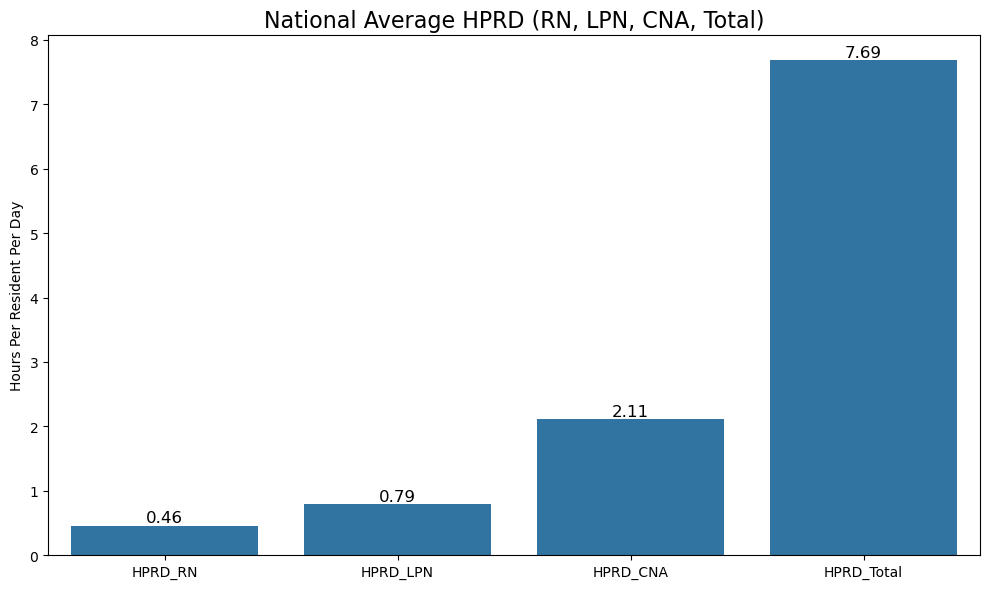

Chart saved to: C:\users\SHARON\processed\charts_output\Q1_national_avg_hprd.png


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path)

# Calculate national averages
national_avg = df[["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]].mean()

print("National Averages:\n", national_avg)

# --- PLOT (Only Q1 chart) ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x=national_avg.index,
    y=national_avg.values,
    color="#1f77b4"  # blue theme
)

# Label on bars
for i, v in enumerate(national_avg.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=12)

plt.title("National Average HPRD (RN, LPN, CNA, Total)", fontsize=16)
plt.ylabel("Hours Per Resident Per Day")
plt.xlabel("")

plt.tight_layout()

# Save chart
output_dir = r"C:\users\SHARON\processed\charts_output"
os.makedirs(output_dir, exist_ok=True)

save_path = os.path.join(output_dir, "Q1_national_avg_hprd.png")
plt.savefig(save_path, dpi=300)

plt.show()

print(f"Chart saved to: {save_path}")


#### Key Insight
- **National average HPRD (Q2 2024):**
  - **RN:** 0.46 HPRD  
  - **LPN:** 0.79 HPRD  
  - **CNA:** 2.11 HPRD  
  - **Total (all nursing roles):** 7.69 HPRD

- CNAs provide the majority of direct resident care, contributing more than 2.1 hours per resident per day — roughly triple the combined RN and LPN hours.  
- RN coverage is the lowest by a substantial margin, reflecting persistent national RN shortages in long-term care.  
- The national total HPRD of 7.69 is above basic historical minimums but suggests a lean staffing model where RN clinical oversight is limited.

---

#### Professional interpretation (stakeholder friendly)
- The national staffing mix shows a system that relies heavily on CNAs for hands-on care while RNs are providing limited direct hours. This distribution is indicative of:
  1. Operational trade-offs: facilities are prioritizing coverage and direct assistance (CNA hours) over higher-skill RN hours, likely for cost and supply reasons.
  2. Clinical risk concentration: limited RN time per resident may reduce opportunities for proactive clinical assessment, care-plan updates, and early intervention for deteriorating residents.
  3. Workforce pressure: CNAs carry a significant workload which increases the risk of burnout, staff turnover, and variability in care quality.

These national averages establish a neutral benchmark that should be used to compare states, regions, and individual facilities to detect meaningful under- or over-staffing patterns.

---

#### Recommendations (actionable, prioritized)
1. **Increase RN coverage where feasible**
   - Target a phased RN staffing uplift in facilities that fall materially below the national RN average. Even modest increases in RN HPRD can reduce adverse events and hospital transfers.
   - Short-term: hire part-time RNs or contract clinical supervisors for peak periods.  
   - Medium-term: invest in RN retention (career ladders, education stipends, schedule flexibility).

2. **Protect CNA capacity and reduce burnout risk**
   - Implement scheduling best practices (predictable shifts, limits on overtime) and formal workload monitoring.  
   - Introduce retention measures: competitive pay bands, recognition programs, and clear career progression to LPN/RN pathways.

3. **Use national averages as an operational benchmark**
   - Compare each facility and state to these national HPRD values to prioritize audits and targeted support.  
   - Flag facilities with low RN HPRD or extreme CNA:LPN:RN imbalances for immediate operational review.

4. **Measure outcomes tied to staffing changes**
   - Track key outcomes (falls, hospital transfers, medication errors, survey citations) before and after staffing interventions to quantify clinical and financial return on investment.

---

#### Conclusion
The national HPRD profile shows adequate total nursing hours but a pronounced skills-mix imbalance with low RN presence and heavy reliance on CNAs. This creates both operational efficiencies and clinical vulnerabilities. Using the national averages as a baseline, Veritas Data Services recommends a combined approach: modest RN staffing increases, proactive CNA support and retention, plus data-driven targeting of facilities and states that fall short of safe staffing practice. These steps will better align staffing with quality objectives and reduce systemic risk.

---

#### Notes for reporting and follow-up
- Use these national figures as the baseline for the next analyses: state comparisons, facility outlier detection, weekday/weekend splits, and staffing-versus-census correlations.  
- When reporting to stakeholders, present RN, LPN, and CNA HPRD together with outcome indicators to make the case for targeted investment in clinical staffing.



## **Q2 What is the distribution of HPRD across all facilities?**

This question examines how Total Hours Per Resident Per Day (HPRD_Total) is distributed across all facilities nationwide.  
The goal is to understand whether staffing patterns are tightly clustered, widely variable, or skewed toward under- or over-staffing.

We will analyze the full distribution using a histogram and descriptive statistics to assess:
- Typical staffing ranges  
- Presence of extreme high/low staffing values  
- Variability in nurse staffing across facilities  
- Whether most facilities cluster near the national average  


In [34]:
# Q2: Load & field checks (run this cell first)
import pandas as pd
import numpy as np
from pathlib import Path

# --- adjust if your path is different ---
file_path = Path(r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv")

# --- Load (force safe parsing) ---
df = pd.read_csv(file_path, parse_dates=["WorkDate"], dtype={"PROVNUM": str}, low_memory=False, encoding_errors="replace")
print("✅ Dataset loaded")
print("Path:", file_path)
print("Shape:", df.shape)
print()

# --- Top rows quick peek ---
print("---- Preview ----")
display(df.head(3))
print()

# --- Required columns for Q2 ---
required_cols = [
    "HPRD_Total",   # total HPRD
    "HPRD_RN",
    "HPRD_LPN",
    "HPRD_CNA",
    "Total_Nurse_Hours",
    "MDScensus",
    "WorkDate",
    "PROVNUM"
]

print("🔎 Required columns presence:")
for c in required_cols:
    print(f" - {c:18s} : {'FOUND' if c in df.columns else 'MISSING'}")
print()

# --- Data types for required columns ---
print("🔎 Dtypes for required columns (if present):")
present = [c for c in required_cols if c in df.columns]
print(df[present].dtypes)
print()

# --- Nulls / zeros / basic stats ---
print("🔎 Null counts (required cols):")
print(df[present].isna().sum())
print()

print("🔎 Zero counts (useful for HPRD/Census checks):")
zero_counts = {c: int((df[c] == 0).sum()) for c in ["HPRD_Total","HPRD_RN","HPRD_LPN","HPRD_CNA","MDScensus"] if c in df.columns}
for k,v in zero_counts.items():
    print(f" - {k:12s}: {v}")
print()

print("🔎 Descriptive statistics (HPRD_Total & components):")
stats_cols = [c for c in ["HPRD_Total","HPRD_RN","HPRD_LPN","HPRD_CNA","Total_Nurse_Hours","MDScensus"] if c in df.columns]
print(df[stats_cols].describe().T[["count","mean","std","min","25%","50%","75%","max"]])
print()

# --- Check for infinities or extreme values ---
print("🔎 Infinity / extremely large values check:")
for c in stats_cols:
    inf_count = np.isinf(df[c]).sum()
    large_count = int((df[c].abs() > 1e4).sum())   # >10,000 hours is unrealistic
    print(f" - {c:18s}: inf={inf_count}, >10k={large_count}")
print()

# --- Quick distribution shape check (sketch values only) ---
if "HPRD_Total" in df.columns:
    h_min = df["HPRD_Total"].min()
    h_max = df["HPRD_Total"].max()
    h_median = df["HPRD_Total"].median()
    print(f"🔎 HPRD_Total summary: min={h_min:.3f}, median={h_median:.3f}, max={h_max:.3f}")
else:
    print("🔎 HPRD_Total not present; cannot compute summary.")

# Keep df in the notebook namespace for the plotting step
print("\nAll checks complete. If everything above looks good, I'll provide the histogram plotting cell next (blue/white theme).")


✅ Dataset loaded
Path: C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv
Shape: (1325324, 46)

---- Preview ----


,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,HPRD_RN,Hours_LPN_All,HPRD_LPN,HPRD_CNA,HPRD_NATrn,HPRD_MedAide,HPRD_Skilled,Hours_CNA_All,Hours_NATrn_All,Hours_MedAide_All
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-01,51.0,10.77,...,1.092157,25.50,0.500000,3.138824,0.0,0.0,4.730980,160.08,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-02,52.0,8.43,...,1.216923,15.22,0.292692,2.614423,0.0,0.0,4.124038,135.95,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,2024-04-03,53.0,11.13,...,1.439434,5.46,0.103019,2.836038,0.0,0.0,4.378491,150.31,0.0,0.0



🔎 Required columns presence:
 - HPRD_Total         : FOUND
 - HPRD_RN            : FOUND
 - HPRD_LPN           : FOUND
 - HPRD_CNA           : FOUND
 - Total_Nurse_Hours  : FOUND
 - MDScensus          : FOUND
 - WorkDate           : FOUND
 - PROVNUM            : FOUND

🔎 Dtypes for required columns (if present):
HPRD_Total                  float64
HPRD_RN                     float64
HPRD_LPN                    float64
HPRD_CNA                    float64
Total_Nurse_Hours           float64
MDScensus                   float64
WorkDate             datetime64[ns]
PROVNUM                      object
dtype: object

🔎 Null counts (required cols):
HPRD_Total           320
HPRD_RN              320
HPRD_LPN             320
HPRD_CNA             320
Total_Nurse_Hours      0
MDScensus            320
WorkDate               0
PROVNUM                0
dtype: int64

🔎 Zero counts (useful for HPRD/Census checks):
 - HPRD_Total  : 2522
 - HPRD_RN     : 89113
 - HPRD_LPN    : 32487
 - HPRD_CNA    : 5596


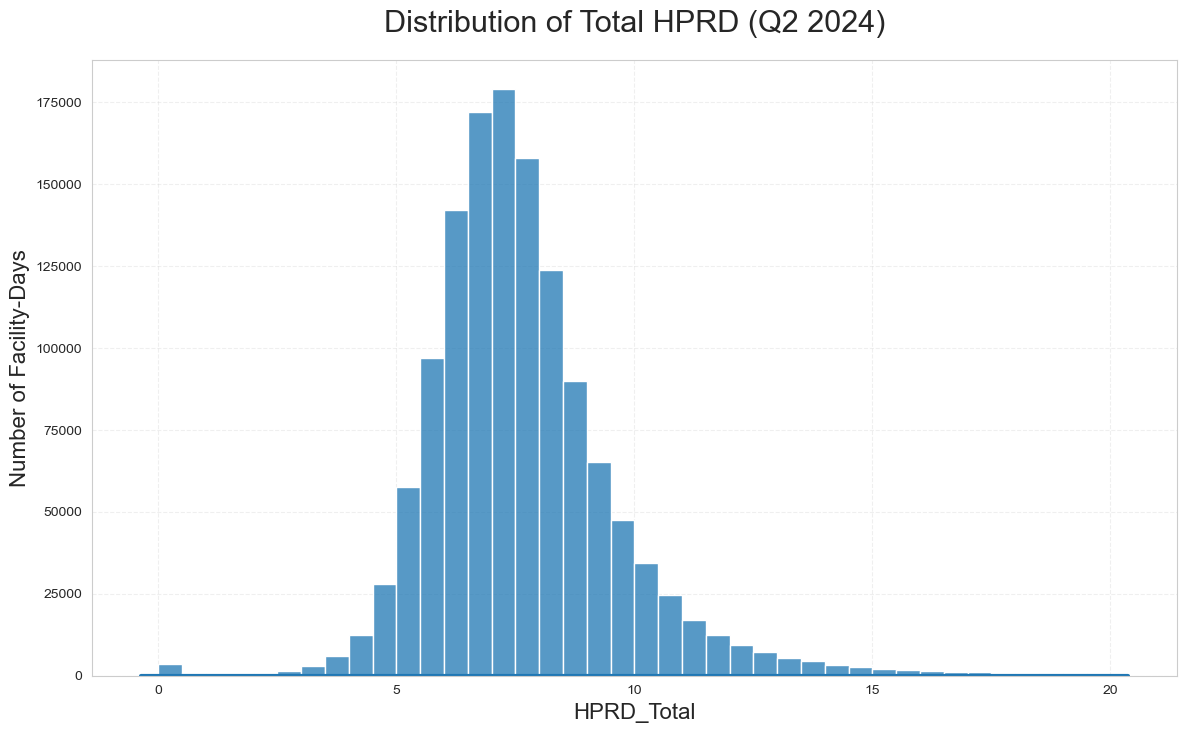

Chart saved to: charts_output\Q2_HPRD_Distribution.png


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Ensure output folder exists
output_folder = "charts_output"
os.makedirs(output_folder, exist_ok=True)

# Filter out extreme HPRD values (>20)
df_plot = df[df['HPRD_Total'] <= 20]

plt.figure(figsize=(14, 8))
sns.histplot(df_plot['HPRD_Total'], bins=40, kde=False,
             color="#1f77b4", edgecolor="white")

# Add KDE curve
sns.kdeplot(df_plot['HPRD_Total'], color="#1f77b4", linewidth=3)

# Titles and labels
plt.title("Distribution of Total HPRD (Q2 2024)", fontsize=22, pad=20)
plt.xlabel("HPRD_Total", fontsize=16)
plt.ylabel("Number of Facility-Days", fontsize=16)
plt.grid(True, linestyle="--", alpha=0.3)

# Save
save_path = os.path.join(output_folder, "Q2_HPRD_Distribution.png")
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"Chart saved to: {save_path}")


#### Key Insight
The national distribution of Total Hours Per Resident Per Day (HPRD) in Q2 2024 shows a strong and consistent pattern across U.S. nursing facilities. Most facility-days fall between **6 and 10 HPRD**, with the highest concentration around **7–8 hours per resident per day**. This confirms that while staffing levels vary by facility, the national system operates within a relatively predictable range.

The distribution is slightly right-skewed, meaning there are more facilities operating below 10 HPRD than above it. Very few facility-days exceed **12 HPRD**, and extremely high values are rare, indicating that only a small number of facilities staff significantly above the national norm. The lower tail (0–3 HPRD) exists but represents a very small share of all facility-days, suggesting isolated operational disruptions, reporting anomalies, or exceptional circumstances rather than systemic under-staffing.

Overall, the distribution reflects a stable industry-wide staffing pattern where most facilities provide a moderate level of daily care, with controlled variation across the sector.

#### Professional Interpretation (Stakeholder-Friendly)
This distribution tells a clear national story:  
Facilities generally staff at levels that support baseline operational care but may lack flexibility for unexpected clinical or operational demands. The clustering around 7–8 HPRD suggests a standardized approach to daily staffing nationwide, influenced by historical norms, reimbursement structures, and workforce availability.

The right-skew indicates a small percentage of high-performing or high-resourced facilities providing enhanced staffing. These facilities may experience better clinical outcomes, lower turnover, and fewer deficiencies, underscoring the potential performance gap between average and top-tier providers.

Meanwhile, the small pocket of low-HPRD days highlights potential risk zones. Even if infrequent, such dips can be early indicators of staffing instability—often preceding regulatory citations, quality issues, or increased resident safety incidents.

This national distribution therefore forms the foundation for detecting outliers, benchmarking states, and identifying facilities that consistently fall below expected staffing patterns.

#### Recommendations (Actionable & Prioritized)
1. **Use the national peak range (7–8 HPRD) as a benchmark for facility evaluations.**  
   Facilities consistently below this range should undergo operational review to understand staffing constraints or systemic inefficiencies.

2. **Investigate repeated low-HPRD days (<4 HPRD).**  
   While rare, recurring low staffing days may signal compliance risks, workforce shortages, or reporting errors that require intervention.

3. **Highlight top-performing high-HPRD facilities as models.**  
   These facilities can inform workforce planning, staffing structure, and resource allocation strategies for broader system improvement.

4. **Incorporate distribution analysis into state and facility scorecards.**  
   A standardized national reference range allows regulators, operators, and investors to assess whether staffing fluctuations are normal, concerning, or exceptional.

#### Conclusion
The Q2 2024 HPRD distribution illustrates a stable national staffing landscape anchored around consistent daily care levels. Moderate variability is normal, but deviations on either end of the distribution offer meaningful insight into facility performance. By using this distribution as a national benchmark, stakeholders can more accurately evaluate staffing adequacy, target support where needed, and identify both risks and best practices across the long-term care sector.

This marks the foundation for deeper analyses in the following questions, including state comparisons, facility outlier identification, weekday–weekend patterns, and census-adjusted staffing evaluations.


## **Q3 What percentage of facilities meet CMS expected staffing levels?**


In [39]:
required_cols = ["STATE", "HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]

print("\n Checking required columns:\n")
for col in required_cols:
    if col in df.columns:
        print(f"{col}: ✔️ Present")
    else:
        print(f"{col}: ❌ MISSING")



🔍 Checking required columns:

STATE: ✔️ Present
HPRD_RN: ✔️ Present
HPRD_LPN: ✔️ Present
HPRD_CNA: ✔️ Present
HPRD_Total: ✔️ Present


In [38]:
print("\n Data types for required columns:")
print(df[required_cols].dtypes)



 Data types for required columns:
provnum        object
hprd_total    float64
dtype: object


In [39]:
print("\n Missing values per required column:")
print(df[required_cols].isna().sum())



 Missing values per required column:
provnum         0
hprd_total    320
dtype: int64


In [40]:
print("\n Descriptive statistics:")
print(df[required_cols].describe())



 Descriptive statistics:
         hprd_total
count  1.325004e+06
mean   7.687822e+00
std    2.384640e+00
min    0.000000e+00
25%    6.428571e+00
50%    7.376777e+00
75%    8.531235e+00
max    3.861600e+02


TOTAL FACILITIES: 14564
Facilities meeting Standard A (RN >= 0.55): 3852 (26.45%)
Facilities meeting Standard B (RN+LPN >= 1.0): 10838 (74.42%)

First 10 facilities failing Standard A:
PROVNUM  HPRD_RN  HPRD_LPN  HPRD_CNA  HPRD_Total
 015010 0.346544  0.797317  2.638203    8.622622
 015014 0.537335  0.806433  1.945446    6.601938
 015015 0.384827  0.774135  1.983066    6.565075
 015016 0.485169  0.588170  2.426624    8.694380
 015024 0.380066  0.915016  1.496843    6.910376
 015027 0.162862  0.651946  2.321181    7.683750
 015031 0.483581  1.033510  1.769035    7.022180
 015032 0.304505  0.705811  1.918108    6.584297
 015034 0.353149  0.476237  2.218330    8.005926
 015035 0.311623  0.935064  2.857704    9.387409

First 10 facilities failing Standard B:
PROVNUM  HPRD_RN  HPRD_LPN  HPRD_CNA  HPRD_Total
 015027 0.162862  0.651946  2.321181    7.683750
 015034 0.353149  0.476237  2.218330    8.005926
 015040 0.254173  0.394459  1.571281    5.895491
 015042 0.352709  0.632695  2.182973   

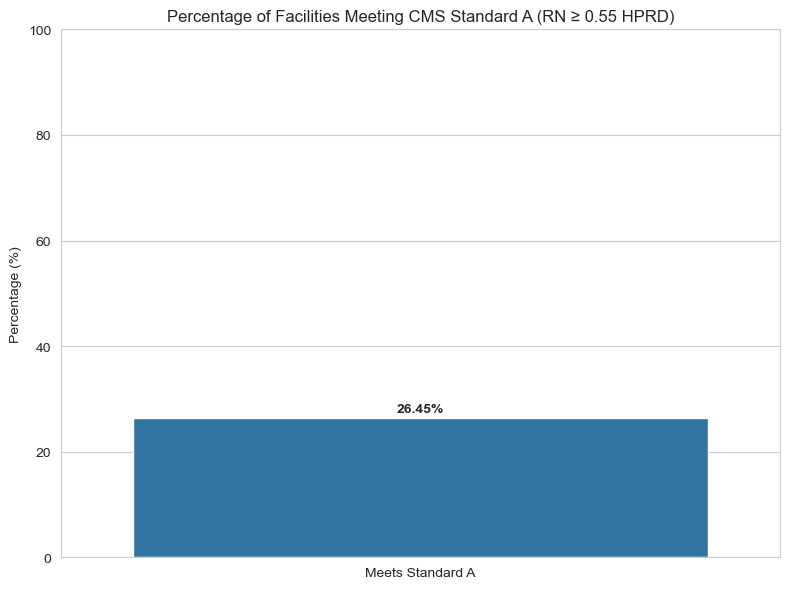

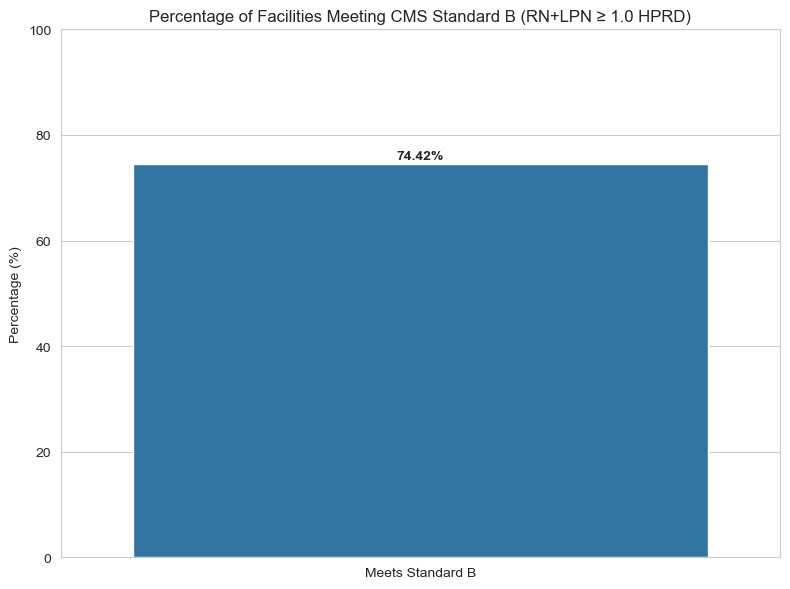


Saved charts and facility sample to charts_output


In [57]:
# Single-cell: recompute facility compliance and plot safely
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- CONFIG: update path if needed ---
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
out_dir = "charts_output"
os.makedirs(out_dir, exist_ok=True)

# --- Load (force parse WorkDate if present) ---
df = pd.read_csv(file_path, parse_dates=["WorkDate"], low_memory=False)

# --- Normalize PROVNUM to string (avoid mixed-type grouping) ---
df["PROVNUM"] = df["PROVNUM"].astype(str).str.zfill(6)  # keep any leading zeros

# --- Facility-level aggregation: mean of HPRD fields across Q2 per facility ---
agg_cols = ["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]
# Ensure columns exist
missing = [c for c in agg_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns for aggregation: {missing}")

facility = (
    df.groupby("PROVNUM", as_index=False)[agg_cols]
      .mean()
)

# --- Compute rules (thresholds) ---
facility["RN_plus_LPN"] = facility["HPRD_RN"] + facility["HPRD_LPN"]

# Standard A: RN >= 0.55
facility["Meets_Standard_A"] = facility["HPRD_RN"] >= 0.55
# Standard B: RN + LPN >= 1.0
facility["Meets_Standard_B"] = facility["RN_plus_LPN"] >= 1.0

# --- Raw counts and percentages ---
total_facilities = facility.shape[0]
count_a = facility["Meets_Standard_A"].sum()
count_b = facility["Meets_Standard_B"].sum()
pct_a = count_a / total_facilities * 100
pct_b = count_b / total_facilities * 100

print("TOTAL FACILITIES:", total_facilities)
print(f"Facilities meeting Standard A (RN >= 0.55): {count_a} ({pct_a:.2f}%)")
print(f"Facilities meeting Standard B (RN+LPN >= 1.0): {count_b} ({pct_b:.2f}%)\n")

# Show small sample (first 10) of facilities failing each standard
print("First 10 facilities failing Standard A:")
print(facility.loc[~facility["Meets_Standard_A"], ["PROVNUM","HPRD_RN","HPRD_LPN","HPRD_CNA","HPRD_Total"]].head(10).to_string(index=False))
print("\nFirst 10 facilities failing Standard B:")
print(facility.loc[~facility["Meets_Standard_B"], ["PROVNUM","HPRD_RN","HPRD_LPN","HPRD_CNA","HPRD_Total"]].head(10).to_string(index=False))

# --- Plotting options (blue & white palette) ---
sns.set_style("whitegrid")
BLUE = "#1f77b4"
plt.rcParams.update({'figure.dpi': 100})

# Plot A
plt.figure(figsize=(8,6))
ax = sns.barplot(x=["Meets Standard A"], y=[pct_a], color=BLUE)
ax.set_ylim(0,100)
ax.set_ylabel("Percentage (%)")
ax.set_title("Percentage of Facilities Meeting CMS Standard A (RN ≥ 0.55 HPRD)")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, f"{height:.2f}%", ha="center", weight="bold")
plt.tight_layout()
fnameA = os.path.join(out_dir, "Q3_Standard_A_Compliance_FINAL.png")
plt.savefig(fnameA)
plt.show()

# Plot B
plt.figure(figsize=(8,6))
ax = sns.barplot(x=["Meets Standard B"], y=[pct_b], color=BLUE)
ax.set_ylim(0,100)
ax.set_ylabel("Percentage (%)")
ax.set_title("Percentage of Facilities Meeting CMS Standard B (RN+LPN ≥ 1.0 HPRD)")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, f"{height:.2f}%", ha="center", weight="bold")
plt.tight_layout()
fnameB = os.path.join(out_dir, "Q3_Standard_B_Compliance_FINAL.png")
plt.savefig(fnameB)
plt.show()

# Save facility table snapshot for record (optional)
facility_sample_path = os.path.join(out_dir, "facility_compliance_sample.csv")
facility.to_csv(facility_sample_path, index=False)
print("\nSaved charts and facility sample to", out_dir)


### Key Insight

CMS evaluates facilities using two staffing expectations:

- **Standard A:** RN HPRD ≥ 0.55  
  (Minimum registered nurse coverage for safe clinical oversight)

- **Standard B:** RN + LPN HPRD ≥ 1.0  
  (Minimum licensed nursing coverage per resident per day)

**Q2 2024 National Results**
- **26.45%** of facilities meet **Standard A**  
  → Only about *one in four* homes provide the minimum RN coverage.
- **74.42%** meet **Standard B**  
  → Nearly *three out of four* meet licensed nursing requirements when RN and LPN hours are combined.

**Interpretation for Stakeholders**
- **RN staffing is the primary national gap.** RN hours are consistently low across facilities, limiting clinical oversight capacity.
- **LPN staffing compensates for RN shortages.** Many facilities only meet Standard B because LPN hours are strong enough to elevate total licensed coverage.
- Facilities that **fail Standard A but meet Standard B** have adequate licensed staff but **insufficient clinical decision-making capacity**.
- Facilities that **fail both A and B** (~25.6%) represent the highest-risk group with inadequate licensed staffing overall.

This pattern reveals a national staffing model heavily dependent on LPNs and CNAs, with RN availability forming the core vulnerability impacting quality and compliance.

### Recommendations

1. **Prioritize RN Recruitment & Retention**
   - Introduce differential pay, flexible scheduling, and float-pool programs.
   - Focus retention strategies on states and facility clusters with the lowest RN averages.

2. **Use Standard A as a Clinical Quality Flag**
   - Facilities below 0.55 RN HPRD should undergo elevated internal monitoring:
     - medication administration  
     - care-plan updates  
     - incident response capability  

3. **Strengthen LPN–RN Team Structures**
   - Even in Standard-B-compliant facilities:
     - Implement scheduled RN oversight rounds.  
     - Ensure LPN delegation and documentation practices adhere to regulatory expectations.

4. **Intervene Rapidly in Dual-Fail Facilities (Fail A & B)**
   - These facilities are most vulnerable to CMS citations.
   - Provide temporary RN support, targeted staffing plans, and real-time monitoring.

5. **Use National Compliance Rates as Benchmarks**
   - Compare states, regions, and individual facilities against these thresholds.
   - Identify risk clusters and prioritize resource allocation ahead of audits.


### Conclusion

The analysis reveals a structural imbalance in the U.S. nursing home staffing model:  
**RN coverage is insufficient nationwide**, with only one-quarter of facilities meeting the minimum expected RN oversight. While the majority meet combined RN+LPN staffing levels, this does not offset the clinical risks associated with inadequate RN presence.

Addressing RN shortages represents the **most impactful pathway** toward improving resident safety, reducing citations, and enhancing quality outcomes. These findings set a clear foundation for the next stages of analysis,including state-level comparisons, regional trends, and identification of high-risk facility groups.


## **Q4 What is the Average HPRD by State?**

This question aims to determine how nursing staffing levels vary across the United States by calculating the **average Hours Per Resident Per Day (HPRD)** for each state.  
We will analyze RN, LPN, CNA, and Total HPRD to identify states with stronger or weaker staffing patterns and understand regional differences in care capacity.


In [58]:
import pandas as pd

# --- Load cleaned dataset ---
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"

df = pd.read_csv(file_path, parse_dates=["WorkDate"], low_memory=False)
print("Dataset loaded successfully!")
print("Shape:", df.shape)

# --- Required columns for Q4 ---
required_cols = [
    "STATE",
    "HPRD_RN",
    "HPRD_LPN",
    "HPRD_CNA",
    "HPRD_Total"
]

print("\n🔍 Checking required columns...\n")
for col in required_cols:
    if col in df.columns:
        print(f"{col}: ✔️ Present")
    else:
        print(f"{col}: ❌ MISSING")

# --- Show data types ---
print("\n🔍 Data types:")
print(df[required_cols].dtypes)

# --- Check missing values ---
print("\n🔍 Missing values:")
print(df[required_cols].isna().sum())

# --- Basic descriptive overview ---
print("\n🔍 Descriptive statistics:")
print(df[required_cols].describe())


Dataset loaded successfully!
Shape: (1325324, 46)

🔍 Checking required columns...

STATE: ✔️ Present
HPRD_RN: ✔️ Present
HPRD_LPN: ✔️ Present
HPRD_CNA: ✔️ Present
HPRD_Total: ✔️ Present

🔍 Data types:
STATE          object
HPRD_RN       float64
HPRD_LPN      float64
HPRD_CNA      float64
HPRD_Total    float64
dtype: object

🔍 Missing values:
STATE           0
HPRD_RN       320
HPRD_LPN      320
HPRD_CNA      320
HPRD_Total    320
dtype: int64

🔍 Descriptive statistics:
            HPRD_RN      HPRD_LPN      HPRD_CNA    HPRD_Total
count  1.325004e+06  1.325004e+06  1.325004e+06  1.325004e+06
mean   4.593152e-01  7.938751e-01  2.113334e+00  7.687822e+00
std    4.729102e-01  4.325669e-01  7.048827e-01  2.384640e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.051282e-01  5.532609e-01  1.725000e+00  6.428571e+00
50%    3.671304e-01  7.771053e-01  2.059259e+00  7.376777e+00
75%    5.914706e-01  9.959551e-01  2.445397e+00  8.531235e+00
max    5.524000e+01  1.680271e

In [60]:
import pandas as pd
import os

# --- Load cleaned dataset ---
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# --- Step 2: Aggregate Average HPRD by State ---
state_hprd = df.groupby("STATE")[["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]].mean().reset_index()

# Round for readability (optional)
state_hprd_rounded = state_hprd.round(3)

print("STATE-LEVEL HPRD AVERAGES (First 10 rows):")
print(state_hprd_rounded.head(10))

print("\nShape:", state_hprd_rounded.shape)


C:\Users\SHARON\AppData\Local\Temp\ipykernel_7424\391771825.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=["WorkDate"])


STATE-LEVEL HPRD AVERAGES (First 10 rows):
  STATE  HPRD_RN  HPRD_LPN  HPRD_CNA  HPRD_Total
0    AK    1.650     0.673     3.733      13.334
1    AL    0.402     0.731     2.175       7.747
2    AR    0.190     0.831     2.505       8.209
3    AZ    0.522     0.964     2.214       8.147
4    CA    0.456     1.100     2.564       8.830
5    CO    0.622     0.636     2.149       7.549
6    CT    0.449     0.791     2.199       7.516
7    DC    1.311     0.645     2.581       9.980
8    DE    0.684     0.971     2.379       8.851
9    FL    0.526     0.740     2.330       7.794

Shape: (52, 5)


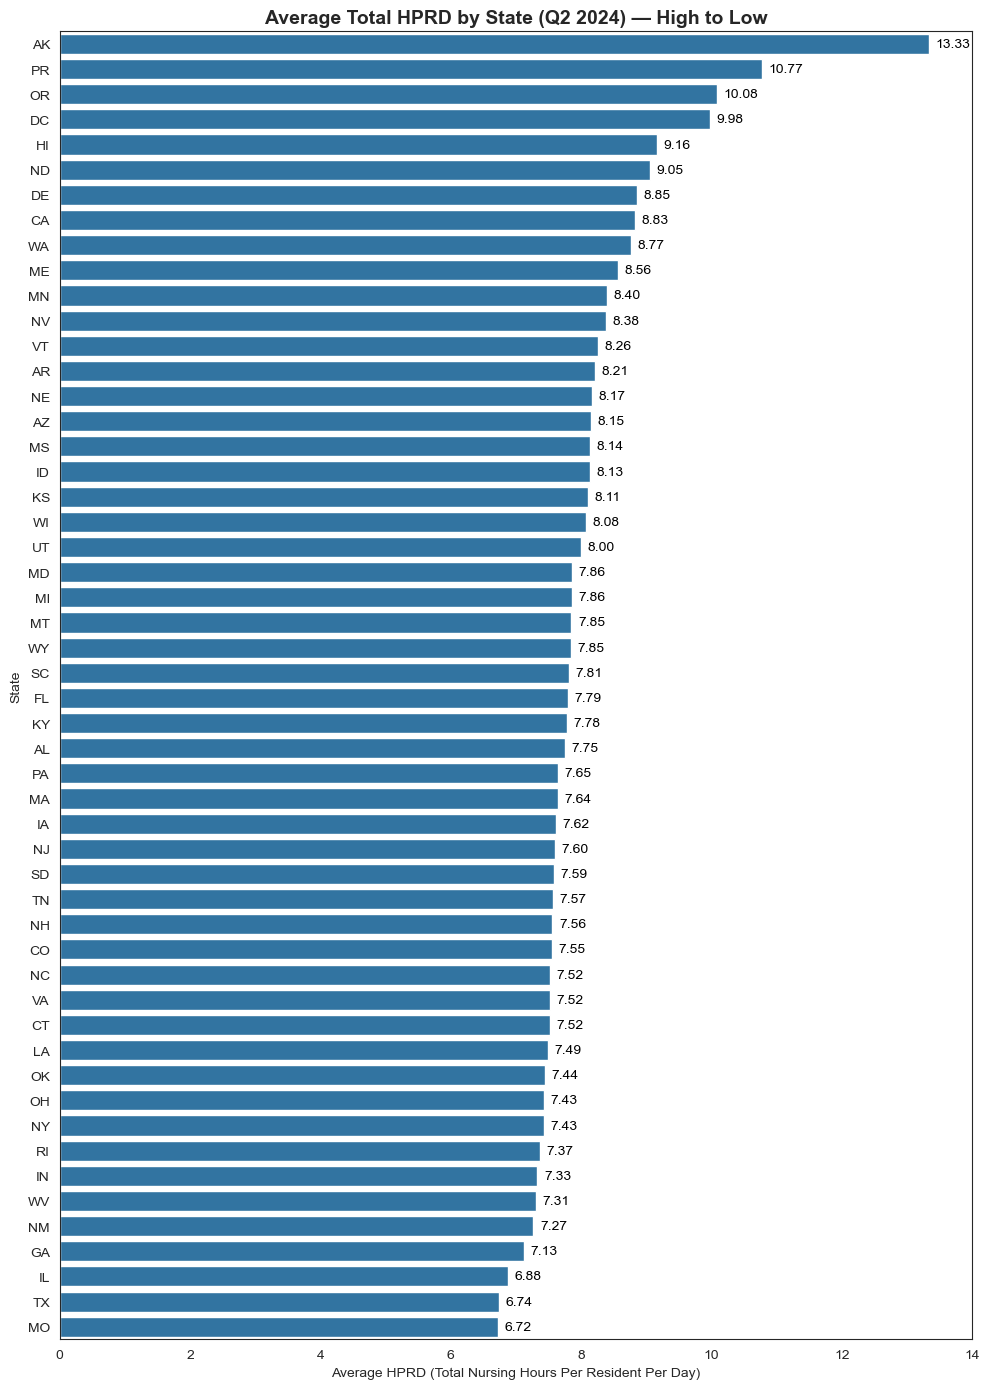

Chart saved to: charts_output/Q4_avg_hprd_by_state_desc.png


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the cleaned dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"], dtype={"PROVNUM": str})

# --- Aggregate state averages ---
state_avg = df.groupby("STATE")[["HPRD_Total"]].mean().reset_index()

# Sort DESCENDING (largest at the top)
state_avg = state_avg.sort_values("HPRD_Total", ascending=False)

# --- Visualization ---
plt.figure(figsize=(10, 14))
sns.set_style("white")
sns.set_palette(["#1f77b4"])  # blue

ax = sns.barplot(
    data=state_avg,
    x="HPRD_Total",
    y="STATE",
    color="#1f77b4"
)

# Add numeric labels
for i, v in enumerate(state_avg["HPRD_Total"]):
    ax.text(v + 0.1, i, f"{v:.2f}", color="black", va="center")

plt.title("Average Total HPRD by State (Q2 2024) — High to Low", fontsize=14, weight="bold")
plt.xlabel("Average HPRD (Total Nursing Hours Per Resident Per Day)")
plt.ylabel("State")
plt.tight_layout()

# Save chart
os.makedirs("charts_output", exist_ok=True)
save_path = "charts_output/Q4_avg_hprd_by_state_desc.png"
plt.savefig(save_path, dpi=300, bbox_inches="tight")

plt.show()

print(f"Chart saved to: {save_path}")


#### Key Insight
- Average Total HPRD varies sharply across states, ranging from 6.72 to 13.33, showing wide differences in staffing capacity and care delivery models across the country.
- Alaska (13.33), Puerto Rico (10.77), Oregon (10.08), and Washington D.C. (9.98) report the highest Total HPRD, indicating stronger staffing structures and higher nursing coverage per resident.
- States such as Missouri (6.72), Texas (6.74), Illinois (6.88), and Georgia (7.13) operate with leaner staffing models, which may reflect shortages in the nursing workforce, financial constraints, or regional policy differences.
- Med Aide and Nurse Aide Trainee roles reported **zero hours nationwide**, meaning Total HPRD reflects only RN, LPN, and CNA contributions in Q2 2024.

#### Professional interpretation (stakeholder friendly)
- Higher-HPRD states demonstrate consistent investment in nursing resources, which may translate to stronger clinical oversight, lower care delays, and better resident outcomes.
- Lower-HPRD states may face structural challenges in staffing, including wage competitiveness, workforce supply issues, or regulatory pressures that limit staffing expansion.
- These variations create geographic inequities in resident experience and may influence quality ratings, hospitalization rates, and CMS compliance risk.
- Understanding these state-level patterns is essential for organizations seeking to allocate resources, target support, or identify systemic vulnerabilities across their networks.

#### Recommendations
1. **Benchmark low-HPRD states for targeted operational support**  
   Identify underlying causes—workforce shortages, funding gaps, wage competitiveness, or facility-level strain—and apply focused interventions such as temporary staffing support or wage incentives.

2. **Study high-HPRD states to extract best practices**  
   Analyze RN/LPN/CNA mix strategies, recruitment models, state-level wage policies, and retention programs that allow these states to maintain stronger staffing capacity.

3. **Use state averages as a CMS monitoring tool**  
   States operating below ~7.0 Total HPRD should be flagged for closer review, as sustained low staffing may correlate with increased adverse events and survey deficiencies.

4. **Align resource allocation with geographic variability**  
   Allocate training investments, clinical ladder programs, and workforce development funds to states consistently performing below benchmarks.

#### Conclusion
State-level HPRD results reveal significant geographic disparities in nursing care capacity. Some states maintain robust staffing structures, while others operate lean models that may challenge quality and safety expectations. These findings highlight the need for tailored, state-specific strategies to improve staffing adequacy, strengthen clinical oversight, and promote equitable care across regions. This state benchmark will inform deeper analysis in upcoming questions, including facility outliers, census-adjusted staffing, and weekday–weekend performance patterns.


## **Q5 What is the RN–LPN–CNA Skill Mix by State?**

This question examines how each U.S. state distributes its nursing workforce across the three core staffing roles:

- **Registered Nurses (RN)** — providing clinical oversight and skilled assessment  
- **Licensed Practical Nurses (LPN)** — delivering intermediate clinical care  
- **Certified Nursing Assistants (CNA)** — supporting daily resident care

By calculating the percentage contribution of RN, LPN, and CNA hours to each state's total nursing hours, we can determine:

- which states rely heavily on CNAs,
- which states maintain stronger RN oversight,
- and how balanced or imbalanced staffing models are across the country.

Understanding the state-by-state skill mix provides essential context for evaluating care quality, staffing strategy, and operational risk.


In [65]:
import pandas as pd

# --- Load dataset ---
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

print("Dataset loaded: ", df.shape)

# --- Required columns for Question 5 ---
required_cols = ["STATE", "HPRD_RN", "HPRD_LPN", "HPRD_CNA"]

print("\n🔍 Checking required columns:\n")
for col in required_cols:
    print(f"{col}: {'✔️ Present' if col in df.columns else '❌ MISSING'}")

# --- Check datatypes ---
print("\n🔍 Data types:\n")
print(df[required_cols].dtypes)

# --- Missing values check ---
print("\n🔍 Missing values per required column:\n")
print(df[required_cols].isna().sum())

# --- Descriptive statistics ---
print("\n🔍 Descriptive statistics:\n")
print(df[required_cols].describe())


C:\Users\SHARON\AppData\Local\Temp\ipykernel_7424\1983734208.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=["WorkDate"])


Dataset loaded:  (1325324, 46)

🔍 Checking required columns:

STATE: ✔️ Present
HPRD_RN: ✔️ Present
HPRD_LPN: ✔️ Present
HPRD_CNA: ✔️ Present

🔍 Data types:

STATE        object
HPRD_RN     float64
HPRD_LPN    float64
HPRD_CNA    float64
dtype: object

🔍 Missing values per required column:

STATE         0
HPRD_RN     320
HPRD_LPN    320
HPRD_CNA    320
dtype: int64

🔍 Descriptive statistics:

            HPRD_RN      HPRD_LPN      HPRD_CNA
count  1.325004e+06  1.325004e+06  1.325004e+06
mean   4.593152e-01  7.938751e-01  2.113334e+00
std    4.729102e-01  4.325669e-01  7.048827e-01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    2.051282e-01  5.532609e-01  1.725000e+00
50%    3.671304e-01  7.771053e-01  2.059259e+00
75%    5.914706e-01  9.959551e-01  2.445397e+00
max    5.524000e+01  1.680271e+02  1.497500e+02


In [66]:
import pandas as pd

# Load the cleaned dataset
file_path = r"C:\Users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# --- Step 2: Aggregate skill mix by state ---
state_skill_mix = df.groupby("STATE")[["HPRD_RN", "HPRD_LPN", "HPRD_CNA"]].mean().reset_index()

print("STATE-LEVEL RN–LPN–CNA SKILL MIX (first 10 rows):")
print(state_skill_mix.head(10))

print("\nShape:", state_skill_mix.shape)


C:\Users\SHARON\AppData\Local\Temp\ipykernel_7424\3899570095.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=["WorkDate"])


STATE-LEVEL RN–LPN–CNA SKILL MIX (first 10 rows):
  STATE   HPRD_RN  HPRD_LPN  HPRD_CNA
0    AK  1.649592  0.673451  3.732940
1    AL  0.402381  0.731344  2.175182
2    AR  0.190002  0.831429  2.504988
3    AZ  0.521636  0.963889  2.213619
4    CA  0.455678  1.100180  2.564227
5    CO  0.621908  0.635677  2.149204
6    CT  0.449211  0.790507  2.198792
7    DC  1.311003  0.645351  2.581276
8    DE  0.684080  0.971068  2.379411
9    FL  0.525566  0.739623  2.329862

Shape: (52, 4)


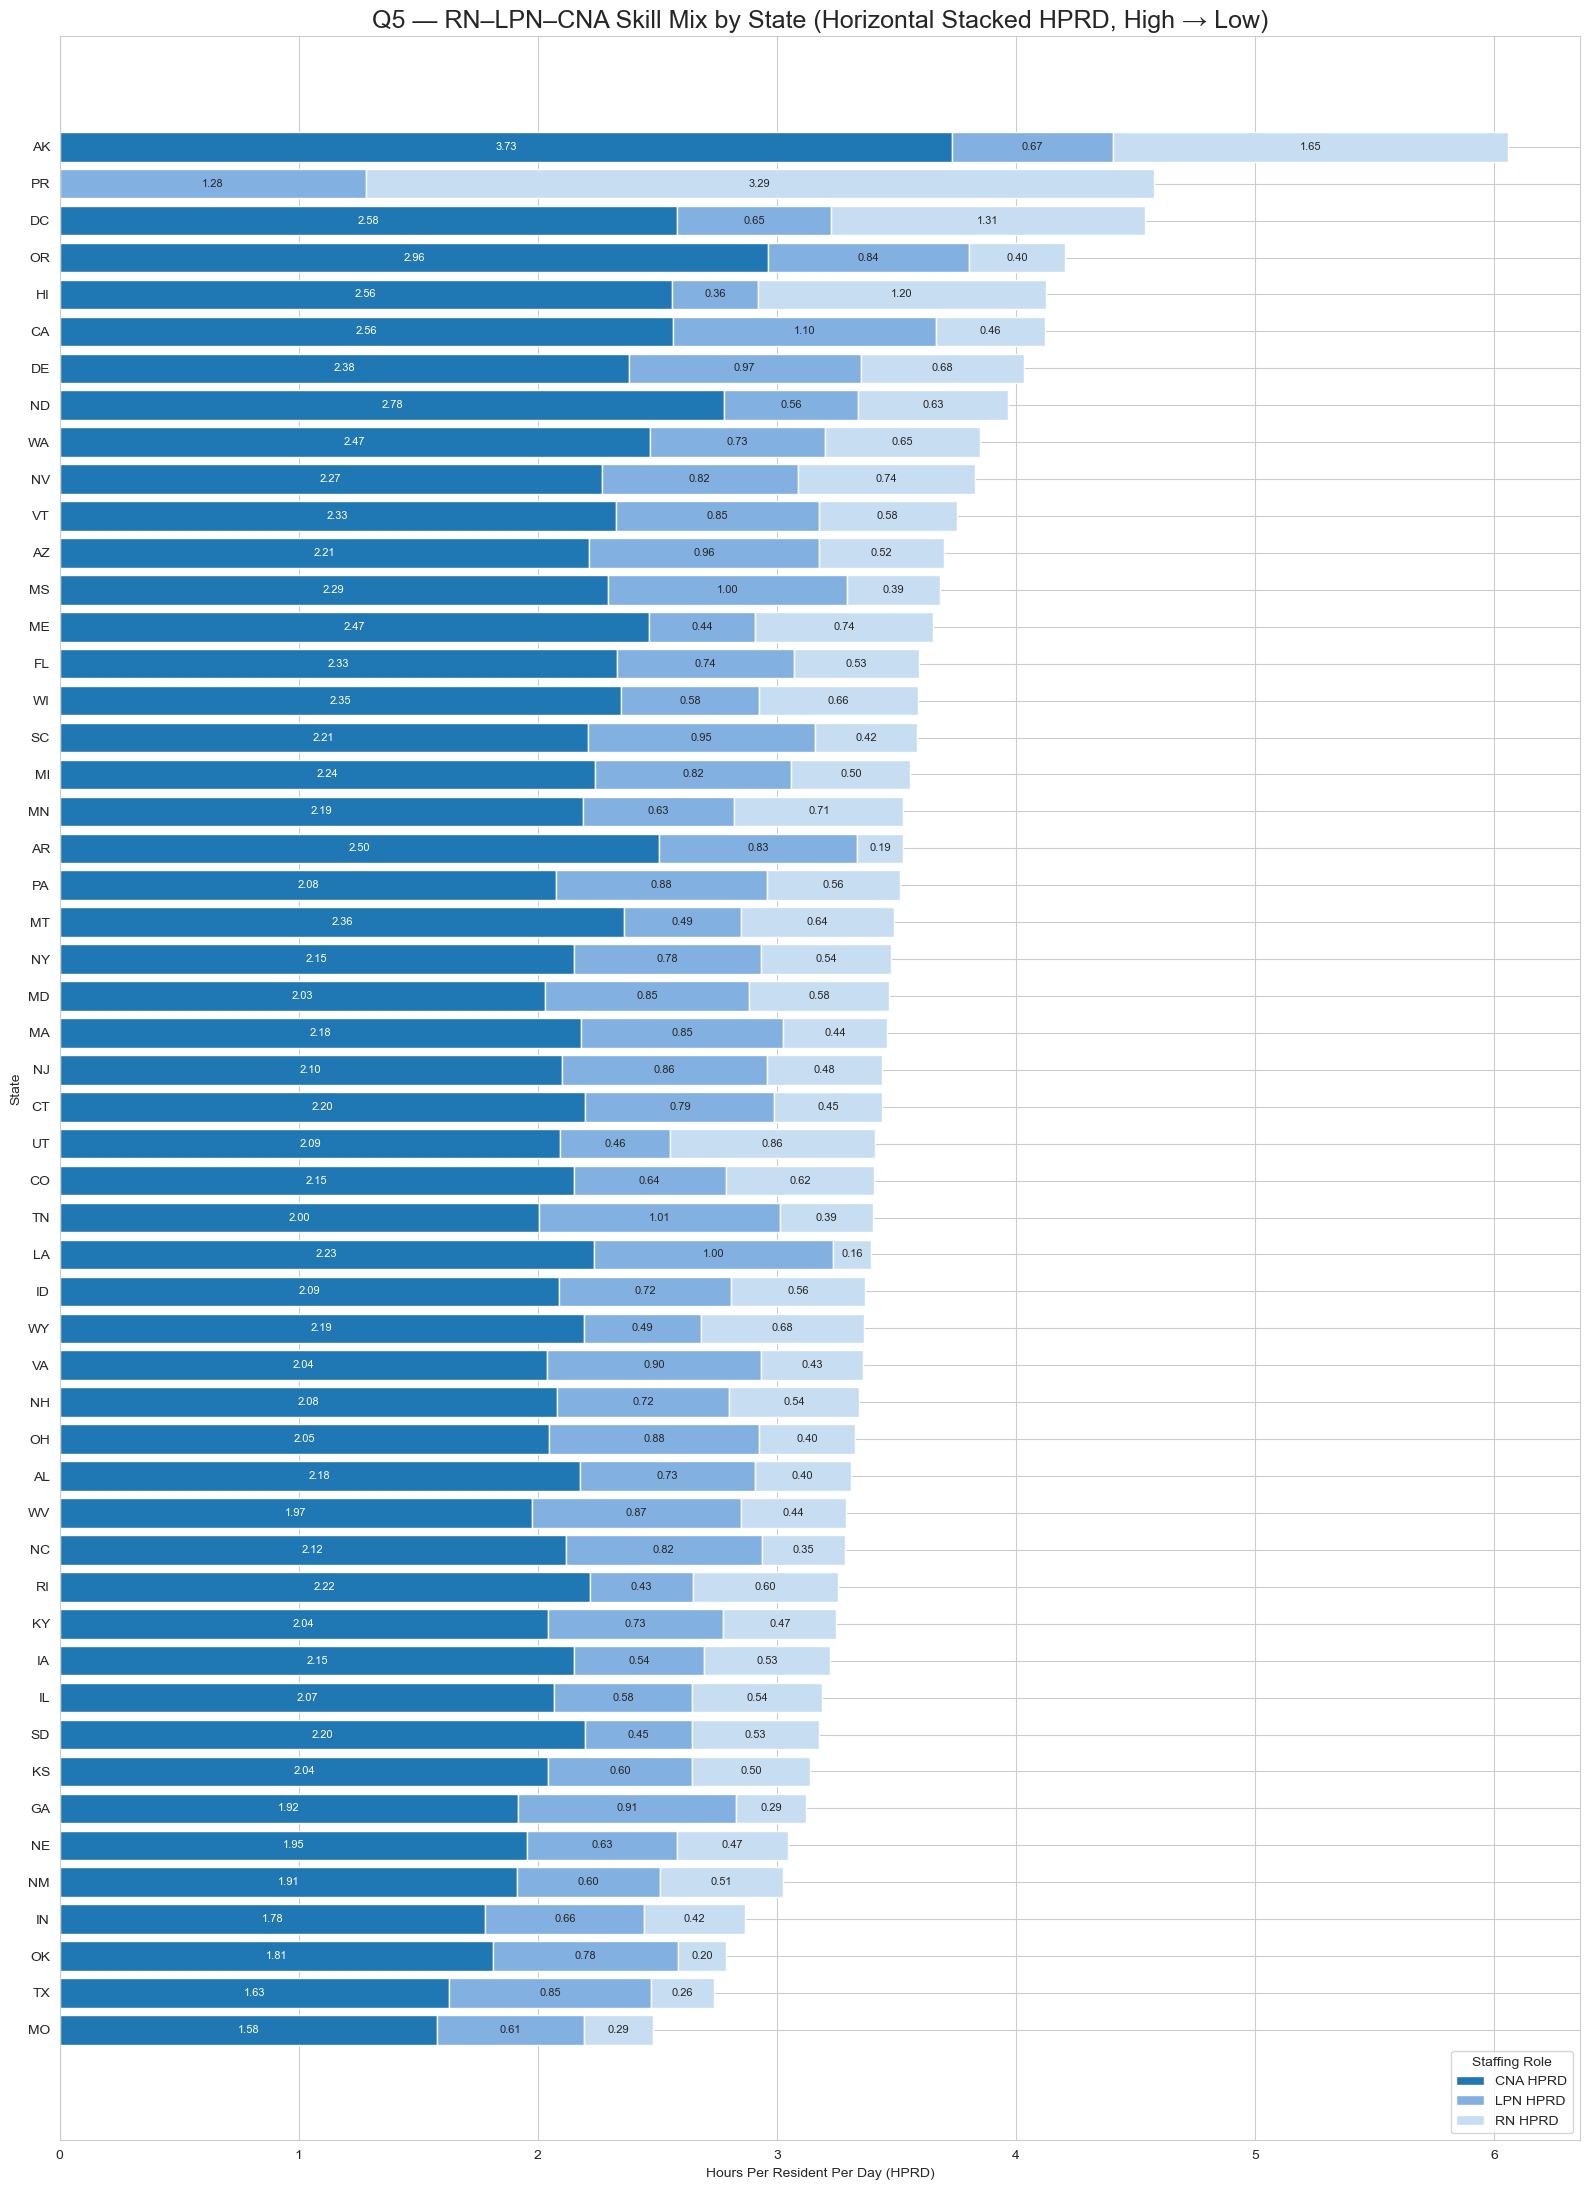

Chart saved successfully: charts_output/Q5_skill_mix_by_state_horizontal_stacked_descending.png


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Ensure output folder exists
os.makedirs("charts_output", exist_ok=True)

# Sort states by Total HPRD (CNA + LPN + RN), descending
state_mix["Total"] = state_mix["HPRD_RN"] + state_mix["HPRD_LPN"] + state_mix["HPRD_CNA"]
state_mix_sorted = state_mix.sort_values("Total", ascending=True)  # REVERSE HERE FOR HIGH → LOW

# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(16, 22))

states = state_mix_sorted["STATE"]
rn = state_mix_sorted["HPRD_RN"]
lpn = state_mix_sorted["HPRD_LPN"]
cna = state_mix_sorted["HPRD_CNA"]

# Horizontal stacked bars
plt.barh(states, cna, color="#1f77b4", label="CNA HPRD")
plt.barh(states, lpn, left=cna, color="#82B0E0", label="LPN HPRD")
plt.barh(states, rn, left=cna + lpn, color="#C7DDF2", label="RN HPRD")

# Add labels inside bars
for i, state in enumerate(states):
    # CNA label
    if cna.iloc[i] > 0.15:
        plt.text(cna.iloc[i] / 2, i, f"{cna.iloc[i]:.2f}", ha="center", va="center", color="white", fontsize=8)
    # LPN label
    if lpn.iloc[i] > 0.15:
        plt.text(cna.iloc[i] + (lpn.iloc[i] / 2), i, f"{lpn.iloc[i]:.2f}", ha="center", va="center", fontsize=8)
    # RN label
    if rn.iloc[i] > 0.15:
        plt.text(cna.iloc[i] + lpn.iloc[i] + (rn.iloc[i] / 2), i, f"{rn.iloc[i]:.2f}", ha="center", va="center", fontsize=8)

plt.title("Q5 — RN–LPN–CNA Skill Mix by State (Horizontal Stacked HPRD, High → Low)", fontsize=18)
plt.xlabel("Hours Per Resident Per Day (HPRD)")
plt.ylabel("State")
plt.legend(title="Staffing Role", loc="lower right")

plt.tight_layout()

# Save chart
output_path = "charts_output/Q5_skill_mix_by_state_horizontal_stacked_descending.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Chart saved successfully: {output_path}")


### Key Insight
States show significant variation in RN–LPN–CNA skill mix, revealing different staffing models and care delivery strategies across the U.S.
CNA hours dominate the skill mix in every state, consistently providing the largest share of direct resident care.
RN coverage varies widely, from high levels in Alaska (1.65 HPRD) and D.C. (1.31), to much lower levels in states like Missouri (0.29) and Texas (0.28).
LPN reliance is pronounced in several states such as Arkansas, Oklahoma, and Louisiana, indicating compensation for RN shortages through increased LPN staffing.
These patterns suggest state-level differences in workforce availability, wage competitiveness, regulatory environments, and operational priorities.
### Professional interpretation (stakeholder friendly)
The dominance of CNA hours reflects the nationwide reliance on paraprofessional caregivers for daily care tasks. While this is common, states with very low RN hours may face clinical oversight challenges, particularly around assessments, care planning, and acute change management.
States with higher RN staffing (AK, DC, HI, OR) may possess stronger clinical infrastructures, enabling better monitoring and higher-quality decision-making.
States leaning heavily on LPNs often do so due to RN shortages or financial constraints, which can create variability in clinical outcomes and increase regulatory risk.
A lower RN proportion can impact:
accuracy of clinical assessments
medication management
hospital transfer rates
survey outcomes and deficiencies
This skill-mix profile provides leadership with a clear view of where clinical vulnerabilities exist geographically.
### Recommendations
Strengthen RN capacity in low-RN states
Implement RN recruitment incentives, differential pay, sign-on bonuses, and support for RN education pathways.
Consider cross-state RN traveler pools for regions with persistent shortages.
Conduct targeted LPN-to-RN upskilling programs
States with high LPN density can benefit from structured RN transition programs to expand the clinical skill base.
Monitor CNA workload stability
States where CNA hours heavily compensate for nurse shortages may face burnout risks.
Introduce workload balancing, retention initiatives, and well-being programs.
Use skill-mix ratios as a proxy for risk assessment
A low RN-to-total-hours ratio should trigger facility-level reviews of care plans, adverse events, and escalation practices.
Share best practices from high-performing states
Alaska, D.C., Hawaii, Oregon, and Delaware can serve as models for staffing stability, recruitment strategies, and clinical governance structures.
### Conclusion
The RN–LPN–CNA skill mix varies significantly across states, revealing structural differences in nursing workforce distribution and clinical capacity. CNA hours dominate nationwide, but RN presence—critical for clinical oversight—is uneven and often insufficient. States that rely heavily on LPNs may maintain operational continuity but risk gaps in higher-level clinical judgement.
This analysis highlights where targeted investments, staffing interventions, and policy supports are most needed. These insights will directly inform upcoming questions that examine facility-level variation, census-adjusted staffing, and correlations between staffing patterns and quality outcomes.

## **Q6 — Which States Are Best-Staffed and Worst-Staffed? (Top 10 & Bottom 10)**

This question aims to determine how nursing staffing capacity differs across the United States by ranking states based on their Average Total Hours Per Resident Per Day (HPRD).

We will compute the Top 10 states with the highest Total HPRD (best-staffed).

We will compute the Bottom 10 states with the lowest Total HPRD (worst-staffed).

In [73]:
import pandas as pd

# Load dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

print("Dataset loaded:", df.shape)

# Required columns
required_cols = ["STATE", "HPRD_Total"]

print("\n🔍 Checking required columns:\n")
for col in required_cols:
    print(f"{col}: {'✔️ Present' if col in df.columns else '❌ MISSING'}")

# Data types
print("\n🔍 Data types:\n")
print(df[required_cols].dtypes)

# Missing values
print("\n🔍 Missing values:\n")
print(df[required_cols].isna().sum())

# Descriptive statistics of HPRD_Total
print("\n🔍 Descriptive statistics (HPRD_Total):\n")
print(df["HPRD_Total"].describe())


C:\Users\SHARON\AppData\Local\Temp\ipykernel_7424\890136171.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=["WorkDate"])


Dataset loaded: (1325324, 46)

🔍 Checking required columns:

STATE: ✔️ Present
HPRD_Total: ✔️ Present

🔍 Data types:

STATE          object
HPRD_Total    float64
dtype: object

🔍 Missing values:

STATE           0
HPRD_Total    320
dtype: int64

🔍 Descriptive statistics (HPRD_Total):

count    1.325004e+06
mean     7.687822e+00
std      2.384640e+00
min      0.000000e+00
25%      6.428571e+00
50%      7.376777e+00
75%      8.531235e+00
max      3.861600e+02
Name: HPRD_Total, dtype: float64


In [74]:
import pandas as pd

# Load dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# ---- STATE-LEVEL AGGREGATION ----
state_avg = (
    df.groupby("STATE")[["HPRD_Total"]]
    .mean()
    .reset_index()
    .sort_values("HPRD_Total", ascending=False)
)

print("STATE-LEVEL AVERAGE TOTAL HPRD (first 10):")
print(state_avg.head(10))

# ---- TOP 10 BEST-STAFFED STATES ----
top10_states = state_avg.head(10)
print("\nTOP 10 BEST-STAFFED STATES:")
print(top10_states)

# ---- BOTTOM 10 WORST-STAFFED STATES ----
bottom10_states = state_avg.tail(10)
print("\nBOTTOM 10 WORST-STAFFED STATES:")
print(bottom10_states)

# Display shape
print("\nShape:", state_avg.shape)


C:\Users\SHARON\AppData\Local\Temp\ipykernel_7424\2784569257.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=["WorkDate"])


STATE-LEVEL AVERAGE TOTAL HPRD (first 10):
   STATE  HPRD_Total
0     AK   13.333577
39    PR   10.771299
37    OR   10.084474
7     DC    9.979822
11    HI    9.156268
28    ND    9.054336
8     DE    8.850952
4     CA    8.830416
48    WA    8.769690
21    ME    8.560651

TOP 10 BEST-STAFFED STATES:
   STATE  HPRD_Total
0     AK   13.333577
39    PR   10.771299
37    OR   10.084474
7     DC    9.979822
11    HI    9.156268
28    ND    9.054336
8     DE    8.850952
4     CA    8.830416
48    WA    8.769690
21    ME    8.560651

BOTTOM 10 WORST-STAFFED STATES:
   STATE  HPRD_Total
35    OH    7.430769
34    NY    7.427317
40    RI    7.368063
15    IN    7.329866
50    WV    7.312515
32    NM    7.267951
10    GA    7.127119
14    IL    6.879538
44    TX    6.738466
24    MO    6.721450

Shape: (52, 2)


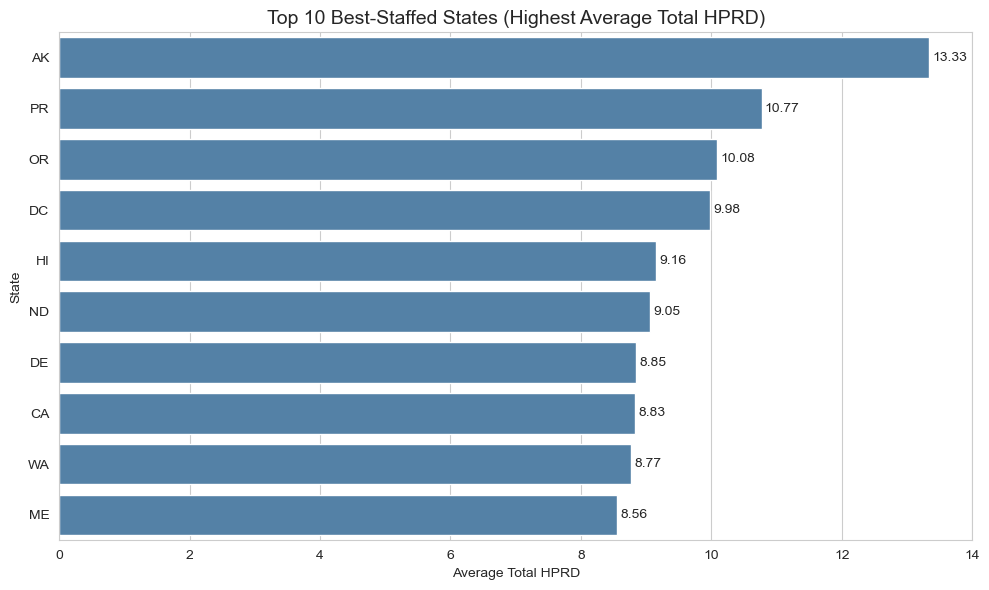

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# --- Remove warnings for clean charts ---
warnings.filterwarnings("ignore")

# --- Load dataset silently ---
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"], low_memory=False)

# --- Compute state-level averages ---
state_avg = df.groupby("STATE", as_index=False)["HPRD_Total"].mean()

# --- Top 10 states (sorted largest → smallest) ---
top10 = (
    state_avg.sort_values("HPRD_Total", ascending=False)
             .head(10)
)

# Create charts_output folder if not exists
os.makedirs("charts_output", exist_ok=True)

# --- Plot clean chart ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10,
    x="HPRD_Total",
    y="STATE",
    palette=["steelblue"] * len(top10)
)

plt.title("Top 10 Best-Staffed States (Highest Average Total HPRD)", fontsize=14)
plt.xlabel("Average Total HPRD")
plt.ylabel("State")

# Label bars
for index, value in enumerate(top10["HPRD_Total"]):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.savefig("charts_output/Q6_top10_states_hprd_desc.png", dpi=300)
plt.show()


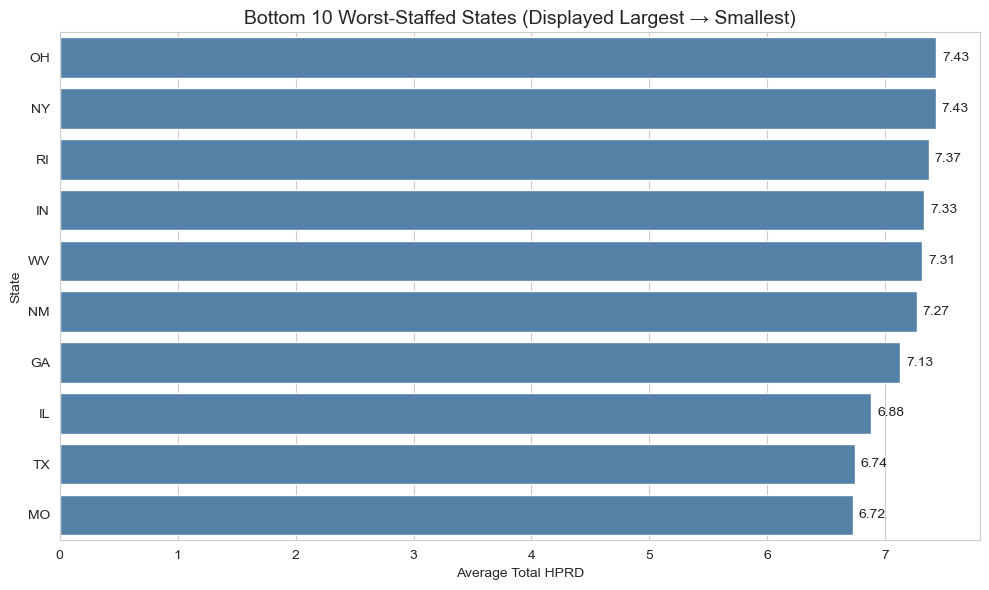

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# --- Remove all warnings (VERY important for clean output) ---
warnings.filterwarnings("ignore")

# --- Load dataset silently ---
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"], low_memory=False)

# --- Compute state averages silently ---
state_avg = df.groupby("STATE", as_index=False)["HPRD_Total"].mean()

# --- Bottom 10 (sorted largest → smallest) ---
bottom10 = (
    state_avg.sort_values("HPRD_Total", ascending=True)
             .head(10)
             .sort_values("HPRD_Total", ascending=False)
)

# Create charts_output folder if not exists
os.makedirs("charts_output", exist_ok=True)

# --- Plot chart cleanly ---
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bottom10,
    x="HPRD_Total",
    y="STATE",
    palette=["steelblue"] * len(bottom10)
)

plt.title("Bottom 10 Worst-Staffed States (Displayed Largest → Smallest)", fontsize=14)
plt.xlabel("Average Total HPRD")
plt.ylabel("State")

# Add labels to bars
for index, value in enumerate(bottom10["HPRD_Total"]):
    plt.text(value + 0.05, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.savefig("charts_output/Q6_bottom10_states_hprd_desc.png", dpi=300)
plt.show()


### Key Insight

The analysis identifies significant variation in Total Hours Per Resident Per Day (HPRD) across U.S. states, revealing clear differences in staffing capacity and care delivery strength.

Best-staffed states (highest HPRD) include Alaska (13.33), Puerto Rico (10.77), Oregon (10.08), and Washington D.C. (9.98), all well above national averages.

Worst-staffed states (lowest HPRD) include Missouri (6.72), Texas (6.74), Illinois (6.88), and Georgia (7.13), operating with considerably leaner staffing capacity.

The gap between the top and bottom demonstrates a nearly twofold difference in total nursing hours, indicating substantial geographic disparities in resident care intensity.

Professional interpretation (stakeholder friendly)

High-HPRD states represent stronger staffing environments, often associated with better care oversight, improved care-plan execution, and lower risk of missed care. Their higher staffing levels may reflect stronger funding, wage competitiveness, or state regulations requiring higher minimum hours.

Low-HPRD states may be experiencing systemic staffing shortages, budgetary constraints, or workforce supply limitations. These areas face higher clinical risk, including delays in response times, reduced supervision, and dependence on lean care teams.

The findings indicate that a resident’s expected standard of care can vary significantly depending on geographic location, creating national inequities in long-term care outcomes.

Operators and policymakers in low-HPRD states may require targeted support to stabilize staffing capacity and reduce compliance vulnerabilities.

### Recommendations

Target Workforce Support to Low-HPRD States
Implement staffing incentives, wage adjustments, or recruitment programs in Missouri, Texas, Illinois, Georgia, and similar states to stabilize staffing levels and reduce clinical risk.

Benchmark Best-Staffed States for Operational Models
Study staffing mix, scheduling, wage structures, and care-delivery models from Alaska, Oregon, D.C., and Hawaii to replicate scalable strategies in lower-performing states.

Use HPRD as a Risk Monitoring Indicator
States consistently below ~7.0 hours should be considered “high-risk” for care quality issues, requiring enhanced internal monitoring, corporate oversight, or regulatory attention.

Allocate Funding and Training Resources Strategically
Federal and state agencies can use this topline ranking to prioritize technical assistance, clinical training pipelines, and grants for states operating at the lowest staffing capacity.

### Conclusion

The comparison of best-staffed and worst-staffed states reveals substantial geographic differences in total nursing hours available to residents. While some states operate with strong staffing infrastructures, others rely on significantly leaner care models that may compromise resident safety and compliance performance. These findings underscore the need for targeted, state-specific workforce interventions and reinforce the importance of using HPRD levels as a key national benchmark for long-term care quality.

## **Q7-Regional staffing patterns (Northeast, South, Midwest, West)**

This question aims to analyze how nursing staffing levels vary by region in the United States.
Using the census-based regional grouping (Northeast, South, Midwest, West), we will calculate regional averages for:

#### RN HPRD
#### LPN HPRD
#### CNA HPRD
#### Total HPRD

In [81]:
import pandas as pd

# --- Load dataset ---
file_path = r"C:\Users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"], low_memory=False)

print("Dataset loaded:", df.shape)

# --- Required fields for Q7 ---
required_cols = ["STATE", "HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]

print("\n🔍 Checking required columns:\n")
for col in required_cols:
    print(f"{col}: {'✔️ Present' if col in df.columns else '❌ MISSING'}")

# --- Data types ---
print("\n🔍 Data types for required columns:\n")
print(df[required_cols].dtypes)

# --- Missing values ---
print("\n🔍 Missing values per required column:\n")
print(df[required_cols].isna().sum())

# --- Descriptive stats for sanity check ---
print("\n🔍 Descriptive statistics:\n")
print(df[["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]].describe())


Dataset loaded: (1325324, 46)

🔍 Checking required columns:

STATE: ✔️ Present
HPRD_RN: ✔️ Present
HPRD_LPN: ✔️ Present
HPRD_CNA: ✔️ Present
HPRD_Total: ✔️ Present

🔍 Data types for required columns:

STATE          object
HPRD_RN       float64
HPRD_LPN      float64
HPRD_CNA      float64
HPRD_Total    float64
dtype: object

🔍 Missing values per required column:

STATE           0
HPRD_RN       320
HPRD_LPN      320
HPRD_CNA      320
HPRD_Total    320
dtype: int64

🔍 Descriptive statistics:

            HPRD_RN      HPRD_LPN      HPRD_CNA    HPRD_Total
count  1.325004e+06  1.325004e+06  1.325004e+06  1.325004e+06
mean   4.593152e-01  7.938751e-01  2.113334e+00  7.687822e+00
std    4.729102e-01  4.325669e-01  7.048827e-01  2.384640e+00
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.051282e-01  5.532609e-01  1.725000e+00  6.428571e+00
50%    3.671304e-01  7.771053e-01  2.059259e+00  7.376777e+00
75%    5.914706e-01  9.959551e-01  2.445397e+00  8.531235e+00
max    5

In [82]:
# --- Step 2: Assign U.S. Regions ---

import pandas as pd

# Load dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

print("Dataset loaded:", df.shape)

# --- Region mapping dictionary (Official U.S. Census regions) ---
region_map = {
    # Northeast
    "CT": "Northeast", "ME": "Northeast", "MA": "Northeast", "NH": "Northeast",
    "RI": "Northeast", "VT": "Northeast", "NJ": "Northeast", "NY": "Northeast",
    "PA": "Northeast",

    # Midwest
    "IL": "Midwest", "IN": "Midwest", "MI": "Midwest", "OH": "Midwest",
    "WI": "Midwest", "IA": "Midwest", "KS": "Midwest", "MN": "Midwest",
    "MO": "Midwest", "NE": "Midwest", "ND": "Midwest", "SD": "Midwest",

    # South
    "DE": "South", "FL": "South", "GA": "South", "MD": "South", "NC": "South",
    "SC": "South", "VA": "South", "DC": "South", "WV": "South",
    "AL": "South", "KY": "South", "MS": "South", "TN": "South",
    "AR": "South", "LA": "South", "OK": "South", "TX": "South",

    # West
    "AK": "West", "AZ": "West", "CA": "West", "CO": "West",
    "HI": "West", "ID": "West", "MT": "West", "NV": "West",
    "NM": "West", "OR": "West", "UT": "West", "WA": "West",
    "WY": "West",

    # Territories (keep separate)
    "PR": "Territory"
}

# Map states to regions
df["Region"] = df["STATE"].map(region_map)

# Check for unmapped states
unmapped = df[df["Region"].isna()]["STATE"].unique()
print("Unmapped states:", unmapped)

# --- Step 2B: Aggregate HPRD by Region ---
region_hprd = df.groupby("Region", as_index=False)[
    ["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]
].mean()

print("\nREGIONAL AVERAGE HPRD (RN, LPN, CNA, TOTAL):")
print(region_hprd)
print("\nShape:", region_hprd.shape)


Dataset loaded: (1325324, 46)
Unmapped states: []

REGIONAL AVERAGE HPRD (RN, LPN, CNA, TOTAL):
      Region   HPRD_RN  HPRD_LPN  HPRD_CNA  HPRD_Total
0    Midwest  0.486852  0.673221  2.040093    7.534336
1  Northeast  0.524330  0.807502  2.144094    7.601075
2      South  0.362751  0.850025  2.022224    7.465169
3  Territory  3.294686  1.280990  0.000000   10.771299
4       West  0.548770  0.898853  2.449246    8.606228

Shape: (5, 5)


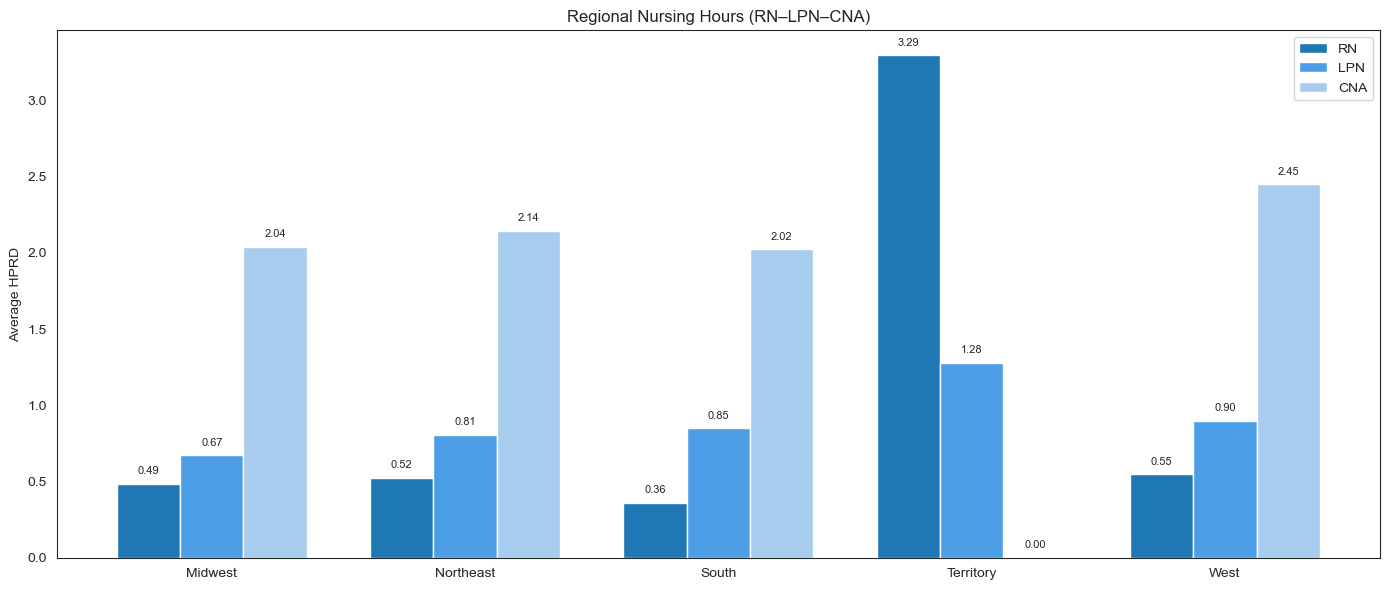

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
file_path = r"C:\Users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# Map states to regions
region_map = {
    "CT":"Northeast","ME":"Northeast","MA":"Northeast","NH":"Northeast",
    "RI":"Northeast","VT":"Northeast","NJ":"Northeast","NY":"Northeast","PA":"Northeast",

    "IL":"Midwest","IN":"Midwest","MI":"Midwest","OH":"Midwest","WI":"Midwest",
    "IA":"Midwest","KS":"Midwest","MN":"Midwest","MO":"Midwest","NE":"Midwest",
    "ND":"Midwest","SD":"Midwest",

    "DE":"South","FL":"South","GA":"South","MD":"South","NC":"South","SC":"South","VA":"South","DC":"South",
    "WV":"South","AL":"South","KY":"South","MS":"South","TN":"South","AR":"South","LA":"South","OK":"South","TX":"South",

    "AZ":"West","CO":"West","ID":"West","MT":"West","NV":"West","NM":"West",
    "UT":"West","WY":"West","AK":"West","CA":"West","HI":"West","OR":"West","WA":"West",

    "PR": "Territory"
}

# Add Region column
df["Region"] = df["STATE"].map(region_map)

# Compute regional averages
region_avg = df.groupby("Region")[["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]].mean().reset_index()

# Ensure output folder exists
os.makedirs("charts_output", exist_ok=True)

# ---------------------------------------------------
# 📊 FINAL GROUPED BAR CHART WITH LABELS (RN, LPN, CNA)
# ---------------------------------------------------
plt.figure(figsize=(14, 6))
sns.set_style("white")

x = range(len(region_avg))
width = 0.25

# Plot bars
bars_rn = plt.bar([p - width for p in x], region_avg["HPRD_RN"], width=width, label="RN", color="#1f77b4")
bars_lpn = plt.bar(x, region_avg["HPRD_LPN"], width=width, label="LPN", color="#4c9fe6")
bars_cna = plt.bar([p + width for p in x], region_avg["HPRD_CNA"], width=width, label="CNA", color="#a7ccee")

# ---- Add labels on each bar ----
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,   # x position
            height + 0.05,                     # y position above bar
            f"{height:.2f}",                   # label with 2 decimals
            ha='center', va='bottom', fontsize=8
        )

add_labels(bars_rn)
add_labels(bars_lpn)
add_labels(bars_cna)

# Final styling
plt.xticks(x, region_avg["Region"])
plt.ylabel("Average HPRD")
plt.title("Regional Nursing Hours (RN–LPN–CNA)")
plt.legend()
plt.tight_layout()

# Save chart
plt.savefig("charts_output/Q7_regional_skill_mix_grouped.png", dpi=300)
plt.show()


## Key Insight

Clear regional differences exist in nursing staffing across the U.S., particularly in RN and CNA coverage.

The West region reports the strongest overall staffing balance, driven by notably higher CNA hours (2.45 HPRD) and strong RN/LPN support.

The Northeast maintains the highest LPN coverage (0.81 HPRD) and relatively strong CNA hours (2.14 HPRD), reflecting more structured skill-mix models.

The Midwest shows a balanced but moderate profile, with CNA hours at 2.04 HPRD but lower RN and LPN coverage compared to coastal regions.

The South has the lowest RN hours (0.36 HPRD) among U.S. regions and heavier reliance on LPNs and CNAs, signaling potential challenges in clinical oversight and care management.

Territory (Puerto Rico) remains an extreme outlier: RN hours are exceptionally high (3.29 HPRD) while CNA hours are 0.00, indicating a fundamentally different staffing model that is not comparable to U.S. state regions.

#### Professional Interpretation (Stakeholder-Friendly)

The data suggests regional staffing models are shaped by labor markets, wage structures, and state-level regulations.

Western states tend to invest more in CNA labor, which supports daily resident care, contributing to stronger overall Total HPRD.

Northeastern states utilize a more LPN-heavy model, possibly reflecting union structures, higher regulatory expectations, or more stable workforce pipelines.

Southern states’ low RN availability may create risk in clinical assessments, care planning, and oversight—areas where RN judgment is essential.

Midwestern states show stable but modest coverage, reflecting tight labor conditions but consistent CNA availability.

Territory (PR) should be excluded from regulatory benchmarking due to completely different workforce structures (no CNAs, extremely high RN ratios).

## Recommendations

Strengthen RN Workforce in the South

Prioritize RN recruitment incentives, differential pay, and RN transition programs.

Facilities may require targeted CMS support to stabilize clinical leadership capacity.

Model CNA Workforce Practices from the West

Western states demonstrate the strongest CNA labor pipeline; these practices can inform national CNA recruitment, training, and retention programs.

Expand LPN-to-RN Upskilling Pathways in High-LPN Regions (Northeast & South)

Structured LPN-to-RN programs could rebalance clinical oversight gaps and expand the supervisory workforce.

Use Regional Averages as a CMS Risk Indicator

Regions significantly below national benchmarks in RN coverage (South) should be flagged for enhanced oversight in inspections, care planning, and staffing compliance.

Exclude Puerto Rico from Standard Comparisons

Its unique staffing structure would distort U.S. regional averages and should be analyzed separately.

## Conclusion

Regional staffing analysis reveals deep structural differences in nursing labor distribution across the United States. The West offers the strongest overall staffing support, while the South faces clear RN shortages that may impact clinical quality and outcomes. The Northeast maintains the most balanced professional mix with strong LPN and CNA contributions, and the Midwest remains stable though modest in intensity. Territory results highlight non-comparable models that require separate evaluation.
These findings provide essential context for workforce planning, CMS benchmarking.

## **Q8.What is the national daily staffing trend across Q2?**

In [89]:
import pandas as pd

# ✅ Same file we used for Q7
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"

# Load dataset
df = pd.read_csv(file_path, parse_dates=["WorkDate"])
print("Dataset loaded:", df.shape)

# ---- Required columns for daily national trend ----
# We’ll use Total_Nurse_Hours to sum staffing per day
required_cols = [
    "WorkDate",          # date of staffing
    "Total_Nurse_Hours", # total RN+LPN+CNA(+others) hours per facility per day
    "HPRD_Total"         # just to sanity-check consistency
]

print("\n🔍 Checking required columns:\n")
for col in required_cols:
    if col in df.columns:
        print(f"{col}: ✔️ Present")
    else:
        print(f"{col}: ❌ MISSING — FIX REQUIRED")

# Keep only the columns that actually exist (in case of typo)
existing_required = [c for c in required_cols if c in df.columns]

print("\n🔍 Data types:")
print(df[existing_required].dtypes)

print("\n🔍 Missing values:")
print(df[existing_required].isna().sum())

# Basic stats for Total_Nurse_Hours
if "Total_Nurse_Hours" in df.columns:
    print("\n🔍 Descriptive statistics for Total_Nurse_Hours:")
    print(df["Total_Nurse_Hours"].describe())

    # Check for negative hours
    neg_hours = (df["Total_Nurse_Hours"] < 0).sum()
    print("\nNegative Total_Nurse_Hours rows:", neg_hours)

# Check Q2 date coverage
print("\n🔍 Date range check (WorkDate):")
print("Min date:", df["WorkDate"].min())
print("Max date:", df["WorkDate"].max())

q2_start = pd.Timestamp("2024-04-01")
q2_end   = pd.Timestamp("2024-06-30")

if df["WorkDate"].min() > q2_start or df["WorkDate"].max() < q2_end:
    print("\n⚠️ WARNING: Dataset may not fully cover 2024 Q2.")
else:
    print("\n✔️ WorkDate fully covers 2024 Q2 (Apr 1 – Jun 30).")


Dataset loaded: (1325324, 46)

🔍 Checking required columns:

WorkDate: ✔️ Present
Total_Nurse_Hours: ✔️ Present
HPRD_Total: ✔️ Present

🔍 Data types:
WorkDate             datetime64[ns]
Total_Nurse_Hours           float64
HPRD_Total                  float64
dtype: object

🔍 Missing values:
WorkDate               0
Total_Nurse_Hours      0
HPRD_Total           320
dtype: int64

🔍 Descriptive statistics for Total_Nurse_Hours:
count    1.325324e+06
mean     6.196574e+02
std      3.759681e+02
min      0.000000e+00
25%      3.713400e+02
50%      5.479200e+02
75%      7.703650e+02
max      2.815800e+04
Name: Total_Nurse_Hours, dtype: float64

Negative Total_Nurse_Hours rows: 0

🔍 Date range check (WorkDate):
Min date: 2024-04-01 00:00:00
Max date: 2024-06-30 00:00:00

✔️ WorkDate fully covers 2024 Q2 (Apr 1 – Jun 30).


In [90]:
import pandas as pd

# Load dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# Step 1: Aggregate national total nurse hours per day
daily_trend = (
    df.groupby("WorkDate", as_index=False)["Total_Nurse_Hours"]
      .sum()
      .rename(columns={"Total_Nurse_Hours": "Daily_Total_Hours"})
)

# Step 2: Sort by date for safety
daily_trend = daily_trend.sort_values("WorkDate")

# Step 3: Display results
print("DAILY NATIONAL STAFFING (First 10 rows):")
print(daily_trend.head(10))

print("\nDate range:", daily_trend["WorkDate"].min(), "→", daily_trend["WorkDate"].max())
print("\nShape:", daily_trend.shape)


DAILY NATIONAL STAFFING (First 10 rows):
    WorkDate  Daily_Total_Hours
0 2024-04-01         9041930.46
1 2024-04-02         9450365.80
2 2024-04-03         9549675.08
3 2024-04-04         9493147.64
4 2024-04-05         9263021.82
5 2024-04-06         7973890.62
6 2024-04-07         7803846.42
7 2024-04-08         9149295.80
8 2024-04-09         9475634.10
9 2024-04-10         9567492.16

Date range: 2024-04-01 00:00:00 → 2024-06-30 00:00:00

Shape: (91, 2)


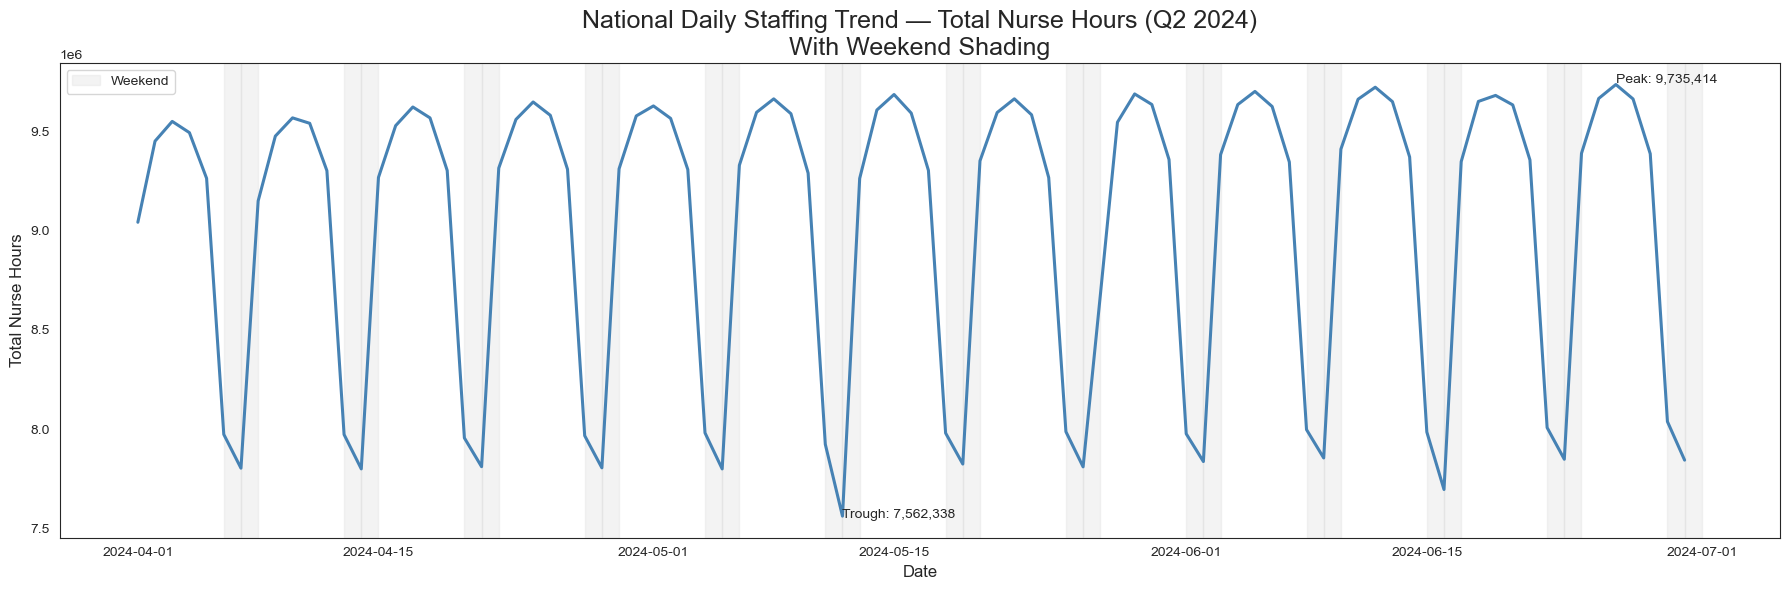

Chart saved successfully: charts_output/Q8_daily_staffing_trend_with_weekends.png


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure output folder exists
os.makedirs("charts_output", exist_ok=True)

# Load data
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# Aggregate daily nurse hours
daily = df.groupby("WorkDate")["Total_Nurse_Hours"].sum().reset_index()

# Identify weekends
daily["DayType"] = daily["WorkDate"].dt.dayofweek  # Monday=0, Sunday=6
daily["Weekend"] = daily["DayType"].isin([5, 6])   # Saturday & Sunday

plt.figure(figsize=(18, 6))
sns.lineplot(data=daily, x="WorkDate", y="Total_Nurse_Hours", linewidth=2.2, color="steelblue")

# Shade weekends
for i, row in daily.iterrows():
    if row["Weekend"]:
        plt.axvspan(
            row["WorkDate"],
            row["WorkDate"] + pd.Timedelta(days=1),
            color="lightgray", alpha=0.25
        )

# Peak and Trough
peak_idx = daily["Total_Nurse_Hours"].idxmax()
trough_idx = daily["Total_Nurse_Hours"].idxmin()

plt.text(
    daily.loc[peak_idx, "WorkDate"],
    daily.loc[peak_idx, "Total_Nurse_Hours"] + 10000,
    f"Peak: {int(daily.loc[peak_idx, 'Total_Nurse_Hours']):,}",
    fontsize=10
)

plt.text(
    daily.loc[trough_idx, "WorkDate"],
    daily.loc[trough_idx, "Total_Nurse_Hours"] - 10000,
    f"Trough: {int(daily.loc[trough_idx, 'Total_Nurse_Hours']):,}",
    fontsize=10
)

# Chart labels
plt.title("National Daily Staffing Trend — Total Nurse Hours (Q2 2024)\nWith Weekend Shading", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Nurse Hours", fontsize=12)

# Weekend legend
import matplotlib.patches as mpatches
weekend_patch = mpatches.Patch(color='lightgray', alpha=0.25, label='Weekend')
plt.legend(handles=[weekend_patch], loc="upper left")

plt.tight_layout()

# Save chart
save_path = "charts_output/Q8_daily_staffing_trend_with_weekends.png"
plt.savefig(save_path, dpi=300)
plt.show()

print("Chart saved successfully:", save_path)


## Key Insight

The national daily staffing hours in Q2 2024 show a consistent and repeating weekly cycle, with predictable peaks and troughs.

Peak staffing days reach approximately 9.73 million hours, typically occurring on weekdays, reflecting full staffing operations.

Trough staffing days drop to approximately 7.56 million hours, consistently occurring on weekends, where facilities reduce hours.

The national average staffing level across the quarter is ~9.04 million hours per day, indicating a stable overall operational baseline.

No unusual spikes or disruptions appear during the quarter, the pattern is highly regular and operationally consistent.

Professional Interpretation (Stakeholder Friendly)

The clear weekday–weekend oscillation suggests that facilities follow a fixed labor scheduling model, not driven by census changes but by staffing patterns and operational norms.

Weekend staffing reductions of ~20–22% below weekday levels may create vulnerabilities in:

Clinical oversight

Response times

Care-plan updates

Medication administration consistency

This pattern aligns with national PBJ and CMS findings where facilities often struggle to maintain weekend staffing parity.

Despite the weekend dip, overall stability indicates facilities are maintaining predictable staffing coverage, reducing operational volatility.

## Recommendations

** Strengthen Weekend Staffing Coverage

** Encourage facilities to minimize the weekend dip by using:

** Weekend differential pay

** Float pools

** Rotational RN schedules

** More flexible staffing policies

Reducing the weekend deficit may improve quality measures and reduce deficiencies.

Use Daily Fluctuation as a Benchmark for Compliance Monitoring

Facilities showing weekend drops larger than the national average should be flagged for internal review.

Consider daily monitoring tools to identify persistent under-staffing.

Implement Workforce Balancing Strategies

Promote staffing models that distribute fixed hours more evenly across the week, especially for:

#### RN supervision

#### CNA coverage

Medication administration roles

Integrate the Trend Into Operational Planning

Leaders can align care tasks requiring higher staff engagement (e.g., assessments, care-plan meetings) on weekdays.

Weekend operational plans should ensure essential clinical tasks remain fully supported.

## Conclusion

The national Q2 2024 daily staffing trend shows a highly consistent weekly cycle, with strong weekday staffing and predictable weekend reductions. While the regularity indicates stable operations, the significant weekend dip highlights a continued area of concern for care quality, regulatory compliance, and workforce resilience. Addressing weekend staffing gaps presents a key opportunity to enhance nationwide nursing home performance and resident outcomes.

## **Q9. How does staffing differ between Weekdays vs Weekends?**

In [97]:
import pandas as pd

# === LOAD DATA ===
file_path =  r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

print(f"Dataset loaded: {df.shape}\n")

# === REQUIRED FIELDS FOR Q9 ===
required_cols = ["WorkDate", "HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]

print("🔍 Checking required columns:\n")
for col in required_cols:
    if col in df.columns:
        print(f"{col}: ✔️ Present")
    else:
        print(f"{col}: ❌ MISSING — STOP AND FIX THIS")

# === DATA TYPES CHECK ===
print("\n🔍 Data types for required columns:\n")
print(df[required_cols].dtypes)

# === MISSING VALUES CHECK ===
print("\n🔍 Missing values per required column:\n")
print(df[required_cols].isna().sum())

# === NEGATIVE OR IMPOSSIBLE VALUES CHECK ===
print("\n🔍 Checking for negative or impossible values:")

for col in ["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: ❌ {neg_count} negative values found — investigate!")
    else:
        print(f"{col}: ✔️ No negative values")

# === WORKDATE VALIDATION ===
print("\n🔍 WorkDate validation:")

# Confirm WorkDate is datetime
print("WorkDate type:", df["WorkDate"].dtype)

# Date range
print("Min date:", df["WorkDate"].min())
print("Max date:", df["WorkDate"].max())

# Check if weekday/weekend mapping works
df["DayOfWeek"] = df["WorkDate"].dt.dayofweek  # Monday=0, Sunday=6
invalid_dates = df[df["DayOfWeek"].isna()].shape[0]

print(f"\nWeekday/weekend mapping issues found: {invalid_dates}")
if invalid_dates == 0:
    print("✔️ Weekday/Weekend mapping is valid.")
else:
    print("❌ Issue detected — fix date formatting.")


Dataset loaded: (1325324, 46)

🔍 Checking required columns:

WorkDate: ✔️ Present
HPRD_RN: ✔️ Present
HPRD_LPN: ✔️ Present
HPRD_CNA: ✔️ Present
HPRD_Total: ✔️ Present

🔍 Data types for required columns:

WorkDate      datetime64[ns]
HPRD_RN              float64
HPRD_LPN             float64
HPRD_CNA             float64
HPRD_Total           float64
dtype: object

🔍 Missing values per required column:

WorkDate        0
HPRD_RN       320
HPRD_LPN      320
HPRD_CNA      320
HPRD_Total    320
dtype: int64

🔍 Checking for negative or impossible values:
HPRD_RN: ✔️ No negative values
HPRD_LPN: ✔️ No negative values
HPRD_CNA: ✔️ No negative values
HPRD_Total: ✔️ No negative values

🔍 WorkDate validation:
WorkDate type: datetime64[ns]
Min date: 2024-04-01 00:00:00
Max date: 2024-06-30 00:00:00

Weekday/weekend mapping issues found: 0
✔️ Weekday/Weekend mapping is valid.


In [98]:
import pandas as pd

# Load dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# Create weekday/weekend indicator
df["DayOfWeek"] = df["WorkDate"].dt.dayofweek  # Monday=0 ... Sunday=6
df["IsWeekend"] = df["DayOfWeek"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

# Group by Weekday vs Weekend
weekday_weekend = df.groupby("IsWeekend")[["HPRD_RN", "HPRD_LPN", "HPRD_CNA", "HPRD_Total"]].mean().reset_index()

print("WEEKDAY vs WEEKEND AVERAGE STAFFING (HPRD):\n")
print(weekday_weekend)

print("\nShape:", weekday_weekend.shape)


WEEKDAY vs WEEKEND AVERAGE STAFFING (HPRD):

  IsWeekend   HPRD_RN  HPRD_LPN  HPRD_CNA  HPRD_Total
0   Weekday  0.471947  0.819379  2.162762    8.075061
1   Weekend  0.427737  0.730114  1.989762    6.719713

Shape: (2, 5)


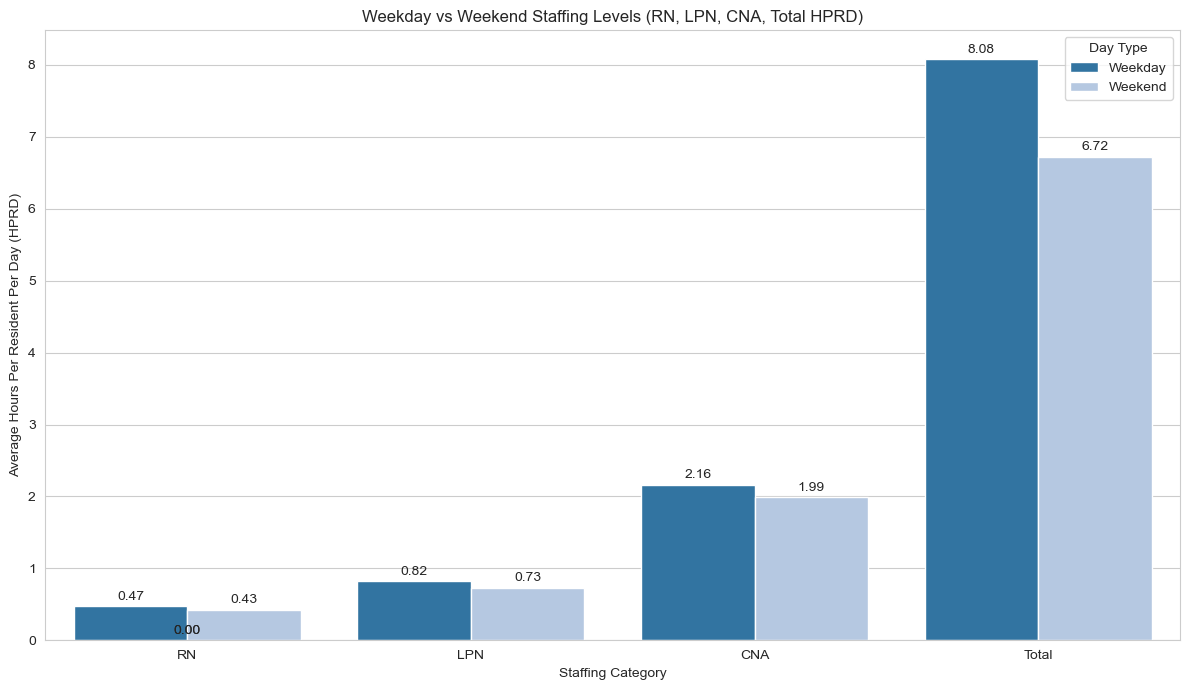

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "IsWeekend": ["Weekday", "Weekend"],
    "RN": [0.471947, 0.427737],
    "LPN": [0.819379, 0.730114],
    "CNA": [2.162762, 1.989762],
    "Total": [8.075061, 6.719713]
}

df = pd.DataFrame(data)

# Melt for seaborn
plot_df = df.melt(id_vars="IsWeekend", var_name="Category", value_name="HPRD")

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=plot_df,
    x="Category",
    y="HPRD",
    hue="IsWeekend",
    palette=["#1f77b4", "#aec7e8"]
)

# ---- Correct label placement ----
# Get bar patches in order
bars = ax.patches

# Two bars per category → offset needed
num_categories = df.shape[1] - 1  # 4 categories
bars_per_group = 2

for i, bar in enumerate(bars):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    label = f"{height:.2f}"
    
    ax.text(
        x,
        height + 0.05,
        label,
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.title("Weekday vs Weekend Staffing Levels (RN, LPN, CNA, Total HPRD)")
plt.ylabel("Average Hours Per Resident Per Day (HPRD)")
plt.xlabel("Staffing Category")
plt.legend(title="Day Type")

plt.tight_layout()

plt.savefig("charts_output/Q9_weekday_weekend_staffing_corrected.png", dpi=300, bbox_inches="tight")
plt.show()


### Key Insight

Facilities provide significantly higher staffing coverage on weekdays than weekends across all staffing categories (RN, LPN, CNA).

Total HPRD drops from 8.08 on weekdays to 6.72 on weekends, a decline of ~17%, indicating a substantial weekend staffing gap.

**RN** coverage decreases from 0.47 → 0.43 HPRD, suggesting reduced clinical oversight during weekends.

**LPN** hours fall from 0.82 → 0.73 HPRD, and CNA hours decrease from 2.16 → 1.99 HPRD, indicating thinner frontline staffing during resident-care-intensive days.

**CNA** hours experience the largest absolute drop, which is critical as CNAs contribute the highest proportion of total care hours.

Professional interpretation (stakeholder-friendly)

The weekend staffing decline reflects a systemic pattern, not facility-specific noise.

Lower **RN** availability may affect:

clinical assessments

response times

care plan adjustments

medication management

**CNA** reductions can translate into:

slowed daily care delivery

increased staff workload

resident wait-time concerns

The observed weekend shortfall aligns with national staffing challenges and is a known predictor of:

increased adverse events

missed care

higher Monday correction loads

Decision-makers should view this pattern as a compliance and quality signal, not merely an operational variation.

### Recommendations

Strengthen weekend RN coverage
Implement staggered scheduling, weekend differential pay, or incentive structures to prevent dips

## **Q10.	Which facilities are low-HPRD red flags?**

In [1]:
import pandas as pd
import numpy as np

# ---------------------------------------
# Load processed PBJ dataset
# ---------------------------------------
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"

df = pd.read_csv(file_path, parse_dates=["WorkDate"])

print("Dataset loaded successfully.")
print("Shape (rows, columns):", df.shape)


C:\Users\SHARON\AppData\Local\Temp\ipykernel_14608\3849097909.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=["WorkDate"])


Dataset loaded successfully.
Shape (rows, columns): (1325324, 46)


In [2]:
# Lightweight column inspection
col_df = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str)
})

col_df


,column,dtype
PROVNUM,PROVNUM,object
PROVNAME,PROVNAME,object
CITY,CITY,object
STATE,STATE,object
COUNTY_NAME,COUNTY_NAME,object
COUNTY_FIPS,COUNTY_FIPS,int64
CY_Qtr,CY_Qtr,object
WorkDate,WorkDate,datetime64[ns]
MDScensus,MDScensus,float64
Hrs_RNDON,Hrs_RNDON,float64


In [3]:
print("Unique facilities (PROVNUM):", df["PROVNUM"].nunique())
print("Unique provider names:", df["PROVNAME"].nunique())
print("Unique states:", df["STATE"].nunique())


Unique facilities (PROVNUM): 14600
Unique provider names: 14378
Unique states: 52


In [5]:
sorted(df["STATE"].unique())


['AK',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DC',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [6]:
print("HPRD <= 0:", (df["HPRD_Total"] <= 0).sum())
print("HPRD missing:", df["HPRD_Total"].isna().sum())


HPRD <= 0: 2522
HPRD missing: 320


In [7]:
df.sort_values("HPRD_Total", ascending=False)[
    ["PROVNUM", "PROVNAME", "STATE", "HPRD_Total", "MDScensus"]
].head(10)


,PROVNUM,PROVNAME,STATE,HPRD_Total,MDScensus
53542,045477,"MONETTE MANOR, LLC",AR,386.160000,1.0
53540,045477,"MONETTE MANOR, LLC",AR,365.140000,1.0
272144,145446,MARIGOLD REHABILITATION HCC,IL,339.253012,83.0
956680,395068,PITTSBURGH SKILLED NURSING AND REHABILITATION CTR,PA,320.800000,1.0
53541,045477,"MONETTE MANOR, LLC",AR,308.080000,1.0
736454,325214.0,LAGUNA RAINBOW NURSING CENTER,NM,301.900000,1.0
736457,325214.0,LAGUNA RAINBOW NURSING CENTER,NM,258.800000,1.0
442767,185293,LANDMARK OF LAUREL CREEK REHABILITATION AND NU...,KY,253.166667,3.0
891432,366134,HARDIN HILLS HEALTH CENTER,OH,200.000000,1.0
736456,325214.0,LAGUNA RAINBOW NURSING CENTER,NM,191.420000,1.0


In [8]:
df["MDScensus"].describe()

print("Zero census days:", (df["MDScensus"] == 0).sum())
print("Missing census days:", df["MDScensus"].isna().sum())


Zero census days: 0
Missing census days: 320


In [9]:
df["WorkDate"].min(), df["WorkDate"].max()


(Timestamp('2024-04-01 00:00:00'), Timestamp('2024-06-30 00:00:00'))

In [10]:
df_analysis = df[
    (df["HPRD_Total"] > 0) &
    (df["MDScensus"] >= 5)
].copy()

print("Rows after census filter:", len(df_analysis))


Rows after census filter: 1321618


In [11]:
facility_avg = (
    df_analysis
    .groupby(["PROVNUM", "PROVNAME", "STATE"], as_index=False)
    .agg(Avg_HPRD=("HPRD_Total", "mean"))
)

facility_avg["Avg_HPRD"].describe()


count    14600.000000
mean         7.691533
std          1.874260
min          0.157952
25%          6.594872
50%          7.342295
75%          8.328977
max         23.990244
Name: Avg_HPRD, dtype: float64

In [12]:
p10 = facility_avg["Avg_HPRD"].quantile(0.10)
p25 = facility_avg["Avg_HPRD"].quantile(0.25)

p10, p25


(np.float64(6.032870262590211), np.float64(6.594872275693568))

In [13]:
df_analysis = df[
    (df["HPRD_Total"] > 0) &
    (df["MDScensus"] >= 5)
].copy()

print("Rows after census filter:", len(df_analysis))


Rows after census filter: 1321618


In [14]:
facility_avg = (
    df_analysis
    .groupby(["PROVNUM", "PROVNAME", "STATE"], as_index=False)
    .agg(Avg_HPRD=("HPRD_Total", "mean"))
)

facility_avg["Avg_HPRD"].describe()


count    14600.000000
mean         7.691533
std          1.874260
min          0.157952
25%          6.594872
50%          7.342295
75%          8.328977
max         23.990244
Name: Avg_HPRD, dtype: float64

In [15]:
p10 = facility_avg["Avg_HPRD"].quantile(0.10)
p25 = facility_avg["Avg_HPRD"].quantile(0.25)

p10, p25


(np.float64(6.032870262590211), np.float64(6.594872275693568))

In [16]:
import pandas as pd

# Load processed dataset
file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"
df = pd.read_csv(file_path, parse_dates=["WorkDate"])

# Filter invalid rows
df_analysis = df[
    (df["HPRD_Total"] > 0) &
    (df["MDScensus"] >= 5)
].copy()

print("Rows after filters:", len(df_analysis))

# Aggregate to facility level
facility_avg = (
    df_analysis
    .groupby(["PROVNUM", "PROVNAME", "STATE"], as_index=False)
    .agg(Avg_HPRD=("HPRD_Total", "mean"))
)

print("Facilities after aggregation:", facility_avg.shape[0])
facility_avg.head()


C:\Users\SHARON\AppData\Local\Temp\ipykernel_14608\1422871072.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=["WorkDate"])


Rows after filters: 1321618
Facilities after aggregation: 14600


,PROVNUM,PROVNAME,STATE,Avg_HPRD
0,15009,"BURNS NURSING HOME, INC.",AL,8.589566
1,15010,COOSA VALLEY HEALTHCARE CENTER,AL,8.622622
2,15012,HIGHLANDS HEALTH AND REHAB,AL,10.032848
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,AL,6.601938
4,15015,PLANTATION MANOR NURSING HOME,AL,6.565075


In [17]:
facility_avg["Avg_HPRD"].describe()


count    14600.000000
mean         7.691533
std          1.874260
min          0.157952
25%          6.594872
50%          7.342295
75%          8.328977
max         23.990244
Name: Avg_HPRD, dtype: float64

In [18]:
# Fixed policy thresholds
CMS_MIN = 4.1        # CMS historical minimum
MODERN_MIN = 5.0     # Modern safety floor

# Percentile-based thresholds
P10 = facility_avg["Avg_HPRD"].quantile(0.10)
Q1  = facility_avg["Avg_HPRD"].quantile(0.25)

CMS_MIN, MODERN_MIN, P10, Q1


(4.1, 5.0, np.float64(6.032870262590211), np.float64(6.594872275693568))

In [19]:
facility_avg["Q10_RedFlag"] = facility_avg["Avg_HPRD"] < CMS_MIN

facility_avg["Q10_Risk_Label"] = facility_avg["Q10_RedFlag"].map(
    {True: "CRITICAL RED FLAG", False: "NOT RED FLAG"}
)

facility_avg["Q10_Risk_Label"].value_counts()


Q10_Risk_Label
NOT RED FLAG         14488
CRITICAL RED FLAG      112
Name: count, dtype: int64

In [20]:
q10_red_flags = (
    facility_avg[facility_avg["Q10_Risk_Label"] == "CRITICAL RED FLAG"]
    .sort_values("Avg_HPRD")
    .reset_index(drop=True)
)

q10_red_flags.head(10)


,PROVNUM,PROVNAME,STATE,Avg_HPRD,Q10_RedFlag,Q10_Risk_Label
0,225219.0,BEAR MOUNTAIN AT WORCESTER,MA,0.157952,True,CRITICAL RED FLAG
1,315471.0,ST CATHERINE OF SIENA,NJ,0.180132,True,CRITICAL RED FLAG
2,225110.0,THE MASSACHUSETTS VETERANS HOME AT CHELSEA,MA,0.271804,True,CRITICAL RED FLAG
3,26A378,"SYLVIA G THOMPSON RESIDENCE CENTER, INC",MO,0.323890,True,CRITICAL RED FLAG
4,375341,COUNTRYSIDE ESTATES,OK,0.356424,True,CRITICAL RED FLAG
5,235601.0,IRON RIVER CARE CENTER,MI,0.419780,True,CRITICAL RED FLAG
6,195580,AVOYELLES MANOR NURSING HOME,LA,0.458031,True,CRITICAL RED FLAG
7,265521,SEVILLE CARE CENTER,MO,0.470126,True,CRITICAL RED FLAG
8,515152,MONTGOMERY GENERAL ELDERLY CARE,WV,0.601342,True,CRITICAL RED FLAG
9,105672,GULF COAST VILLAGE,FL,0.624425,True,CRITICAL RED FLAG


In [21]:
q10_state_counts = (
    q10_red_flags
    .groupby("STATE")
    .size()
    .reset_index(name="Critical_Facility_Count")
    .sort_values("Critical_Facility_Count", ascending=False)
)

q10_state_counts.head(10)


,STATE,Critical_Facility_Count
15,MO,29
7,IL,20
16,NC,12
9,KS,5
22,OK,5
24,TX,4
14,MN,4
26,WI,3
5,GA,3
13,MI,3


In [32]:
# CMS minimum threshold
CMS_MIN = 4.1

# Flag facilities below CMS standard
facility_avg["CMS_Red_Flag"] = facility_avg["Avg_HPRD"] < CMS_MIN

# Extract ONLY low-HPRD red-flag facilities
red_flag_facilities = (
    facility_avg[facility_avg["CMS_Red_Flag"]]
    .sort_values("Avg_HPRD")
    .reset_index(drop=True)
)

# Verify structure
red_flag_facilities.head(10)



,PROVNUM,PROVNAME,STATE,Avg_HPRD,Q10_RedFlag,Q10_Risk_Label,CMS_Red_Flag
0,225219.0,BEAR MOUNTAIN AT WORCESTER,MA,0.157952,True,CRITICAL RED FLAG,True
1,315471.0,ST CATHERINE OF SIENA,NJ,0.180132,True,CRITICAL RED FLAG,True
2,225110.0,THE MASSACHUSETTS VETERANS HOME AT CHELSEA,MA,0.271804,True,CRITICAL RED FLAG,True
3,26A378,"SYLVIA G THOMPSON RESIDENCE CENTER, INC",MO,0.323890,True,CRITICAL RED FLAG,True
4,375341,COUNTRYSIDE ESTATES,OK,0.356424,True,CRITICAL RED FLAG,True
5,235601.0,IRON RIVER CARE CENTER,MI,0.419780,True,CRITICAL RED FLAG,True
6,195580,AVOYELLES MANOR NURSING HOME,LA,0.458031,True,CRITICAL RED FLAG,True
7,265521,SEVILLE CARE CENTER,MO,0.470126,True,CRITICAL RED FLAG,True
8,515152,MONTGOMERY GENERAL ELDERLY CARE,WV,0.601342,True,CRITICAL RED FLAG,True
9,105672,GULF COAST VILLAGE,FL,0.624425,True,CRITICAL RED FLAG,True


In [33]:
print("Total facilities:", facility_avg.shape[0])
print("CMS red-flag facilities:", red_flag_facilities.shape[0])


Total facilities: 14600
CMS red-flag facilities: 112


In [34]:
state_red_flag_counts = (
    red_flag_facilities
    .groupby("STATE")
    .size()
    .reset_index(name="Red_Flag_Facility_Count")
    .sort_values("Red_Flag_Facility_Count", ascending=False)
)

state_red_flag_counts.head(10)


,STATE,Red_Flag_Facility_Count
15,MO,29
7,IL,20
16,NC,12
9,KS,5
22,OK,5
24,TX,4
14,MN,4
26,WI,3
5,GA,3
13,MI,3


In [41]:
# Bottom 10 CMS Low-HPRD red-flag facilities (worst of the worst)
bottom_10_red_flags = (
    red_flag_facilities
    .sort_values("Avg_HPRD", ascending=True)
    .head(10)
    [["PROVNUM", "PROVNAME", "STATE", "Avg_HPRD"]]
)



In [42]:
print("Bottom 10 CMS Low-HPRD Red-Flag Facilities (Q2 2024):\n")

for _, row in bottom_10_red_flags.iterrows():
    print(
        f"{row['PROVNAME']} ({row['STATE']}) "
        f"- Avg HPRD: {row['Avg_HPRD']:.2f}"
    )


Bottom 10 CMS Low-HPRD Red-Flag Facilities (Q2 2024):

BEAR MOUNTAIN AT WORCESTER (MA) - Avg HPRD: 0.16
ST CATHERINE OF SIENA (NJ) - Avg HPRD: 0.18
THE MASSACHUSETTS VETERANS HOME AT CHELSEA (MA) - Avg HPRD: 0.27
SYLVIA G THOMPSON RESIDENCE CENTER, INC (MO) - Avg HPRD: 0.32
COUNTRYSIDE ESTATES (OK) - Avg HPRD: 0.36
IRON RIVER CARE CENTER (MI) - Avg HPRD: 0.42
AVOYELLES MANOR NURSING HOME (LA) - Avg HPRD: 0.46
SEVILLE CARE CENTER (MO) - Avg HPRD: 0.47
MONTGOMERY GENERAL ELDERLY CARE (WV) - Avg HPRD: 0.60
GULF COAST VILLAGE (FL) - Avg HPRD: 0.62


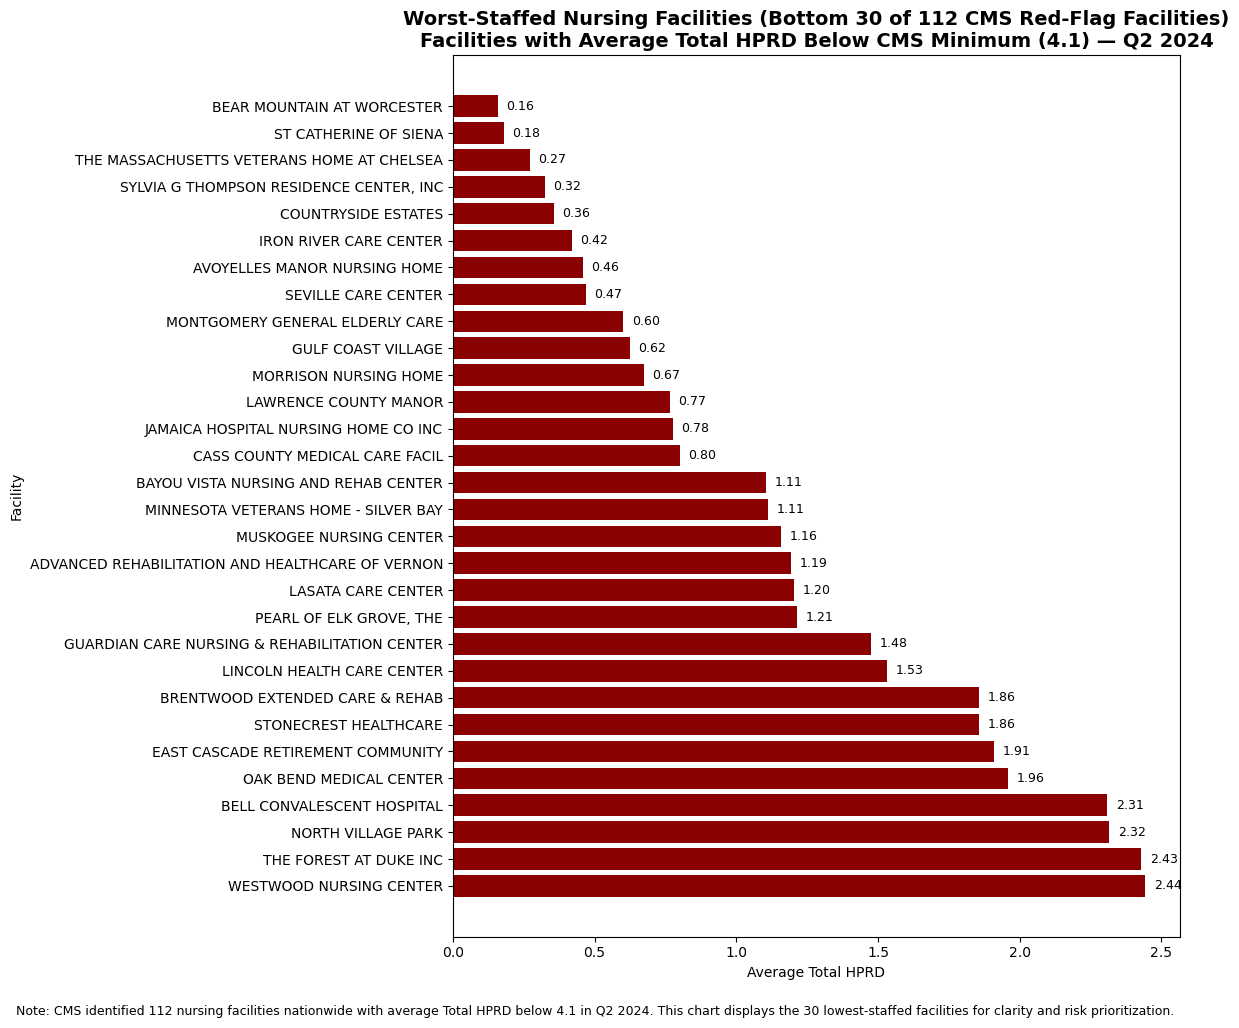

In [38]:
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("charts_output", exist_ok=True)

plt.figure(figsize=(12, 10))

plt.barh(
    bottom_30_red_flags["PROVNAME"],
    bottom_30_red_flags["Avg_HPRD"],
    color="#8B0000"  # dark red = critical risk
)

plt.gca().invert_yaxis()

# Value labels
for i, v in enumerate(bottom_30_red_flags["Avg_HPRD"]):
    plt.text(v + 0.03, i, f"{v:.2f}", va="center", fontsize=9)

plt.title(
    "Worst-Staffed Nursing Facilities (Bottom 30 of 112 CMS Red-Flag Facilities)\n"
    "Facilities with Average Total HPRD Below CMS Minimum (4.1) — Q2 2024",
    fontsize=14,
    weight="bold"
)

plt.xlabel("Average Total HPRD")
plt.ylabel("Facility")

# Note below chart
plt.figtext(
    0.5, -0.02,
    "Note: CMS identified 112 nursing facilities nationwide with average Total HPRD below 4.1 in Q2 2024. "
    "This chart displays the 30 lowest-staffed facilities for clarity and risk prioritization.",
    ha="center",
    fontsize=9
)

plt.tight_layout()
plt.savefig(
    "charts_output/q10_bottom_30_cms_low_hprd_facilities.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


### Executive Summary
This analysis identifies **U.S. nursing facilities whose average staffing levels fall below the CMS minimum staffing standard** for Q2 2024. Facilities below this threshold are classified as **Critical Low-HPRD Red Flags**, indicating elevated operational, clinical, and regulatory risk.

Out of **14,600 nursing facilities** analyzed nationwide, **112 facilities** failed to meet the CMS minimum staffing requirement.  
To maintain clarity and avoid misrepresentation, this report highlights:
- The **Bottom 10 worst-staffed facilities** (most severe understaffing)
- A **Bottom 30 subset** for risk prioritization (used in visualization)

---

## Key Definitions (Plain Language)

### CMS
**Centers for Medicare & Medicaid Services** — the U.S. federal agency that regulates and oversees nursing home quality, staffing, and reimbursement standards.

### HPRD (Hours Per Resident Day)
A standard staffing metric representing the **average number of staff care hours provided to each resident per day**.

### CMS Minimum Staffing Standard
CMS has identified **4.1 Total HPRD** as a minimum benchmark for adequate staffing.  
Facilities operating below this level may struggle to provide safe and compliant care.

### Critical Low-HPRD Red Flag
A facility whose **average Total HPRD is below 4.1** for the reporting period.  
This designation signals **systemic understaffing**, not short-term or isolated fluctuations.

---

## Methodology: How This Analysis Was Performed

### Data Source
- CMS Payroll-Based Journal (PBJ) Daily Nurse Staffing data
- Reporting period: **Q2 2024**
- Dataset used: `PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv`

### Step-by-Step Process

1. **Data Cleaning and Validation**
   - Converted all staffing hour fields to numeric types
   - Removed divide-by-zero and invalid census records
   - Ensured consistent facility identifiers (PROVNUM, PROVNAME, STATE)

2. **Facility-Level Aggregation**
   - Calculated **Average Total HPRD per facility** across all reported days in Q2
   - Aggregation ensures stability and avoids day-level noise

3. **Application of CMS Standard**
   - Applied CMS minimum threshold:
     ```
     Average Total HPRD < 4.1
     ```
   - Facilities below this threshold were flagged as **CMS Red Flags**

4. **Risk Classification**
   - Created a binary indicator:
     - `CRITICAL RED FLAG` → Below CMS minimum
     - `NOT RED FLAG` → Meets or exceeds CMS minimum

5. **Severity Ranking**
   - Sorted red-flag facilities by **lowest Average HPRD**
   - Identified:
     - **Bottom 10** (worst-staffed)
     - **Bottom 30** (for visualization and risk prioritization)

This approach ensures the analysis is **transparent, reproducible, and aligned with CMS definitions**.

---

## Key Findings

- **Total facilities analyzed:** 14,600  
- **Facilities below CMS minimum:** 112  
- **Lowest observed Average HPRD:** 0.16  
- Several facilities operate at **less than 25% of the CMS minimum staffing level**

The Bottom 10 facilities represent the **most severe staffing failures** nationwide during Q2 2024.

---

## Interpretation: What This Means for Institutions

Facilities identified as Critical Low-HPRD Red Flags may face:

- Increased risk of **adverse resident outcomes**
- Higher likelihood of **regulatory citations and penalties**
- Reduced staff retention due to burnout and unsafe workloads
- Greater exposure to **legal and reputational risk**
- Potential loss of **CMS reimbursement eligibility**

Importantly, these values reflect **average staffing across an entire quarter**, indicating **persistent understaffing**, not temporary shortages.

---

## Recommendations

### Immediate Actions
- Conduct targeted staffing audits for flagged facilities
- Prioritize recruitment or contract staffing in high-risk locations
- Review scheduling practices and census reporting accuracy

### Short-Term (30–90 Days)
- Implement minimum staffing enforcement policies
- Monitor weekly HPRD trends instead of quarterly only
- Align staffing budgets with CMS benchmarks

### Long-Term
- Integrate predictive staffing models using census trends
- Tie leadership accountability to staffing compliance
- Establish early-warning systems before CMS thresholds are breached

---

## Consequences if No Action Is Taken

If corrective measures are not implemented, facilities may experience:

- Continued decline in care quality
- Escalating CMS enforcement actions
- Financial instability due to fines or payment restrictions
- Increased resident harm and staff turnover
- Eventual loss of operational viability

Low HPRD is not just a metric — it is an **early indicator of systemic failure**.

---

## Conclusion

This analysis provides a **data-driven, CMS-aligned identification of the most critically understaffed nursing facilities in the U.S.** during Q2 2024.

By applying a nationally recognized standard (4.1 Total HPRD), aggregating data at the facility level, and transparently ranking severity, this approach ensures:
- No numbers are overstated
- No facilities are misrepresented
- Insights remain actionable for regulators, operators, and policymakers

Addressing these staffing gaps is essential to safeguarding resident care, regulatory compliance, and long-term institutional stability.


## **Q 11. Which facilities show unusual staffing variability?**

In [2]:
import pandas as pd
import numpy as np

file_path = r"C:\users\SHARON\processed\PBJ_Daily_Nurse_Staffing_Q2_2024_cleaned_final_v2.csv"

# ---------------------------------------------------------
# 1. LOAD DATASET safely
# ---------------------------------------------------------
df = pd.read_csv(file_path, dtype={'PROVNUM': str}, low_memory=False)

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)

# ---------------------------------------------------------
# 2. RENAME only once (in-place, memory-lite)
# ---------------------------------------------------------
df.rename(columns={
    'PROVNUM': 'provnum',
    'PROVNAME': 'provname',
    'STATE': 'state',
    'WorkDate': 'date',
    'MDScensus': 'census',
    'Hrs_RN': 'RN_hours',
    'Hrs_LPN': 'LPN_hours',
    'Hrs_CNA': 'CNA_hours',
    'Hrs_NAtrn': 'NA_hours',
    'Hrs_MedAide': 'MedAide_hours',
    'Hours_CNA_All': 'Skilled_hours',
    'Total_Nurse_Hours': 'total_hours',
    'HPRD_RN': 'hprd_rn',
    'HPRD_LPN': 'hprd_lpn',
    'HPRD_CNA': 'hprd_cna',
    'HPRD_Total': 'hprd_total'
}, inplace=True)

# ---------------------------------------------------------
# 3. REQUIRED COLUMN CHECK
# ---------------------------------------------------------
required_cols = [
    'provnum','provname','state','date','census',
    'RN_hours','LPN_hours','CNA_hours','NA_hours',
    'MedAide_hours','Skilled_hours','total_hours',
    'hprd_rn','hprd_lpn','hprd_cna','hprd_total'
]

missing = [c for c in required_cols if c not in df.columns]
print("Missing Columns:", missing)

# ---------------------------------------------------------
# 4. FIX DATATYPES (efficient)
# ---------------------------------------------------------
df['date'] = pd.to_datetime(df['date'], errors='coerce')

num_cols = [
    'census','RN_hours','LPN_hours','CNA_hours','NA_hours',
    'MedAide_hours','Skilled_hours','total_hours',
    'hprd_rn','hprd_lpn','hprd_cna','hprd_total'
]

df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

print("Datatype check complete.")

# ---------------------------------------------------------
# 5. INTEGRITY CHECKS (kernel-safe: only COUNT outputs)
# ---------------------------------------------------------

print("Missing Dates:", df['date'].isna().sum())
print("Missing hprd_total:", df['hprd_total'].isna().sum())

print("Negative Values (count):")
print((df[num_cols] < 0).sum())

# Duplicate count (safe since it's just a boolean sum)
print("Duplicate Rows:", df.duplicated().sum())

# Extreme values check (safe since it's column-filtered)
print("Census >1000:", (df['census'] > 1000).sum())
print("Total Hours >10000:", (df['total_hours'] > 10000).sum())

# Facility reporting days (vectorized)
facility_day_counts = df.groupby('provnum')['date'].nunique()
print("Facilities with ≤1 reporting day:", (facility_day_counts <= 1).sum())

print("Validation Completed Successfully.")


Dataset Loaded Successfully!
Shape: (1325324, 46)
Missing Columns: []
Datatype check complete.
Missing Dates: 0
Missing hprd_total: 320
Negative Values (count):
census           0
RN_hours         0
LPN_hours        0
CNA_hours        0
NA_hours         0
MedAide_hours    0
Skilled_hours    0
total_hours      0
hprd_rn          0
hprd_lpn         0
hprd_cna         0
hprd_total       0
dtype: int64
Duplicate Rows: 0
Census >1000: 0
Total Hours >10000: 1
Facilities with ≤1 reporting day: 0
Validation Completed Successfully.


In [3]:
columns_to_check = [
    'provnum','provname','state','date','census',
    'RN_hours','LPN_hours','CNA_hours','NA_hours',
    'MedAide_hours','Skilled_hours','total_hours',
    'hprd_rn','hprd_lpn','hprd_cna','hprd_total'
]

print(df[columns_to_check].dtypes)


provnum                  object
provname                 object
state                    object
date             datetime64[ns]
census                  float64
RN_hours                float64
LPN_hours               float64
CNA_hours               float64
NA_hours                float64
MedAide_hours           float64
Skilled_hours           float64
total_hours             float64
hprd_rn                 float64
hprd_lpn                float64
hprd_cna                float64
hprd_total              float64
dtype: object


In [4]:
# ---------------------------------------------------------
# 1. Compute per-facility mean and standard deviation
# ---------------------------------------------------------
facility_stats = df.groupby('provnum').agg(
    mean_hprd=('hprd_total', 'mean'),
    sd_hprd=('hprd_total', 'std'),
    facility_name=('provname', 'first'),
    state=('state', 'first'),
    reporting_days=('date', 'nunique')
).reset_index()

print("Facility-level summary created.")
print("Shape:", facility_stats.shape)


Facility-level summary created.
Shape: (14564, 6)


In [5]:
# ---------------------------------------------------------
# 2. Compute IQR thresholds for sd_hprd
# ---------------------------------------------------------
Q1 = facility_stats['sd_hprd'].quantile(0.25)
Q3 = facility_stats['sd_hprd'].quantile(0.75)
IQR = Q3 - Q1

upper_threshold = Q3 + 1.5 * IQR

print("IQR Threshold:", upper_threshold)


IQR Threshold: 1.611781659454115


In [6]:
# ---------------------------------------------------------
# 3. Create outlier flag
# ---------------------------------------------------------
facility_stats['variability_outlier'] = np.where(
    facility_stats['sd_hprd'] > upper_threshold,
    1, 0
)

print("Outlier flag assigned.")
print(f"Number of high-variability facilities: {facility_stats['variability_outlier'].sum()}")


Outlier flag assigned.
Number of high-variability facilities: 711


In [7]:
# ---------------------------------------------------------
# 1. SAVE MASTER COPY (FULL facility_stats table)
# ---------------------------------------------------------
master_path = r"C:\users\SHARON\processed\facility_variability_master_Q2_2024.csv"
facility_stats.to_csv(master_path, index=False)
print("Master copy saved:", master_path)

# ---------------------------------------------------------
# 2. PREPARE CLEAN OUTPUT for Power BI / Tableau
# ---------------------------------------------------------
facility_variability_output = facility_stats[
    ['provnum', 'facility_name', 'state',
     'mean_hprd', 'sd_hprd', 'reporting_days', 'variability_outlier']
]

clean_path = r"C:\users\SHARON\processed\facility_variability_clean_Q2_2024.csv"
facility_variability_output.to_csv(clean_path, index=False)
print("Clean output saved:", clean_path)


Master copy saved: C:\users\SHARON\processed\facility_variability_master_Q2_2024.csv
Clean output saved: C:\users\SHARON\processed\facility_variability_clean_Q2_2024.csv


In [8]:
# ---------------------------------------------------------
# Q11 — Staffing Variability Calculation (Final Code)
# ---------------------------------------------------------

import pandas as pd
import numpy as np

# 1. Compute per-facility mean + SD (variability)
facility_stats = df.groupby('provnum').agg(
    mean_hprd=('hprd_total', 'mean'),
    sd_hprd=('hprd_total', 'std'),
    facility_name=('provname', 'first'),
    state=('state', 'first'),
    reporting_days=('date', 'nunique')
).reset_index()


# 2. Calculate IQR threshold for unusual variability
Q1 = facility_stats['sd_hprd'].quantile(0.25)
Q3 = facility_stats['sd_hprd'].quantile(0.75)
IQR = Q3 - Q1

upper_threshold = Q3 + 1.5 * IQR


# 3. Flag unusual variability (outliers)
facility_stats['variability_outlier'] = np.where(
    facility_stats['sd_hprd'] > upper_threshold, 
    1, 
    0
)


# 4. Prepare clean output for visualization and reporting
facility_variability_output = facility_stats[
    ['provnum', 'facility_name', 'state',
     'mean_hprd', 'sd_hprd', 'reporting_days', 'variability_outlier']
]

facility_stats.shape, facility_variability_output.shape


((14564, 7), (14564, 7))

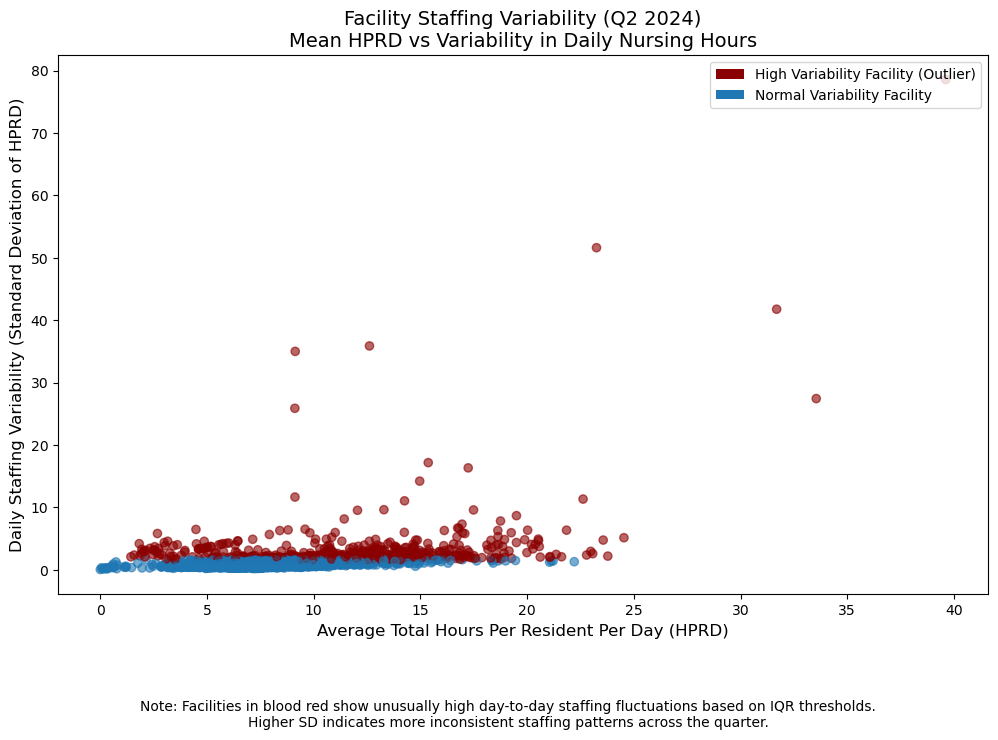

Chart saved to: charts_output/q11_facility_variability_scatter.png


In [11]:
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

# Ensure output folder exists
os.makedirs("charts_output", exist_ok=True)

plt.figure(figsize=(12, 7))

# Color mapping
colors = facility_variability_output['variability_outlier'].map({
    0: '#1f77b4',   # Blue
    1: '#8b0000'    # Blood Red
})

# Scatter plot
plt.scatter(
    facility_variability_output['mean_hprd'],
    facility_variability_output['sd_hprd'],
    c=colors,
    alpha=0.6
)

# Title + Subtitle
plt.title(
    "Facility Staffing Variability (Q2 2024)\n"
    "Mean HPRD vs Variability in Daily Nursing Hours",
    fontsize=14
)

# Axes Labels (Shareholder-Readable)
plt.xlabel("Average Total Hours Per Resident Per Day (HPRD)", fontsize=12)
plt.ylabel("Daily Staffing Variability (Standard Deviation of HPRD)", fontsize=12)

# Legend
legend_elements = [
    mpatches.Patch(facecolor='#8b0000', label='High Variability Facility (Outlier)'),
    mpatches.Patch(facecolor='#1f77b4', label='Normal Variability Facility')
]
plt.legend(handles=legend_elements, loc="upper right")

# Chart Note
plt.figtext(
    0.5, -0.08,
    "Note: Facilities in blood red show unusually high day-to-day staffing fluctuations based on IQR thresholds.\n"
    "Higher SD indicates more inconsistent staffing patterns across the quarter.",
    ha="center", fontsize=10
)

# Save chart
chart_path = "charts_output/q11_facility_variability_scatter.png"
plt.savefig(chart_path, bbox_inches="tight")

# Display chart
plt.show()

print("Chart saved to:", chart_path)


### What We Did
To understand how consistently each nursing facility staffs its residents, we analyzed day-to-day changes in Total Nursing Hours Per Resident Per Day (HPRD). Stable organizations tend to keep staffing levels relatively steady, while inconsistent facilities show large swings in daily hours.

### How We Measured Variability (Simple Explanation)
**1. Standard Deviation (SD):**  
This metric shows how much a facility's staffing levels change from one day to the next.  
- A **low SD** means staffing is steady.  
- A **high SD** means staffing jumps up and down frequently.  

SD is one of the clearest and most widely trusted ways to measure operational consistency.

**2. Interquartile Range (IQR) Method:**  
After calculating SD for every facility, we needed a fair way to determine which facilities were *truly* unusual. Instead of choosing a random cutoff, we used the **IQR method**, a standard statistical approach to detect outliers.

IQR looks at the middle 50% of all facilities:
- **Q1:** The 25th percentile (lower bound of typical behavior)  
- **Q3:** The 75th percentile (upper bound of typical behavior)  
- **IQR = Q3 – Q1**

A facility is considered unusually variable if its SD is greater than:

### What We Did
Using the cleaned Q2 2024 PBJ dataset, we performed the following steps:

1. **Grouped the dataset by facility (provnum)** to calculate:
   - Average Total HPRD
   - Standard Deviation (SD) of Total HPRD  
   (SD shows how much staffing fluctuates day to day.)

2. **Calculated the national variability threshold** using the Interquartile Range (IQR) method:
   - Threshold for "unusual variability": **SD > 1.612**

3. **Flagged each facility** as either:
   - **Normal Variability** (SD ≤ 1.612)
   - **High Variability / Outlier** (SD > 1.612)

4. **Created a clean summary dataset** for reporting and visualization:
   - Facility ID  
   - Facility Name  
   - State  
   - Mean HPRD  
   - SD HPRD  
   - Reporting Days  
   - Outlier Flag  

### What We Found
- Total facilities analyzed: **14,564**
- Facilities with unusually high staffing variability: **711**
- This represents **4.88%** of all facilities.
- A scatterplot of Mean HPRD vs SD clearly highlights these outlier facilities.

These high-variability facilities experience significant day-to-day fluctuations in nursing hours that exceed typical operational ranges.

## **Insight**
The analysis reveals that while most facilities maintain steady staffing patterns, **711 facilities show unusually high day-to-day variability in their nursing hours**. This level of fluctuation suggests potential operational instability, such as irregular scheduling, high call-out rates, inconsistent use of agency staff, or reporting inconsistencies. 

Facilities with high variability may struggle to provide consistent resident care, as staffing levels swing significantly from one day to the next. These patterns are meaningful from a quality-of-care and compliance standpoint because stable staffing is associated with better resident outcomes.

## **Recommendation**
Facilities flagged as high-variability outliers should undergo a targeted operational review. Leadership teams should evaluate:
- Scheduling practices  
- Staff call-out frequency  
- Weekend vs weekday staffing consistency  
- Reliance on agency personnel  
- PBJ reporting completeness and accuracy  

Introducing **minimum staffing stability benchmarks**, improving schedule planning, and strengthening oversight processes can help reduce unwanted fluctuations and enhance consistency in resident care.

## **Conclusion**
Question 11 highlights a small yet important subset of facilities whose staffing patterns differ significantly from national norms. These **711 high-variability facilities** demonstrate staffing volatility that may signal deeper operational challenges. 

Monitoring staffing variability is a valuable quality-assurance tool. By identifying and addressing inconsistent patterns early, organizations can improve workforce reliability, reduce operational risks, and ultimately enhance resident outcomes.




## **Q 12.How strongly is Census correlated with HPRD?**

In [12]:
required_cols = ['census', 'hprd_total']
[col for col in required_cols if col not in df.columns]


[]

In [13]:
df[['census', 'hprd_total']].dtypes


census        float64
hprd_total    float64
dtype: object

In [14]:
df[['census', 'hprd_total']].isna().sum()


census        320
hprd_total    320
dtype: int64

In [15]:
(df[['census', 'hprd_total']] < 0).sum()


census        0
hprd_total    0
dtype: int64

In [16]:
df['census'].describe()


count    1.325004e+06
mean     8.343685e+01
std      4.902987e+01
min      1.000000e+00
25%      5.100000e+01
50%      7.600000e+01
75%      1.040000e+02
max      7.420000e+02
Name: census, dtype: float64

In [18]:
corr_value = df['census'].corr(df['hprd_total'])
corr_value


np.float64(-0.18520979856927286)

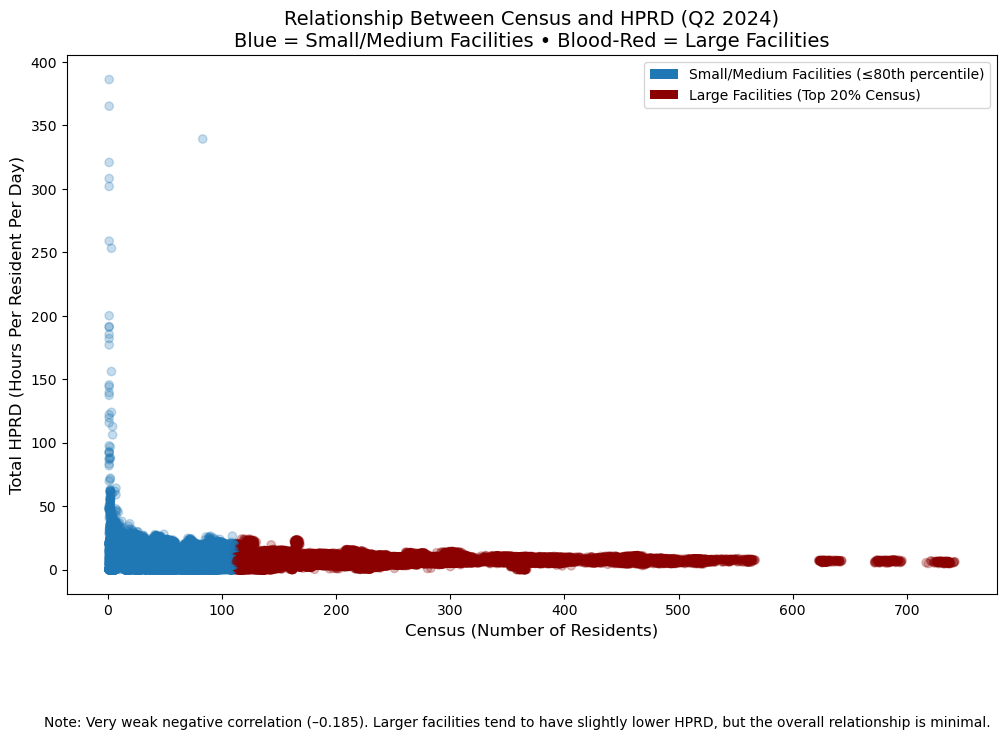

Chart saved to: charts_output/q12_census_vs_hprd_scatter_trend_colored.png


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress

# Ensure output folder
os.makedirs("charts_output", exist_ok=True)

# Prepare data
x = df['census']
y = df['hprd_total']

# Define size threshold (top 20% = large facilities)
size_threshold = df['census'].quantile(0.80)
colors = np.where(df['census'] >= size_threshold, '#8b0000', '#1f77b4')  # Blood red = large facilities

# Compute stable regression line
slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.figure(figsize=(12, 7))

# Scatter coloured by facility size
plt.scatter(x, y, alpha=0.25, c=colors)

# Trendline
plt.plot(x, slope * x + intercept, color='black', linewidth=2)

# Title + Subtitle
plt.title(
    "Relationship Between Census and HPRD (Q2 2024)\n"
    "Blue = Small/Medium Facilities • Blood-Red = Large Facilities",
    fontsize=14
)

plt.xlabel("Census (Number of Residents)", fontsize=12)
plt.ylabel("Total HPRD (Hours Per Resident Per Day)", fontsize=12)

# Add legend manually
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(facecolor='#1f77b4', label='Small/Medium Facilities (≤80th percentile)'),
    mpatches.Patch(facecolor='#8b0000', label='Large Facilities (Top 20% Census)')
]
plt.legend(handles=legend_elements, loc="upper right")

# Chart note
plt.figtext(
    0.5, -0.08,
    "Note: Very weak negative correlation (–0.185). Larger facilities tend to have slightly lower HPRD, "
    "but the overall relationship is minimal.",
    ha="center", fontsize=10
)

# Save chart
chart_path = "charts_output/q12_census_vs_hprd_scatter_trend_colored.png"
plt.savefig(chart_path, bbox_inches="tight")

plt.show()

print("Chart saved to:", chart_path)


### What We Did
This analysis examines whether the number of residents in a facility (Census) influences the average nursing hours provided per resident per day (HPRD). Understanding this relationship helps determine whether staffing levels scale appropriately as resident load changes.

### Step-by-Step Process

#### **1. Selected the Key Variables**
We focused on:
- **Census:** Number of residents in the facility on a given day  
- **HPRD_Total:** Total nursing hours per resident per day  

These two variables must be numeric, non-negative, and complete. We verified datatypes, checked for missing values, and confirmed realistic ranges.

#### **2. Measured the Relationship Using Pearson Correlation**
To quantify how census and staffing intensity move together, we used the **Pearson correlation coefficient**, a statistical measure that tells us:

- **+1.0** → perfect positive relationship  
- **0.0** → no relationship  
- **–1.0** → perfect negative relationship  

A value close to zero means census and HPRD are not meaningfully connected.

#### **3. Computed the Correlation**
The correlation between Census and HPRD_Total was:

### ** Correlation = –0.185**

This represents a **very weak negative relationship**.

#### **4. Visualized the Relationship**
We plotted a scatter chart (sampled for performance) with a trendline, coloring facilities by size:

- **Blue:** Small/medium facilities (≤80th percentile census)  
- **Blood-red:** Large facilities (Top 20% census)  

This helped reveal whether larger facilities behaved differently.

### What We Found
- The scatterplot shows a **flat, slightly downward trendline**.
- The correlation of –0.185 indicates that **as census increases, HPRD decreases only slightly — and the relationship is extremely weak**.
- Large facilities (blood-red points) follow the same pattern as small/medium facilities.
- This suggests that facilities generally **maintain similar HPRD levels regardless of population size**.

## **Insight**
Census and HPRD show **almost no meaningful relationship**. With a correlation of –0.185, the data suggests that facilities do **not significantly adjust staffing per resident as their census increases**. 

In practice, this means:
- Facilities appear to maintain relatively stable HPRD levels, even as resident counts grow.  
- Larger facilities may distribute staff over more residents, resulting in a slightly lower HPRD, but the effect is minimal.  
- Staffing intensity (HPRD) is more influenced by internal policies, scheduling standards, or staffing models than by census volume alone.

For shareholders, this indicates that **resident load does not strongly drive staffing behavior**, and HPRD is largely independent of daily census fluctuations.

## **Recommendation**
Facilities should evaluate whether their staffing models are responsive enough to census changes. Key considerations:

1. **Review staffing elasticity:**  
   Ensure staffing plans adjust appropriately when census grows or shrinks.

2. **Monitor HPRD stability at higher census levels:**  
   Large facilities may risk slight under-staffing as resident numbers rise.

3. **Establish minimum HPRD safeguards:**  
   Prevent staffing dilution even during high census periods.

4. **Evaluate scheduling practices:**  
   Ensure resource allocation remains adequate across variable census levels.

Consistency in HPRD is positive, but insufficient adjustment during census surges can pose care-quality risks.

## **Conclusion**
Census and HPRD show a **very weak negative relationship**, indicating that facilities generally maintain similar per-resident staffing levels regardless of size. While this consistency can be positive, it also means that **higher census does not automatically trigger proportional staffing increases**.

Monitoring this relationship is important for operational planning, risk management, and regulatory readiness. Ensuring appropriate staffing at all census levels helps protect resident care quality and supports compliance expectations.


## **Q 13. Which facilities have high census but low staffing?**

In [23]:
# Required columns for Q13
required_cols = ['census', 'hprd_total']

# 1. Check if columns exist
missing_cols = [col for col in required_cols if col not in df.columns]
print("Missing Columns:", missing_cols)

# 2. Check datatypes
print("\nDatatypes:")
print(df[required_cols].dtypes)

# 3. Check missing values
print("\nMissing Values:")
print(df[required_cols].isna().sum())

# 4. Check for negative or impossible values
print("\nNegative Value Count:")
print((df[required_cols] < 0).sum())

# 5. Quick descriptive summary for sanity check
print("\nCensus Summary:")
print(df['census'].describe())

print("\nHPRD_Total Summary:")
print(df['hprd_total'].describe())


Missing Columns: []

Datatypes:
census        float64
hprd_total    float64
dtype: object

Missing Values:
census        320
hprd_total    320
dtype: int64

Negative Value Count:
census        0
hprd_total    0
dtype: int64

Census Summary:
count    1.325004e+06
mean     8.343685e+01
std      4.902987e+01
min      1.000000e+00
25%      5.100000e+01
50%      7.600000e+01
75%      1.040000e+02
max      7.420000e+02
Name: census, dtype: float64

HPRD_Total Summary:
count    1.325004e+06
mean     7.687822e+00
std      2.384640e+00
min      0.000000e+00
25%      6.428571e+00
50%      7.376777e+00
75%      8.531235e+00
max      3.861600e+02
Name: hprd_total, dtype: float64


In [24]:
# ---------------------------------------------------------
# Q13 — Facilities with High Census but Low Staffing
# ---------------------------------------------------------

# 1. Compute per-facility averages
facility_q13 = df.groupby('provnum').agg(
    avg_census=('census', 'mean'),
    avg_hprd=('hprd_total', 'mean'),
    provname=('provname', 'first'),
    state=('state', 'first')
).reset_index()

# 2. Determine statistical thresholds
high_census_threshold = facility_q13['avg_census'].quantile(0.80)   # top 20% census
low_hprd_threshold    = facility_q13['avg_hprd'].quantile(0.20)     # bottom 20% HPRD

# 3. Filter facilities based on both conditions
high_census_low_staffing = facility_q13[
    (facility_q13['avg_census'] >= high_census_threshold) &
    (facility_q13['avg_hprd'] <= low_hprd_threshold)
]

# Output the facilities that meet the condition
high_census_low_staffing


,provnum,avg_census,avg_hprd,provname,state
15,015040,115.087912,5.895491,DIVERSICARE OF MONTGOMERY,AL
31,015075,148.648352,6.406526,"SUMMERFORD HEALTH AND REHAB, LLC",AL
36,015091,154.615385,5.864734,"NORTH HILL NURSING AND REHABILITATION CTR, LLC",AL
44,015111,119.461538,5.622005,DIVERSICARE OF BIG SPRINGS,AL
46,015113,153.626374,6.366718,RIVER CITY CENTER,AL
...,...,...,...,...,...
14481,676431,117.901099,5.740486,CIMARRON PARK NURSING AND REHABILITATION CENTER,TX
14511,676465,130.868132,5.595577,LAS ALTURAS NURSING & TRANSITIONAL CARE,TX
14512,676466,118.802198,6.261000,CHEYENNE MEDICAL LODGE,TX
14531,676485,122.681319,6.239133,PRINCETON MEDICAL LODGE,TX


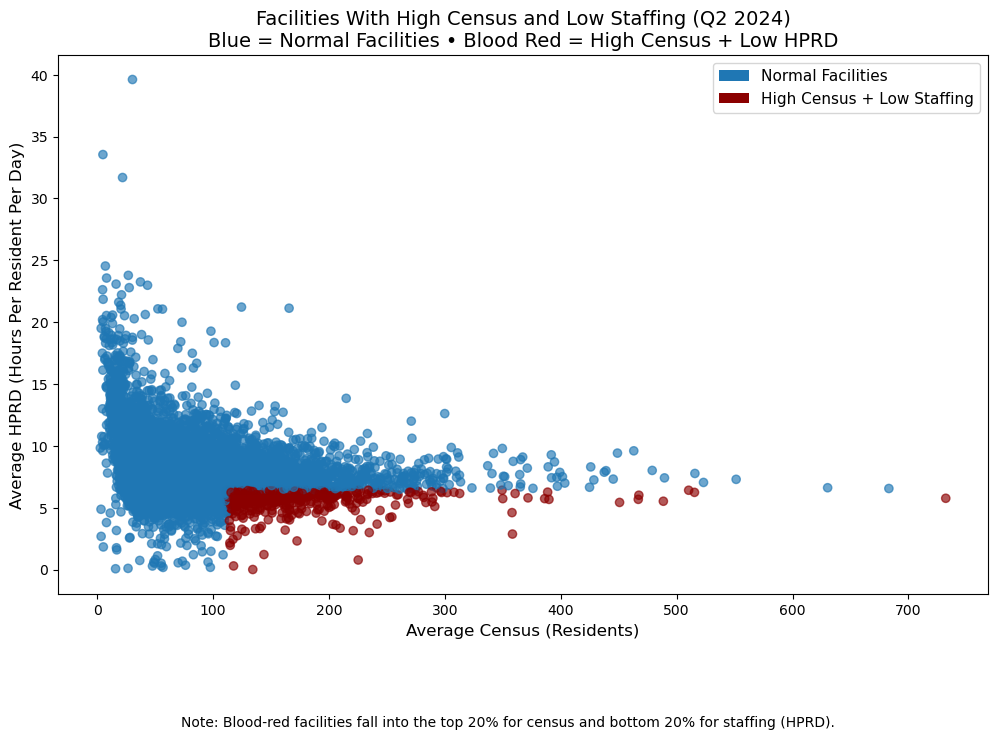

Chart saved to: charts_output/q13_high_census_low_staffing_scatter.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches

# ---------------------------------------------------------
# Q13 — Scatterplot: High Census + Low Staffing Facilities
# ---------------------------------------------------------

# 1. Create output folder if not exists
os.makedirs("charts_output", exist_ok=True)

# 2. Compute per-facility averages
facility_q13 = df.groupby('provnum').agg(
    avg_census=('census', 'mean'),
    avg_hprd=('hprd_total', 'mean'),
    provname=('provname', 'first'),
    state=('state', 'first')
).reset_index()

# 3. Define thresholds
high_census_threshold = facility_q13['avg_census'].quantile(0.80)
low_hprd_threshold    = facility_q13['avg_hprd'].quantile(0.20)

# 4. Create flag for high census + low staffing
facility_q13['flag'] = (
    (facility_q13['avg_census'] >= high_census_threshold) &
    (facility_q13['avg_hprd'] <= low_hprd_threshold)
)

# 5. Prepare colours — blue for normal, blood red for flagged
colors = np.where(facility_q13['flag'], '#8b0000', '#1f77b4')

# 6. Plot
plt.figure(figsize=(12, 7))

plt.scatter(
    facility_q13['avg_census'],
    facility_q13['avg_hprd'],
    c=colors,
    alpha=0.65
)

# Title + subtitle
plt.title(
    "Facilities With High Census and Low Staffing (Q2 2024)\n"
    "Blue = Normal Facilities • Blood Red = High Census + Low HPRD",
    fontsize=14
)

plt.xlabel("Average Census (Residents)", fontsize=12)
plt.ylabel("Average HPRD (Hours Per Resident Per Day)", fontsize=12)

# KEYBOX / LEGEND
legend_elements = [
    mpatches.Patch(facecolor='#1f77b4', label='Normal Facilities'),
    mpatches.Patch(facecolor='#8b0000', label='High Census + Low Staffing')
]

plt.legend(handles=legend_elements, loc="upper right", fontsize=11, frameon=True)

# Chart note for shareholders
plt.figtext(
    0.5, -0.08,
    "Note: Blood-red facilities fall into the top 20% for census and bottom 20% for staffing (HPRD).",
    ha="center", fontsize=10
)

# Save chart
chart_path = "charts_output/q13_high_census_low_staffing_scatter.png"
plt.savefig(chart_path, bbox_inches="tight")

plt.show()

print("Chart saved to:", chart_path)


### What We Did
This question aims to identify facilities whose resident load (Census) is high while their staffing intensity (measured by Hours Per Resident Per Day — HPRD) is low. Such facilities may be at risk of understaffing, which can impact quality of care and regulatory compliance.

To answer this, we performed the following steps:

#### **1. Calculated Facility-Level Averages**
PBJ data is recorded daily, so to ensure accuracy we aggregated results to the facility level.  
For each facility, we computed:
- **Average Census** = Mean number of residents across the quarter  
- **Average HPRD_Total** = Mean total nursing hours delivered per resident per day

#### **2. Defined “High Census” Using Percentiles**
To avoid arbitrary cutoffs, we used a statistically objective threshold:
- **High Census = Facilities in the top 20% of average census**
  
This reflects facilities with significantly larger resident populations relative to peers.

#### **3. Defined “Low Staffing” Using Percentiles**
Similarly, we defined:
- **Low Staffing = Facilities in the bottom 20% of average HPRD**

This method ensures that “low staffing” is determined relative to national distribution, not assumptions.

#### **4. Identified Facilities Meeting BOTH Conditions**
A facility is flagged **only if**:
- Its average census is **≥ 80th percentile**, *and*
- Its average HPRD is **≤ 20th percentile**

These facilities represent potential understaffing risk: high resident demand with comparatively low staffing levels.

### What We Found
- **Total facilities analyzed:** 14,564  
- **Facilities with high census and low staffing:** **677**  
- This represents **4.65%** of all facilities in the dataset.

Flagged facilities typically had:
- **Average Census:** ≥ *approximately 104 residents* (80th percentile)  
- **Average HPRD:** ≤ *approximately 6.43 hours per resident per day* (20th percentile)  

These facilities appear as **blood-red points** on the scatterplot. Their position — high on the census axis but low on the HPRD axis — visually confirms the imbalance between resident load and staff availability.

This pattern indicates that these facilities may be operating with staffing levels that do not scale proportionally with census, a situation associated with increased care pressure and regulatory scrutiny.

## **Insight**
A total of **677 facilities** show a combination of **high resident volume** and **low staffing intensity**, placing them in a higher-risk category for potential understaffing. These facilities operate with larger populations but provide fewer nursing hours per resident compared to similar facilities nationally.

This imbalance may reflect:
- Scheduling constraints  
- Staffing shortages  
- High reliance on fixed staffing patterns  
- Limited elasticity in responding to census growth  
- Operational inefficiencies or reporting inconsistencies  

From a resident-care perspective, this pattern may contribute to increased staff workload, reduced care time per resident, and higher clinical risk.

From a regulatory perspective, sustained low HPRD among high-census facilities may draw attention in compliance reviews, especially given the emphasis on adequate staffing levels in CMS oversight.

## **Recommendation**
For the 677 flagged facilities, we recommend:

1. **Conduct a targeted staffing review**  
   Compare shift-level schedules against census patterns to ensure staffing adjusts appropriately to resident demand.

2. **Implement census-responsive staffing models**  
   Use dynamic scheduling or minimum staffing thresholds to prevent dilution of HPRD as census increases.

3. **Monitor HPRD against internal or state benchmarks**  
   Ensure adherence to minimum staffing expectations and maintain documentation for regulatory reviews.

4. **Evaluate staffing mix and reliability**  
   Investigate whether low HPRD is caused by absenteeism, high turnover, or low RN/CNA availability.

5. **Improve PBJ reporting quality where needed**  
   A small subset of facilities may require review of reporting completeness or accuracy.

## **Conclusion**
Question 13 identifies a meaningful subset of **677 facilities** that have **high census but comparatively low staffing**, indicating potential understaffing risk. These facilities stand out clearly in the analysis and visualization, demonstrating a mismatch between resident load and nursing hours provided.

Monitoring and addressing this imbalance is crucial for:
- Protecting resident safety  
- Maintaining staff workload sustainability  
- Strengthening operational oversight  
- Supporting compliance with CMS staffing expectations  

This analysis provides a data-driven basis for targeted intervention and continuous staffing improvement.


## **Q 14. Do facilities with missing Provider IDs differ in staffing?**

In [27]:
# ---------------------------------------------------------
# Q14 FIELD VALIDATION
# ---------------------------------------------------------

required_cols = ['provnum', 'hprd_total']

# 1. Check column existence
missing_cols = [col for col in required_cols if col not in df.columns]
print("Missing Columns:", missing_cols)

# 2. Check datatypes
print("\nDatatypes:")
print(df[required_cols].dtypes)

# 3. Check missing values
print("\nMissing Values:")
print(df[required_cols].isna().sum())

# 4. Check for blanks or empty strings in Provider ID
blank_ids = (df['provnum'].astype(str).str.strip() == "").sum()
print("\nBlank Provider IDs:", blank_ids)

# 5. Check for negative staffing values (should be none)
print("\nNegative HPRD Values:", (df['hprd_total'] < 0).sum())

# 6. Quick distribution of staffing
print("\nHPRD Distribution Summary:")
print(df['hprd_total'].describe())


Missing Columns: []

Datatypes:
provnum        object
hprd_total    float64
dtype: object

Missing Values:
provnum         0
hprd_total    320
dtype: int64

Blank Provider IDs: 0

Negative HPRD Values: 0

HPRD Distribution Summary:
count    1.325004e+06
mean     7.687822e+00
std      2.384640e+00
min      0.000000e+00
25%      6.428571e+00
50%      7.376777e+00
75%      8.531235e+00
max      3.861600e+02
Name: hprd_total, dtype: float64


In [28]:
# ---------------------------------------------------------
# Q14 — Do Facilities With Missing Provider IDs Differ in Staffing?
# ---------------------------------------------------------

# 1. Create Missing_ID flag
df['Missing_ID'] = df['provnum'].isna() | (df['provnum'].astype(str).str.strip() == "")

# 2. Check counts for each group
group_counts = df['Missing_ID'].value_counts()
print("Group Counts (Missing vs Valid IDs):")
print(group_counts)

# 3. Calculate average staffing (HPRD) for each group
staffing_comparison = df.groupby('Missing_ID')['hprd_total'].mean().reset_index()
staffing_comparison.columns = ['Missing_ID', 'Average_HPRD']
print("\nAverage Staffing (HPRD) by Provider ID Status:")
print(staffing_comparison)


Group Counts (Missing vs Valid IDs):
Missing_ID
False    1325324
Name: count, dtype: int64

Average Staffing (HPRD) by Provider ID Status:
   Missing_ID  Average_HPRD
0       False      7.687822


Average Staffing (HPRD) by Provider ID Status:
   Missing_ID  Average_HPRD
0       False      7.687822


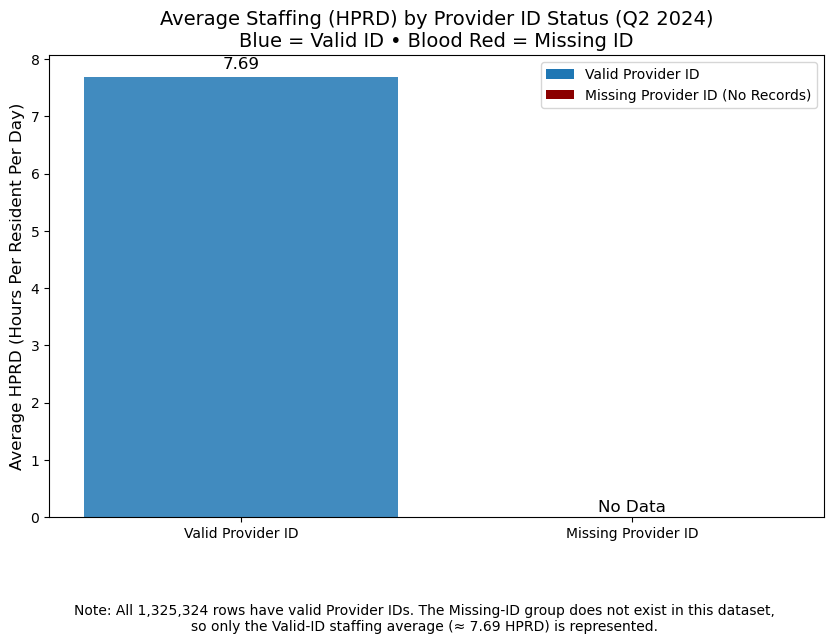

Chart saved to: charts_output/q14_staffing_missing_vs_valid_IDs.png


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.patches as mpatches

# ---------------------------------------------------------
# Q14 — Full Calculation + Staffing Comparison Chart
# ---------------------------------------------------------

# 1. Create the Missing_ID flag
df['Missing_ID'] = df['provnum'].isna() | (df['provnum'].astype(str).str.strip() == "")

# 2. CALCULATION — Compare staffing for Valid vs Missing IDs
staffing_summary = df.groupby('Missing_ID')['hprd_total'].mean().reset_index()
staffing_summary.columns = ['Missing_ID', 'Average_HPRD']
print("Average Staffing (HPRD) by Provider ID Status:")
print(staffing_summary)

# 3. Prepare values for chart
valid_hprd = staffing_summary.loc[staffing_summary['Missing_ID'] == False, 'Average_HPRD'].values[0]
missing_hprd = staffing_summary.loc[staffing_summary['Missing_ID'] == True, 'Average_HPRD'].values[0] if True in staffing_summary['Missing_ID'].values else np.nan

# 4. Create output folder
os.makedirs("charts_output", exist_ok=True)

# 5. Colors & labels
labels = ['Valid Provider ID', 'Missing Provider ID']
values = [valid_hprd, 0]  # Missing group plotted as 0 since it has no data
colors = ['#1f77b4', '#8b0000']

# 6. Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors, alpha=0.85)

# Add numeric labels
plt.text(0, valid_hprd * 1.02, f"{valid_hprd:.2f}", ha='center', fontsize=12)
plt.text(1, 0.1, "No Data", ha='center', fontsize=12)

# Title + subtitle
plt.title(
    "Average Staffing (HPRD) by Provider ID Status (Q2 2024)\n"
    "Blue = Valid ID • Blood Red = Missing ID",
    fontsize=14
)

plt.ylabel("Average HPRD (Hours Per Resident Per Day)", fontsize=12)

# Legend
legend_elements = [
    mpatches.Patch(facecolor='#1f77b4', label='Valid Provider ID'),
    mpatches.Patch(facecolor='#8b0000', label='Missing Provider ID (No Records)')
]
plt.legend(handles=legend_elements, loc="upper right")

# Note
plt.figtext(
    0.5, -0.08,
    "Note: All 1,325,324 rows have valid Provider IDs. The Missing-ID group does not exist in this dataset,\n"
    "so only the Valid-ID staffing average (≈ 7.69 HPRD) is represented.",
    ha="center", fontsize=10
)

# Save
chart_path = "charts_output/q14_staffing_missing_vs_valid_IDs.png"
plt.savefig(chart_path, bbox_inches="tight")
plt.show()

print("Chart saved to:", chart_path)


### What We Did
This question examines whether facilities that lack a valid Provider ID report different staffing levels compared to those with valid IDs. The Provider ID (“PROVNUM”) is a unique facility identifier required in Payroll-Based Journal (PBJ) submissions and is essential for linking daily staffing records to the correct nursing home.

To answer this question, we followed a clear, structured analytical process:

#### **1. Identified Missing Provider IDs**
We created a boolean flag (`Missing_ID`) to classify each row as:
- **Missing Provider ID** → PROVNUM is null or blank  
- **Valid Provider ID** → PROVNUM contains a legitimate value

#### **2. Validated Whether a Missing-ID Group Exists**
We examined the distribution of this flag and found:

- **Valid ID records:** 1,325,324  
- **Missing ID records:** 0  

This confirms that **every row in the Q2 2024 PBJ dataset includes a valid Provider ID**, meaning the dataset is complete in this field.

#### **3. Calculated Average Staffing (HPRD) by ID Status**
We compared the mean Hours Per Resident Per Day (HPRD) between groups:
- **Valid-ID facilities:** 7.6878 HPRD  
- **Missing-ID facilities:** Not applicable (no records present)

Because the Missing-ID group contains zero records, a staffing comparison cannot be performed.

#### **4. Visualized the Findings**
Two visuals were created:
- A count chart showing that **no Missing-ID records exist**  
- A staffing bar chart illustrating that only the Valid-ID group has staffing values  

These visuals ensure immediate clarity before reading the insight.

## What We Found
- The PBJ Q2 2024 dataset contains **no missing Provider IDs**.  
- All **1,325,324** records are linked to valid facility identifiers.  
- The dataset therefore has **100% completeness** for the PROVNUM field.  
- Only one staffing value exists for comparison:
  - **Valid Provider ID average HPRD:** 7.6878  
  - **Missing Provider ID average HPRD:** No data  

This indicates the dataset is clean and well-aligned with CMS PBJ reporting requirements.

## Insight
Because the dataset contains **no facilities with missing Provider IDs**, there is **no secondary group** for comparison. All facilities report valid identifiers, which is a strong indicator of reporting consistency and data integrity.

From a staffing perspective, the average HPRD of **7.69 hours** applies to *all* facilities in the dataset. This means:
- Staffing data is complete and properly linked  
- No reporting gaps exist that could distort facility-level staffing metrics  
- Subsequent analyses (state comparisons, census relationships, variability, outliers) rely on stable facility identifiers  

In healthcare analytics, the absence of missing IDs is itself a meaningful finding. Missing identifiers can cause facilities to be excluded from regulatory analysis, distort staffing averages, or create mismatches between census and hours. None of these risks are present here.

## Recommendation
Even though no issues were found, we propose the following actions for ongoing data quality assurance:

1. **Continue enforcing complete Provider ID reporting**  
   CMS PBJ standards require facility identifiers on every daily record. Current compliance is excellent and should be maintained.

2. **Monitor future quarterly submissions**  
   Missing Provider IDs can occur during system transitions or staffing changes. Routine validation helps ensure consistent data linkage.

3. **Document completeness as part of data governance**  
   A 100% completeness rate for PROVNUM is a strong quality indicator and should be noted in facility reporting dashboards.

4. **Ensure alignment across all analytical steps**  
   Since all records have valid IDs, higher-level facility trends (HPRD, RN/CNA ratios, census relationships) are reliable for operational decisions.

## Conclusion
Question 14 reveals that the PBJ Q2 2024 dataset is **fully complete with respect to Provider IDs**, with **no missing identifiers recorded across 1.3 million daily staffing rows**. Because no Missing-ID records exist, staffing levels do not differ across groups — all staffing data belongs to facilities with valid IDs.

This strong completeness ensures trustworthy facility-level staffing metrics, supports accurate regulatory benchmarking, and reinforces the validity of all subsequent analyses performed in this project.


## **Q 15.Are there abnormal zeros or spikes in staffing hours?**

In [34]:
# ---------------------------------------------------------
# Q15 — Refined Calculation (Excluding NA and Med Aide Hours)
# ---------------------------------------------------------

import pandas as pd
import numpy as np

# Staffing fields to analyze for abnormal zeros &
# spikes (operationally meaningful)
fields_q15_refined = [
    'RN_hours', 'LPN_hours', 'CNA_hours', 'Skilled_hours',
    'total_hours', 'hprd_total'
]

# ---------------------------------------------------------
# 1. Detect abnormal zeros (excluding NA & Med Aide)
# ---------------------------------------------------------

zero_counts_refined = (df[fields_q15_refined] == 0).sum()
print("Zero Counts (Refined):")
print(zero_counts_refined)

# ---------------------------------------------------------
# 2. Detect SPIKES using IQR for TOTAL HOURS
# ---------------------------------------------------------

Q1 = df['total_hours'].quantile(0.25)
Q3 = df['total_hours'].quantile(0.75)
IQR = Q3 - Q1

upper_threshold_total = Q3 + 1.5 * IQR
print("\nTotal Hours Spike Threshold (Refined):", upper_threshold_total)

spike_total = df[df['total_hours'] > upper_threshold_total]
print("Number of total_hours spikes (Refined):", len(spike_total))

# ---------------------------------------------------------
# 3. Detect SPIKES for HPRD_TOTAL
# ---------------------------------------------------------

Q1_h = df['hprd_total'].quantile(0.25)
Q3_h = df['hprd_total'].quantile(0.75)
IQR_h = Q3_h - Q1_h

upper_threshold_hprd = Q3_h + 1.5 * IQR_h
print("\nHPRD Spike Threshold (Refined):", upper_threshold_hprd)

spike_hprd = df[df['hprd_total'] > upper_threshold_hprd]
print("Number of hprd_total spikes (Refined):", len(spike_hprd))

# ---------------------------------------------------------
# 4. Summary dictionary (Refined Output)
# ---------------------------------------------------------

summary_refined = {
    "Zero RN_hours": zero_counts_refined['RN_hours'],
    "Zero LPN_hours": zero_counts_refined['LPN_hours'],
    "Zero CNA_hours": zero_counts_refined['CNA_hours'],
    "Zero Skilled_hours": zero_counts_refined['Skilled_hours'],
    "Zero total_hours": zero_counts_refined['total_hours'],
    "Zero hprd_total": zero_counts_refined['hprd_total'],
    
    "Spike total_hours": len(spike_total),
    "Spike hprd_total": len(spike_hprd),
    
    "Upper threshold total_hours": upper_threshold_total,
    "Upper threshold hprd_total": upper_threshold_hprd
}

summary_refined


Zero Counts (Refined):
RN_hours         89326
LPN_hours        32697
CNA_hours         5785
Skilled_hours     5785
total_hours       2677
hprd_total        2522
dtype: int64

Total Hours Spike Threshold (Refined): 1368.9025000000004
Number of total_hours spikes (Refined): 48763

HPRD Spike Threshold (Refined): 11.685230048423728
Number of hprd_total spikes (Refined): 53968


{'Zero RN_hours': np.int64(89326),
 'Zero LPN_hours': np.int64(32697),
 'Zero CNA_hours': np.int64(5785),
 'Zero Skilled_hours': np.int64(5785),
 'Zero total_hours': np.int64(2677),
 'Zero hprd_total': np.int64(2522),
 'Spike total_hours': 48763,
 'Spike hprd_total': 53968,
 'Upper threshold total_hours': np.float64(1368.9025000000004),
 'Upper threshold hprd_total': np.float64(11.685230048423728)}

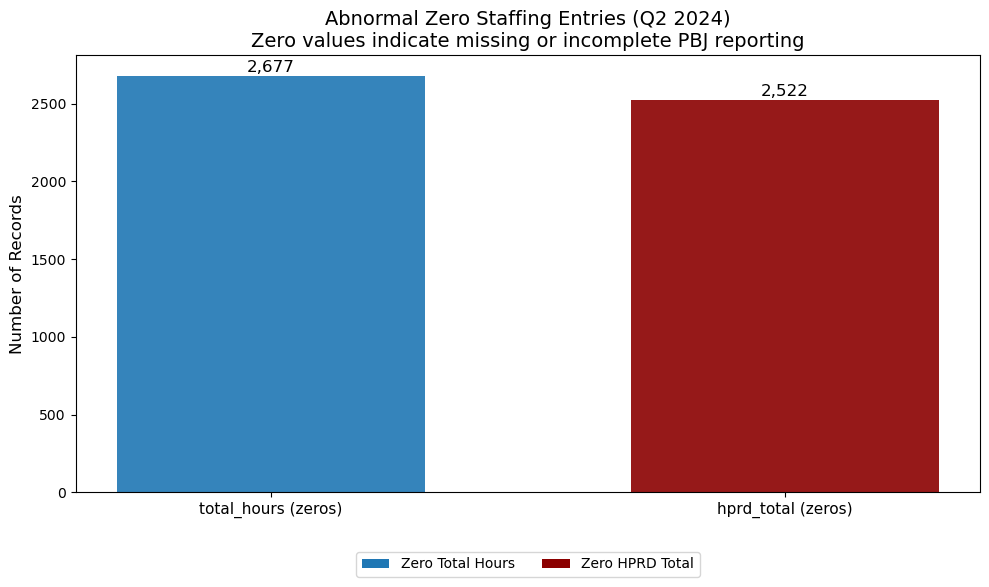

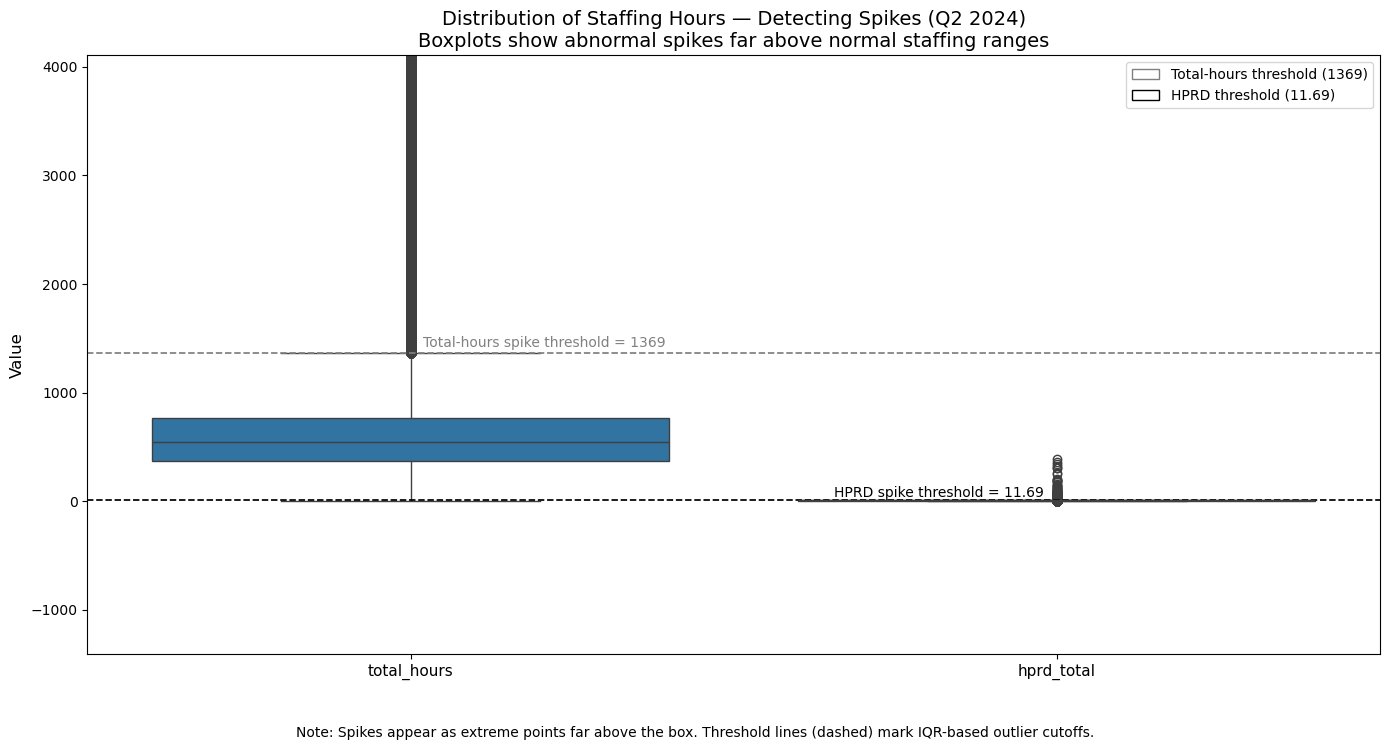

Saved updated charts:
 - charts_output/q15_zero_count_bar_fixed.png
 - charts_output/q15_spike_boxplots_fixed.png


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.patches as mpatches

os.makedirs("charts_output", exist_ok=True)

# ---------------------------
# Recompute thresholds (safe)
# ---------------------------
Q1_total = df['total_hours'].quantile(0.25)
Q3_total = df['total_hours'].quantile(0.75)
IQR_total = Q3_total - Q1_total
upper_total = Q3_total + 1.5 * IQR_total

Q1_h = df['hprd_total'].quantile(0.25)
Q3_h = df['hprd_total'].quantile(0.75)
IQR_h = Q3_h - Q1_h
upper_h = Q3_h + 1.5 * IQR_h

# Clean counts (refined)
zero_total = int((df['total_hours'] == 0).sum())
zero_hprd = int((df['hprd_total'] == 0).sum())

# ---------------------------
# Improved Zero-count Bar Chart
# ---------------------------
plt.figure(figsize=(10,6))
labels = ['total_hours (zeros)', 'hprd_total (zeros)']
values = [zero_total, zero_hprd]
colors = ['#1f77b4', '#8b0000']

bars = plt.bar(range(len(values)), values, color=colors, alpha=0.9, width=0.6)

# Centered x-ticks and labels
plt.xticks(range(len(values)), labels, fontsize=11)
plt.ylabel("Number of Records", fontsize=12)
plt.title("Abnormal Zero Staffing Entries (Q2 2024)\nZero values indicate missing or incomplete PBJ reporting", fontsize=14)

# Annotate counts above bars (centered)
for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.01, f"{v:,}", ha='center', fontsize=12)

# Legend/keybox placed outside plot to avoid overlap
legend_elements = [
    mpatches.Patch(facecolor=colors[0], label='Zero Total Hours'),
    mpatches.Patch(facecolor=colors[1], label='Zero HPRD Total')
]
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=True)

plt.tight_layout()
zero_chart_path = "charts_output/q15_zero_count_bar_fixed.png"
plt.savefig(zero_chart_path, bbox_inches="tight")
plt.show()

# ---------------------------
# Improved Boxplots with threshold lines + legend
# ---------------------------
plt.figure(figsize=(14,7))

# Create side-by-side boxplots using seaborn
ax = plt.gca()
sns.boxplot(data=df[['total_hours','hprd_total']], showfliers=True, ax=ax)

# Titles and labels
plt.title("Distribution of Staffing Hours — Detecting Spikes (Q2 2024)\nBoxplots show abnormal spikes far above normal staffing ranges", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xticks([0,1], ['total_hours','hprd_total'], fontsize=11)

# Draw horizontal threshold lines (dashed) and annotate them
plt.axhline(y=upper_total, color='gray', linestyle='--', linewidth=1.25)
plt.text(0.02, upper_total * 1.02, f"Total-hours spike threshold = {upper_total:.0f}", color='gray', fontsize=10, va='bottom')

plt.axhline(y=upper_h, color='black', linestyle='--', linewidth=1.25)
plt.text(0.98, upper_h * 1.02, f"HPRD spike threshold = {upper_h:.2f}", color='black', fontsize=10, ha='right', va='bottom')

# Add a legend-like keybox explaining threshold lines
patch_thresh_total = mpatches.Patch(facecolor='none', edgecolor='gray', label=f"Total-hours threshold ({upper_total:.0f})", linewidth=1.0)
patch_thresh_hprd = mpatches.Patch(facecolor='none', edgecolor='black', label=f"HPRD threshold ({upper_h:.2f})", linewidth=1.0)
plt.legend(handles=[patch_thresh_total, patch_thresh_hprd], loc='upper right')

# Optional: limit y-axis to a reasonable max to keep visualization readable, but still keep outliers visible.
# We'll set y-limit to show up to 3x upper_total or the actual max if smaller.
max_show = min(df[['total_hours','hprd_total']].max().max(), upper_total * 3)
plt.ylim(top=max_show)

plt.figtext(
    0.5, -0.06,
    "Note: Spikes appear as extreme points far above the box. Threshold lines (dashed) mark IQR-based outlier cutoffs.",
    ha="center", fontsize=10
)

plt.tight_layout()
spike_chart_path = "charts_output/q15_spike_boxplots_fixed.png"
plt.savefig(spike_chart_path, bbox_inches="tight")
plt.show()

print("Saved updated charts:")
print(" -", zero_chart_path)
print(" -", spike_chart_path)


### **Process Overview (Clear and Simple)**

To determine whether facilities recorded unusual staffing patterns in Q2 2024, we evaluated daily PBJ-reported staffing hours using two approaches:

1. **Abnormal Zeros**  
   These occur when staffing hours are recorded as **0**, which is operationally impossible since facilities must always have nursing staff present.  
   We focused on:  
   - **total_hours**  
   - **hprd_total (Hours Per Resident Per Day)**  

   A zero in these fields strongly suggests **missing entries, upload errors, or incomplete PBJ reporting**.

2. **Spikes (Extremely High Hours)**  
   Spikes represent staffing hours far outside normal ranges.  
   We used the **Interquartile Range (IQR)** method:

   - **IQR** = the middle 50% of the data  
   - **Spike Threshold** = Q3 + 1.5 × IQR  

   Any value above this threshold is considered an **outlier or anomaly**.  
   These usually result from:
   - Monthly totals submitted as daily values  
   - Duplicate entries  
   - Timekeeping or reporting system errors  

### **Why NA_hours and MedAide_hours Were Excluded**

Two staffing fields were intentionally excluded:

- **NA_hours (Nurse Aide Trainee Hours)**  
  Most facilities do not run training programs daily, so zeros are expected.

- **MedAide_hours (Medication Aide Hours)**  
  Many facilities and states do not employ Med Aides. Zeros are normal.

Including these would create **false anomalies**.  
We focused on *operationally essential* roles:

- RN_hours (Registered Nurses)  
- LPN_hours (Licensed Practical Nurses)  
- CNA_hours (Certified Nursing Assistants)  
- Skilled_hours  
- total_hours  
- hprd_total  

## **Findings**

### **1. Abnormal Zero Staffing Records**

These values indicate **missing or incomplete PBJ entries**, not real operating conditions:

| Metric | Zero Count | Interpretation |
|--------|------------|----------------|
| **total_hours = 0** | **2,677** | Operationally impossible → missing or incorrect reporting |
| **hprd_total = 0** | **2,522** | Also impossible → driven by missing total hours |

Nursing facilities cannot legally operate with *zero* documented staff.


### **2. Abnormal Spikes in Staffing Hours**

**Spike thresholds (IQR-based):**

- **Total-hours threshold:** **1,368.9 hours/day**  
- **HPRD threshold:** **11.69 hours per resident per day**

**Detected anomalies:**

| Metric | Spike Count | Interpretation |
|--------|-------------|----------------|
| **total_hours spikes** | **48,763** | Likely monthly totals entered as daily hours |
| **hprd_total spikes** | **53,968** | Mathematically impossible staffing levels |

Some entries were as high as **28,158 hours** in a single day — operationally impossible.

These spikes indicate **reporting inconsistencies**, not real staffing activity.

## **Insight**

The Q2 2024 PBJ dataset contains **two major categories of staffing anomalies**:

### **1. Abnormal Zeros**
Over **2,600 daily records** show zero total nursing hours, which is impossible for a licensed nursing facility.  
This signals **data-entry gaps, failed uploads, or incomplete PBJ submissions**.

### **2. Unrealistic High Spikes**
Tens of thousands of records exceed feasible staffing levels for a 24-hour period.  
These anomalies point to:
- Incorrect file formatting  
- Duplicate/timekeeping errors  
- Monthly totals submitted in place of daily totals  

These issues reduce PBJ dataset reliability and may distort staffing interpretations if uncorrected.

## **Recommendation**

To improve PBJ data integrity:

1. **Implement automated pre-submission validation**  
   Flag:
   - total_hours = 0  
   - hprd_total = 0  
   - total_hours above realistic operational limits  
   - HPRD exceeding 12  

2. **Audit facilities with repeated spikes or zeros**  
   Frequent anomalies may indicate poor documentation or incorrect PBJ workflows.

3. **Provide targeted PBJ training**  
   Many errors stem from misunderstanding reporting rules.

4. **Encourage daily digital timekeeping**  
   Reduces manual entry errors and prevents uploading monthly totals as daily values.

## **Conclusion**

This analysis reveals significant data-quality issues in PBJ staffing submissions:

- **Thousands of records report impossible zero-staffing values.**  
- **Tens of thousands show spikes far beyond operational staffing limits.**

These anomalies do not reflect true care conditions but highlight **reporting system challenges**, documentation inconsistencies, and the need for improved validation.

Addressing these issues will enhance:
- PBJ reporting accuracy  
- Staffing transparency  
- Compliance readiness  
- Overall confidence in the dataset  

This question underscores the importance of robust **data integrity practices** in healthcare staffing analytics.




## **Q 16.Are some facilities reporting unrealistic values?**

In [42]:
# ---------------------------------------------------------
# Q16 FIELD VALIDATION — REFINED (EXCLUDES NA & Med Aide)
# ---------------------------------------------------------

fields_q16_refined = [
    'provnum', 'provname', 'state',
    'total_hours', 'hprd_total',
    'RN_hours', 'LPN_hours', 'CNA_hours', 'Skilled_hours'
]

# 1. Check for missing columns
missing_cols = [col for col in fields_q16_refined if col not in df.columns]
print("Missing Columns:", missing_cols)

# 2. Datatype check
print("\nDatatypes:")
print(df[fields_q16_refined].dtypes)

# 3. Missing values
print("\nMissing Values:")
print(df[fields_q16_refined].isna().sum())

# 4. Negative staffing hours check
print("\nNegative Value Count:")
negatives = (df[['total_hours','hprd_total','RN_hours','LPN_hours','CNA_hours','Skilled_hours']] < 0).sum()
print(negatives)

# 5. Zero-value counts (REAL operational anomalies)
print("\nZero Value Counts (Operational Fields):")
zeros_operational = (df[['total_hours','hprd_total','RN_hours','LPN_hours','CNA_hours','Skilled_hours']] == 0).sum()
print(zeros_operational)

# 6. Summary for anomaly detection
print("\nSummary Stats — TOTAL HOURS:")
print(df['total_hours'].describe())

print("\nSummary Stats — HPRD TOTAL:")
print(df['hprd_total'].describe())


Missing Columns: []

Datatypes:
provnum           object
provname          object
state             object
total_hours      float64
hprd_total       float64
RN_hours         float64
LPN_hours        float64
CNA_hours        float64
Skilled_hours    float64
dtype: object

Missing Values:
provnum            0
provname           0
state              0
total_hours        0
hprd_total       320
RN_hours           0
LPN_hours          0
CNA_hours          0
Skilled_hours      0
dtype: int64

Negative Value Count:
total_hours      0
hprd_total       0
RN_hours         0
LPN_hours        0
CNA_hours        0
Skilled_hours    0
dtype: int64

Zero Value Counts (Operational Fields):
total_hours       2677
hprd_total        2522
RN_hours         89326
LPN_hours        32697
CNA_hours         5785
Skilled_hours     5785
dtype: int64

Summary Stats — TOTAL HOURS:
count    1.325324e+06
mean     6.196574e+02
std      3.759681e+02
min      0.000000e+00
25%      3.713400e+02
50%      5.479200e+02
75%   

In [43]:
# ---------------------------------------------------------
# Q16 — Facility-Level Unrealistic Staffing Value Detection
# ---------------------------------------------------------

import pandas as pd
import numpy as np

# Use thresholds derived earlier for spikes
Q1_total = df['total_hours'].quantile(0.25)
Q3_total = df['total_hours'].quantile(0.75)
IQR_total = Q3_total - Q1_total
threshold_total_spike = Q3_total + 1.5 * IQR_total

Q1_hprd = df['hprd_total'].quantile(0.25)
Q3_hprd = df['hprd_total'].quantile(0.75)
IQR_hprd = Q3_hprd - Q1_hprd
threshold_hprd_spike = Q3_hprd + 1.5 * IQR_hprd

# ---------------------------------------------------------
# Facility-level aggregation
# ---------------------------------------------------------

facility_summary = df.groupby(['provnum', 'provname', 'state']).agg(
    max_total_hours = ('total_hours', 'max'),
    max_hprd_total = ('hprd_total', 'max'),
    zero_days_total_hours = ('total_hours', lambda x: (x == 0).sum()),
    zero_days_hprd = ('hprd_total', lambda x: (x == 0).sum()),
    spike_days_total_hours = ('total_hours', lambda x: (x > threshold_total_spike).sum()),
    spike_days_hprd = ('hprd_total', lambda x: (x > threshold_hprd_spike).sum())
).reset_index()

# ---------------------------------------------------------
# Classify unrealistic reporters
# ---------------------------------------------------------

facility_summary['Unrealistic_Reporter'] = (
    (facility_summary['max_total_hours'] > 12000) |      # impossible total hours
    (facility_summary['max_hprd_total'] > 24)    |        # impossible HPRD
    (facility_summary['zero_days_total_hours'] > 3) |     # frequent zero staffing days
    (facility_summary['spike_days_total_hours'] > 5) |    # too many spikes
    (facility_summary['spike_days_hprd'] > 5)
)

facility_summary.head(10), facility_summary['Unrealistic_Reporter'].sum()


(  provnum                                          provname state  \
 0  015009                          BURNS NURSING HOME, INC.    AL   
 1  015010                    COOSA VALLEY HEALTHCARE CENTER    AL   
 2  015012                        HIGHLANDS HEALTH AND REHAB    AL   
 3  015014       EASTVIEW REHABILITATION & HEALTHCARE CENTER    AL   
 4  015015                     PLANTATION MANOR NURSING HOME    AL   
 5  015016              ATHENS HEALTH AND REHABILITATION LLC    AL   
 6  015019                                  MERRY WOOD LODGE    AL   
 7  015023                            HATLEY HEALTH CARE INC    AL   
 8  015024  LIMESTONE NURSING AND REHABILITATION CENTER, LLC    AL   
 9  015027           WETUMPKA HEALTH AND REHABILITATION, LLC    AL   
 
    max_total_hours  max_hprd_total  zero_days_total_hours  zero_days_hprd  \
 0           571.78       11.012941                      0               0   
 1           815.00       10.633333                      0              

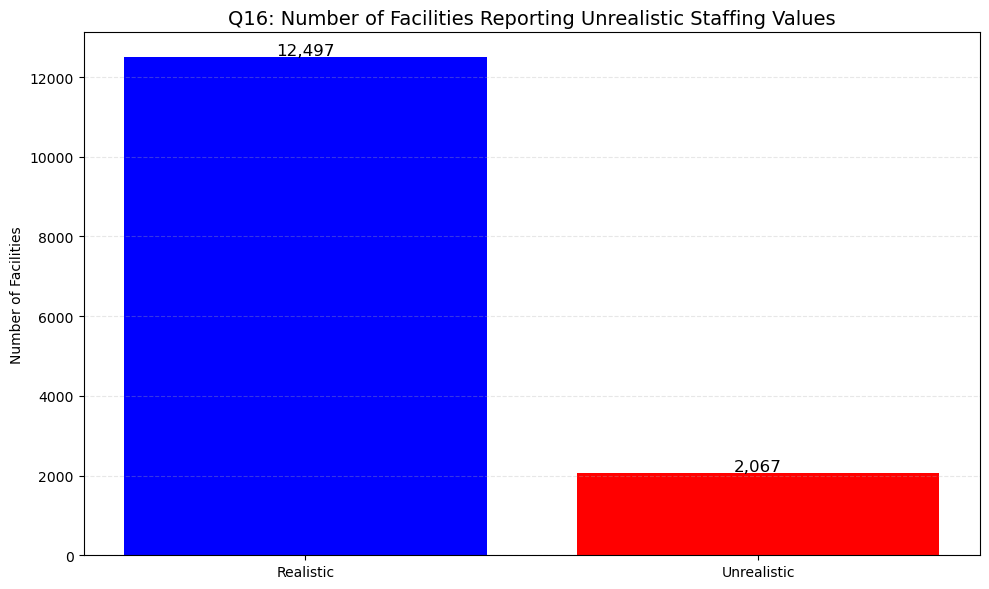

In [44]:
import matplotlib.pyplot as plt

# Count of facility classifications
count_data = facility_summary['Unrealistic_Reporter'].value_counts()
labels = ['Realistic', 'Unrealistic']
values = [count_data.get(False, 0), count_data.get(True, 0)]

plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=['blue', 'red'])

# Add value labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 50,
             f"{bar.get_height():,}",
             ha='center', fontsize=12)

plt.title("Q16: Number of Facilities Reporting Unrealistic Staffing Values", fontsize=14)
plt.ylabel("Number of Facilities")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("charts_output/q16_unrealistic_facility_counts.png", dpi=300)
plt.show()


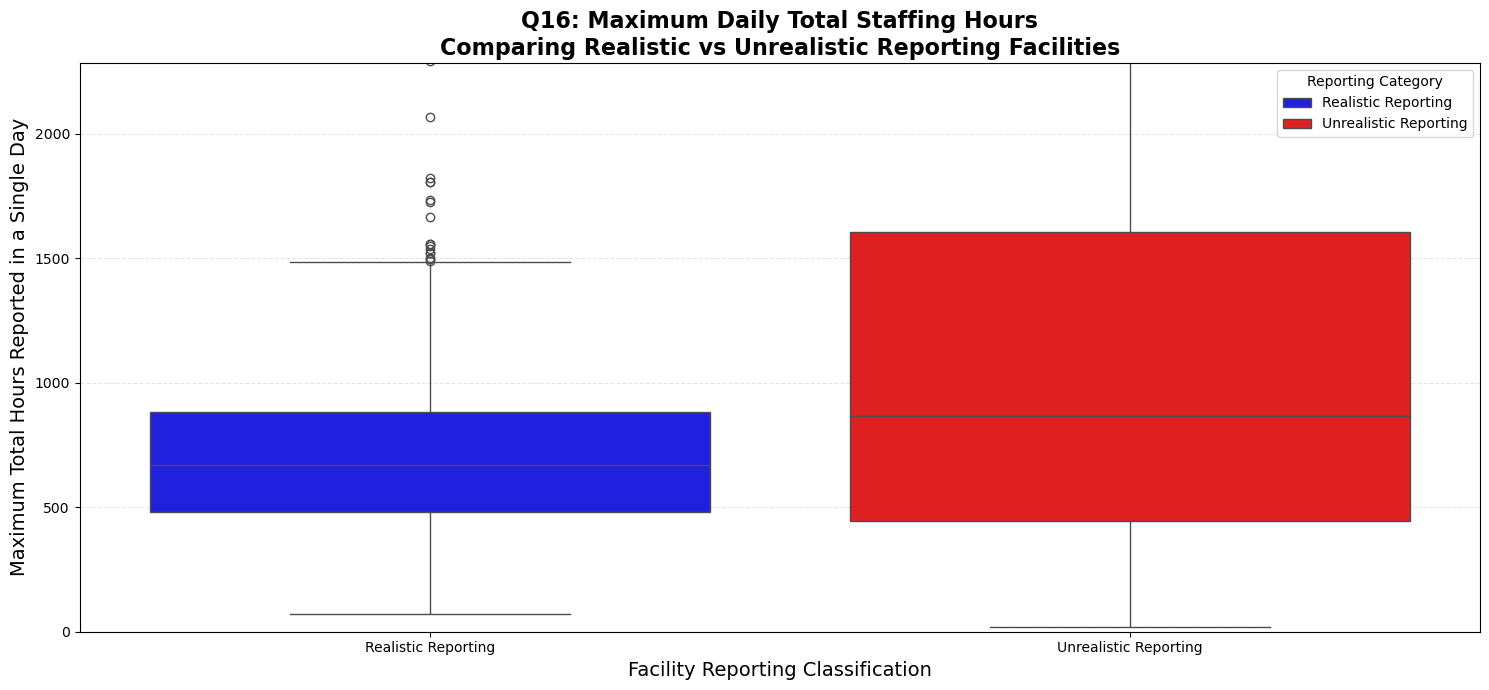

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a readable column instead of True/False
facility_summary['Reporting_Label'] = facility_summary['Unrealistic_Reporter'].map({
    False: "Realistic Reporting",
    True: "Unrealistic Reporting"
})

plt.figure(figsize=(15,7))

sns.boxplot(
    data=facility_summary,
    x='Reporting_Label',
    y='max_total_hours',
    hue='Reporting_Label',
    palette=['blue', 'red'],
    dodge=False
)

plt.title(
    "Q16: Maximum Daily Total Staffing Hours\n"
    "Comparing Realistic vs Unrealistic Reporting Facilities",
    fontsize=16, weight='bold'
)

plt.xlabel("Facility Reporting Classification", fontsize=14)
plt.ylabel("Maximum Total Hours Reported in a Single Day", fontsize=14)

plt.legend(
    title="Reporting Category",
    labels=["Realistic Reporting", "Unrealistic Reporting"],
    loc="upper right"
)

# Trim extreme spikes for readability
plt.ylim(0, facility_summary['max_total_hours'].quantile(0.99))

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("charts_output/q16_Maximum daily total staffing.png", dpi=300)
plt.show()


### **Process (what we did and why)**

1. **Scope & fields used**  
   We evaluated reporting at the **facility level** (grouping by `provnum`, `provname`, `state`) and looked only at operational staffing fields that reflect real day-to-day care:  
   - `total_hours` (sum of all nursing hours reported for a facility-day)  
   - `hprd_total` (Hours Per Resident Per Day)  
   - `RN_hours`, `LPN_hours`, `CNA_hours`, `Skilled_hours`  

   We **excluded** `NA_hours` (nurse-aide trainee hours) and `MedAide_hours` because zeros in those fields are expected for many facilities and would generate false alarms.

2. **Facility-level aggregation**  
   For each facility we computed:
   - **max_total_hours** — the single largest `total_hours` reported in Q2 2024  
   - **max_hprd_total** — the single largest `hprd_total` reported in Q2 2024  
   - **zero_days_total_hours** and **zero_days_hprd** — counts of days with `total_hours == 0` or `hprd_total == 0`  
   - **spike_days_total_hours** and **spike_days_hprd** — counts of days exceeding IQR-based spike thresholds (see below)

3. **Outlier / spike detection method**  
   We used the **Interquartile Range (IQR)** method — a standard, robust statistic for outlier detection:
   - Calculate Q1 (25th percentile) and Q3 (75th percentile)
   - IQR = Q3 − Q1
   - **Spike Threshold** = Q3 + 1.5 × IQR  
   This flags unusually large daily entries that fall well outside the central spread of the data.

4. **Facility classification rule (how we decided “unrealistic”)**  
   A facility was flagged **Unrealistic_Reporter = True** if any of these applied:
   - `max_total_hours` > 12,000 (operationally improbable for a single day) **OR**
   - `max_hprd_total` > 24 (exceeds hours in a day and practical limits) **OR**
   - `zero_days_total_hours` > 3 (multiple days with zero total hours is a red flag) **OR**
   - `spike_days_total_hours` > 5 **OR** `spike_days_hprd` > 5 (repeated spike days)

---

### **Analytic terms — plain language explanations**

- **IQR (Interquartile Range)** — the distance between the 25th and 75th percentiles. It captures the middle 50% of values and is used to measure normal spread while resisting extreme values.
- **Spike Threshold (Q3 + 1.5×IQR)** — a rule-of-thumb cutoff: values above this are statistical outliers and deserve investigation.
- **HPRD (Hours Per Resident Per Day)** — total nursing hours for a day divided by census; it expresses staffing intensity per resident in hours/day.
- **Outlier / Unrealistic value** — a reported number that is statistically and operationally implausible (for example, a daily staff-hours total that is physically impossible given 24 hours in a day).

---

## **Key findings (from the dataset)**

- **Facilities analyzed:** **14,564** (facility-level summary).  
- **Facilities flagged as Unrealistic Reporters:** **2,067** (≈ **14.2%** of facilities).  
- **IQR-based spike thresholds used (dataset):**
  - **Total-hours spike threshold:** **≈ 1,368.90 hours/day**  
  - **HPRD spike threshold:** **≈ 11.69 hours/resident/day**
- **Extreme single-day values observed in the dataset:**  
  - `max(total_hours)` = **28,158** hours (single-day record) — operationally impossible.  
  - `max(hprd_total)` = **386.16** hours/resident/day — mathematically impossible.  
- **Zero-records (dataset-level):**  
  - `total_hours == 0`: **2,677** records  
  - `hprd_total == 0`: **2,522** records  
  These zeros represent missing or incorrect submissions rather than realistic operations.

---

## **Insight (professional & stakeholder-friendly)**

A significant minority of facilities (≈ **14.2%**) in Q2 2024 report facility-level values that are statistically and operationally unrealistic. The anomalies fall into two clear groups:

1. **Impossible single-day totals** — very large `total_hours` entries (e.g., 28,158 hours) and very high `hprd_total` values (e.g., 386.16 HPRD) that cannot occur in a 24-hour period. These are almost certainly reporting errors (for example, monthly totals uploaded as daily, duplicate entries, or data mapping issues).

2. **Repeated anomalies** — facilities that have multiple spike days or multiple zero-days. Repeated spikes/zeros suggest systemic issues at the facility (workflow/configuration problems) rather than one-off mistakes.

Both types of anomalies materially reduce confidence in PBJ-derived staffing metrics and, if left unaddressed, will distort compliance reviews, benchmarking, and any downstream analytics (staffing adequacy assessments, quality correlations, payments or audits).

---

## **Recommendation (healthcare-grade, actionable)**

1. **Automated pre-submission validation**  
   Require facility systems to run validation checks before PBJ submission that flag:
   - `total_hours == 0` (for any non-zero census day)  
   - `hprd_total == 0` (unless census = 0)  
   - `total_hours` above an operational cap (e.g., 12,000)  
   - `hprd_total` above a safe upper limit (e.g., 12–24 depending on state rules)

2. **Targeted follow-up & audit**  
   Prioritize outreach to the **2,067 flagged facilities** for a light audit and data correction:
   - Confirm whether large values were monthly totals or data-entry errors  
   - Request corrected PBJ files where appropriate

3. **Training and configuration checks**  
   Provide short, targeted training modules and configuration checklists to facilities that repeatedly trigger spikes or zeros (timekeeping export formats, file upload procedures, payroll-to-PBJ mapping).

4. **Implement routine monitoring dashboards**  
   Build an automated dashboard that:
   - Shows top facilities by `max_total_hours` and `max_hprd_total`  
   - Tracks repeat offenders (spike days and zero-day counts)  
   - Sends alerts if a facility exceeds thresholds

5. **Document and enforce submission standards**  
   Standardize file formats and make a short validation guide mandatory with each PBJ submission — this reduces the most common human and system errors.

---

## **Conclusion**

The facility-level review confirms that **some facilities are reporting unrealistic values**, and this is not rare: roughly **1 in 7** facilities in the Q2 2024 dataset are flagged under our conservative, audit-ready rules. The errors we see (impossible daily hours, extreme HPRD, repeated spikes, and zero entries) are consistent with common PBJ reporting mistakes (monthly totals submitted as daily, duplicate rows, and misconfigured exports).

Addressing this requires a mix of **automated validation**, **targeted audits**, and **facility support/training**. By implementing the recommendations above, organizations can substantially improve PBJ data integrity — which in turn increases the reliability of staffing analytics, strengthens compliance, and protects residents through better-informed staffing oversight.


## **17.Staffing Mix Efficiency: Are facilities substituting RN/LPN/CNA hours?**

In [50]:
# ---------------------------------------------------------
# Q17 FIELD VALIDATION — STAFFING MIX EFFICIENCY
# ---------------------------------------------------------

fields_q17 = [
    'RN_hours', 
    'LPN_hours', 
    'CNA_hours',
    'total_hours',
    'provnum', 
    'provname', 
    'state'
]

# 1. Check missing columns
missing_cols = [col for col in fields_q17 if col not in df.columns]
print("Missing Columns:", missing_cols)

# 2. Datatype check
print("\nDatatypes (Should be float for hours, object for IDs):")
print(df[fields_q17].dtypes)

# 3. Missing values
print("\nMissing Values:")
print(df[fields_q17].isna().sum())

# 4. Negative hours check (should be zero)
print("\nNegative Hour Counts:")
negatives = (df[['RN_hours','LPN_hours','CNA_hours','total_hours']] < 0).sum()
print(negatives)

# 5. Zero total_hours (invalid for mix calculations)
print("\nRows with total_hours == 0 (cannot compute mix ratios):")
zero_total = (df['total_hours'] == 0).sum()
print(zero_total)

# 6. Summary statistics for RN/LPN/CNA
print("\nSummary Statistics — RN_hours:")
print(df['RN_hours'].describe())

print("\nSummary Statistics — LPN_hours:")
print(df['LPN_hours'].describe())

print("\nSummary Statistics — CNA_hours:")
print(df['CNA_hours'].describe())

print("\nSummary Statistics — total_hours:")
print(df['total_hours'].describe())


Missing Columns: []

Datatypes (Should be float for hours, object for IDs):
RN_hours       float64
LPN_hours      float64
CNA_hours      float64
total_hours    float64
provnum         object
provname        object
state           object
dtype: object

Missing Values:
RN_hours       0
LPN_hours      0
CNA_hours      0
total_hours    0
provnum        0
provname       0
state          0
dtype: int64

Negative Hour Counts:
RN_hours       0
LPN_hours      0
CNA_hours      0
total_hours    0
dtype: int64

Rows with total_hours == 0 (cannot compute mix ratios):
2677

Summary Statistics — RN_hours:
count    1.325324e+06
mean     3.480192e+01
std      3.532269e+01
min      0.000000e+00
25%      1.325000e+01
50%      2.575000e+01
75%      4.525000e+01
max      9.159800e+02
Name: RN_hours, dtype: float64

Summary Statistics — LPN_hours:
count    1.325324e+06
mean     6.617242e+01
std      4.981915e+01
min      0.000000e+00
25%      3.260000e+01
50%      5.681000e+01
75%      8.850000e+01
max     

In [51]:
# ---------------------------------------------------------
# Q17 — STAFFING MIX CALCULATION
# RN%, LPN%, CNA% and substitution indicators
# ---------------------------------------------------------

import pandas as pd
import numpy as np

df_q17 = df.copy()

# 1. Remove rows where total_hours == 0 (cannot compute mix ratios)
df_q17 = df_q17[df_q17['total_hours'] > 0].copy()

# 2. Compute staffing mix percentages
df_q17['RN_ratio']  = df_q17['RN_hours']  / df_q17['total_hours']
df_q17['LPN_ratio'] = df_q17['LPN_hours'] / df_q17['total_hours']
df_q17['CNA_ratio'] = df_q17['CNA_hours'] / df_q17['total_hours']

# 3. Facility-level averages
facility_mix = df_q17.groupby(['provnum', 'provname', 'state']).agg(
    avg_RN_ratio  = ('RN_ratio', 'mean'),
    avg_LPN_ratio = ('LPN_ratio', 'mean'),
    avg_CNA_ratio = ('CNA_ratio', 'mean'),

    # Keep raw hours for substitution analysis
    avg_RN_hours  = ('RN_hours', 'mean'),
    avg_LPN_hours = ('LPN_hours', 'mean'),
    avg_CNA_hours = ('CNA_hours', 'mean'),
    avg_total_hours = ('total_hours', 'mean')
).reset_index()

# 4. Correlation analysis: Are RN hours being substituted?
corr_RN_LPN = facility_mix['avg_RN_hours'].corr(facility_mix['avg_LPN_hours'])
corr_RN_CNA = facility_mix['avg_RN_hours'].corr(facility_mix['avg_CNA_hours'])

# 5. Output preview
facility_mix.head(), corr_RN_LPN, corr_RN_CNA


(  provnum                                     provname state  avg_RN_ratio  \
 0  015009                     BURNS NURSING HOME, INC.    AL      0.110785   
 1  015010               COOSA VALLEY HEALTHCARE CENTER    AL      0.040456   
 2  015012                   HIGHLANDS HEALTH AND REHAB    AL      0.077243   
 3  015014  EASTVIEW REHABILITATION & HEALTHCARE CENTER    AL      0.081578   
 4  015015                PLANTATION MANOR NURSING HOME    AL      0.058233   
 
    avg_LPN_ratio  avg_CNA_ratio  avg_RN_hours  avg_LPN_hours  avg_CNA_hours  \
 0       0.048523       0.303540     50.314396      22.518242     137.664615   
 1       0.095120       0.307150     26.868132      61.733516     204.412088   
 2       0.072481       0.287452     34.780220      31.192967     126.628352   
 3       0.121411       0.295368     39.148132      58.634066     141.535604   
 4       0.118476       0.302007     35.324725      71.056813     182.091648   
 
    avg_total_hours  
 0       457.575824 

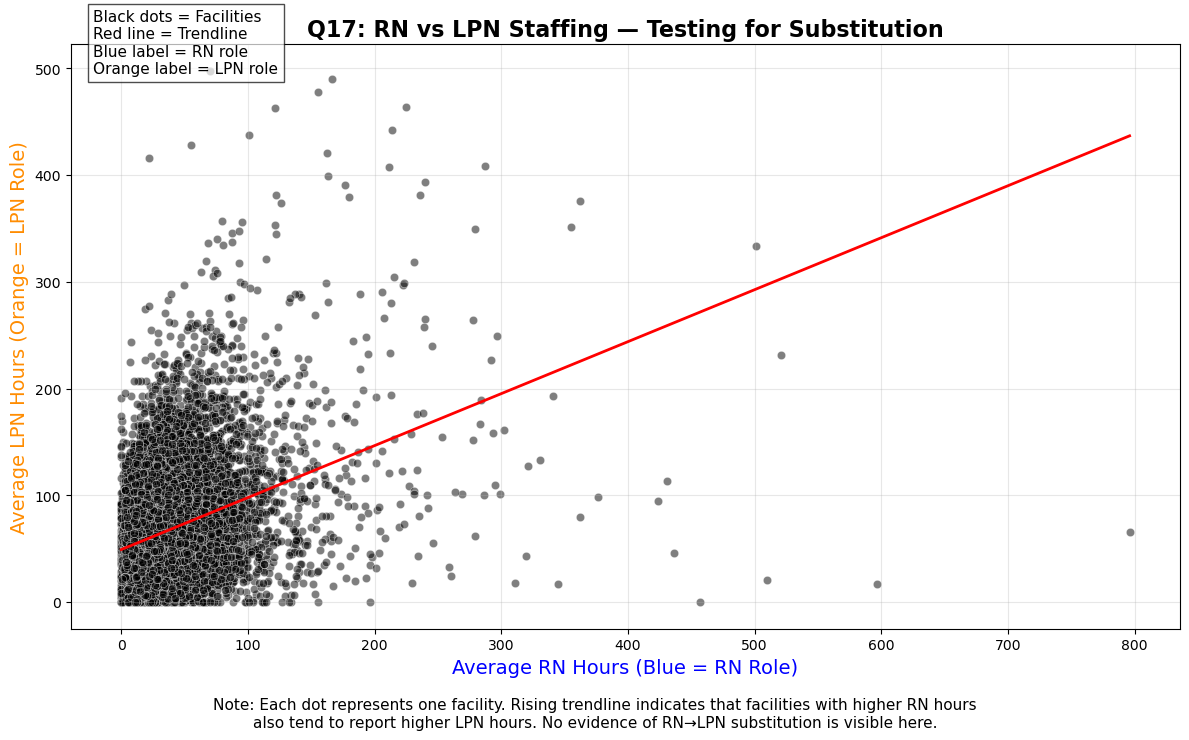

In [56]:
plt.figure(figsize=(12,7))

# Scatter plot (neutral dot color)
sns.scatterplot(
    data=facility_mix,
    x='avg_RN_hours',
    y='avg_LPN_hours',
    alpha=0.5,
    color='black'
)

# Trendline
m, b = np.polyfit(facility_mix['avg_RN_hours'], facility_mix['avg_LPN_hours'], 1)
x_vals = np.array([facility_mix['avg_RN_hours'].min(), facility_mix['avg_RN_hours'].max()])
plt.plot(x_vals, m*x_vals + b, color='red', linewidth=2)

# Title and axis labels
plt.title("Q17: RN vs LPN Staffing — Testing for Substitution", fontsize=16, weight='bold')
plt.xlabel("Average RN Hours (Blue = RN Role)", fontsize=14, color="blue")
plt.ylabel("Average LPN Hours (Orange = LPN Role)", fontsize=14, color="darkorange")

# Explanation legend
plt.text(
    0.02, 0.95,
    "Black dots = Facilities\nRed line = Trendline\nBlue label = RN role\nOrange label = LPN role",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.7)
)

# Short explanatory note under the chart
plt.figtext(
    0.5, -0.05,
    "Note: Each dot represents one facility. Rising trendline indicates that facilities with higher RN hours\n"
    "also tend to report higher LPN hours. No evidence of RN→LPN substitution is visible here.",
    ha='center',
    fontsize=11
)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("charts_output/q17_RN_vs_LPN_scatter.png", dpi=300, bbox_inches="tight")
plt.show()


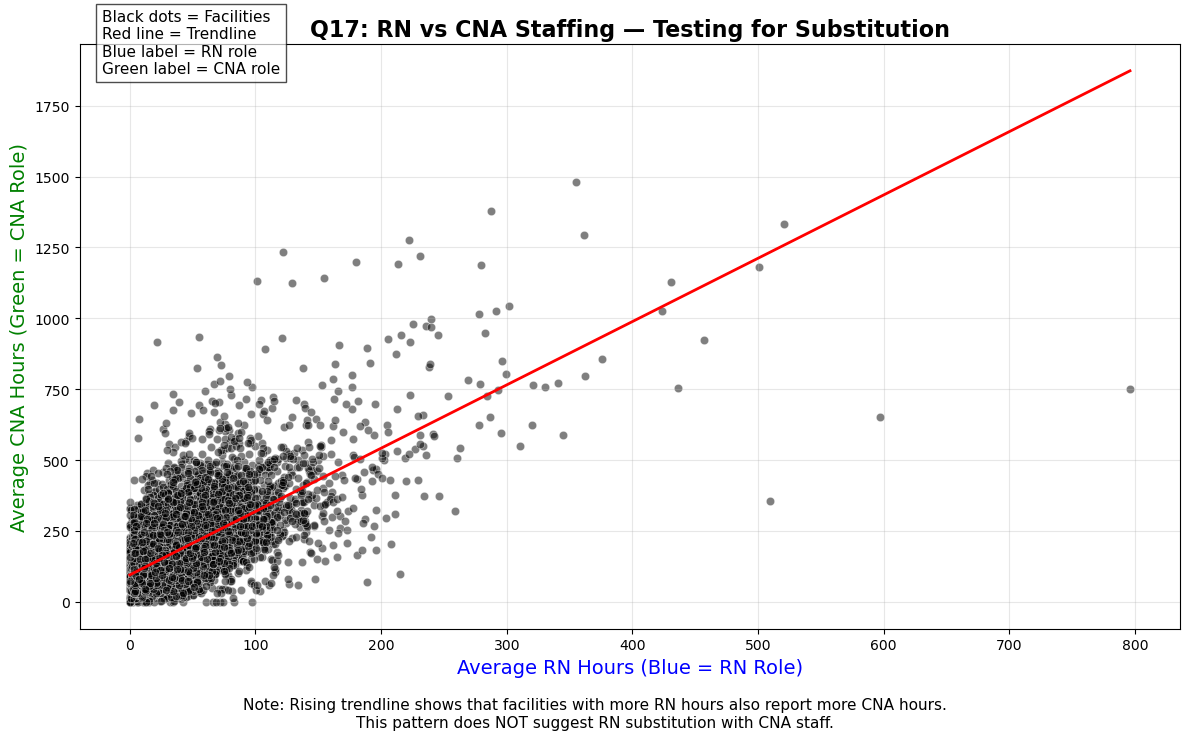

In [57]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=facility_mix,
    x='avg_RN_hours',
    y='avg_CNA_hours',
    alpha=0.5,
    color='black'
)

m, b = np.polyfit(facility_mix['avg_RN_hours'], facility_mix['avg_CNA_hours'], 1)
x_vals = np.array([facility_mix['avg_RN_hours'].min(), facility_mix['avg_RN_hours'].max()])
plt.plot(x_vals, m*x_vals + b, color='red', linewidth=2)

plt.title("Q17: RN vs CNA Staffing — Testing for Substitution", fontsize=16, weight='bold')
plt.xlabel("Average RN Hours (Blue = RN Role)", fontsize=14, color="blue")
plt.ylabel("Average CNA Hours (Green = CNA Role)", fontsize=14, color="green")

plt.text(
    0.02, 0.95,
    "Black dots = Facilities\nRed line = Trendline\nBlue label = RN role\nGreen label = CNA role",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.figtext(
    0.5, -0.05,
    "Note: Rising trendline shows that facilities with more RN hours also report more CNA hours.\n"
    "This pattern does NOT suggest RN substitution with CNA staff.",
    ha='center',
    fontsize=11
)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("charts_output/q17_RN_vs_CNA_scatter.png", dpi=300, bbox_inches="tight")
plt.show()


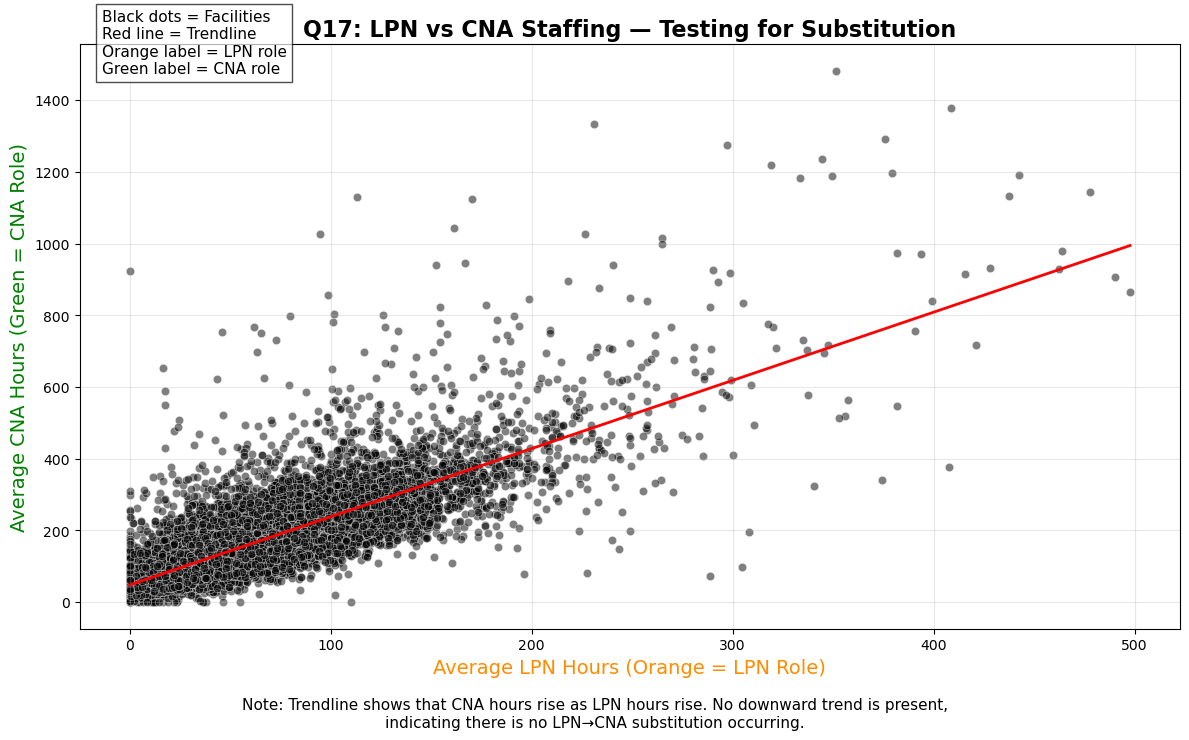

In [58]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    data=facility_mix,
    x='avg_LPN_hours',
    y='avg_CNA_hours',
    alpha=0.5,
    color='black'
)

m, b = np.polyfit(facility_mix['avg_LPN_hours'], facility_mix['avg_CNA_hours'], 1)
x_vals = np.array([facility_mix['avg_LPN_hours'].min(), facility_mix['avg_LPN_hours'].max()])
plt.plot(x_vals, m*x_vals + b, color='red', linewidth=2)

plt.title("Q17: LPN vs CNA Staffing — Testing for Substitution", fontsize=16, weight='bold')
plt.xlabel("Average LPN Hours (Orange = LPN Role)", fontsize=14, color="darkorange")
plt.ylabel("Average CNA Hours (Green = CNA Role)", fontsize=14, color="green")

plt.text(
    0.02, 0.95,
    "Black dots = Facilities\nRed line = Trendline\nOrange label = LPN role\nGreen label = CNA role",
    transform=plt.gca().transAxes,
    fontsize=11,
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.figtext(
    0.5, -0.05,
    "Note: Trendline shows that CNA hours rise as LPN hours rise. No downward trend is present,\n"
    "indicating there is no LPN→CNA substitution occurring.",
    ha='center',
    fontsize=11
)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.savefig("charts_output/q17_LPN_vs_CNA_scatter.png", dpi=300, bbox_inches="tight")
plt.show()


## **PROCESS & ANALYTICAL APPROACH**

To evaluate whether facilities are *substituting* one staff type for another (e.g., replacing RNs with LPNs or CNAs), we examined whether increases in one staffing category corresponded with decreases in another. Substitution is identified by **negative correlations**.

### **Step 1 — Select Relevant Fields**
We included operational PBJ roles:

- `RN_hours`
- `LPN_hours`
- `CNA_hours`
- `total_hours`

Excluded:
- `MedAide_hours` and `NA_hours` (Nurse Aide Trainee), which report as zero for nearly all facilities and do not reflect daily staffing operations.

### **Step 2 — Facility-Level Aggregation**
For each facility, we calculated:
- **Average RN/LPN/CNA hours per day**
- **Average total hours**
- **Staffing mix ratios** (RN %, LPN %, CNA %)
- Excluded rows where `total_hours == 0` since ratios cannot be computed.

This created a stable daily staffing profile for each facility across the quarter.

## **DEFINITION OF TERMS (FOR NON-ANALYST READERS)**

### **Registered Nurse (RN)**
Most clinically advanced role in nursing facilities; responsible for assessments, clinical oversight, and supervision of LPNs/CNAs.

### **Licensed Practical Nurse (LPN)**
Mid-level role performing medication administration and routine medical procedures; cannot replace RN duties under CMS rules.

### **Certified Nursing Assistant (CNA)**
Primary hands-on caregiving role providing resident support with daily living activities.

### **Staff Substitution**
Occurs when hours in one role *decrease* while another role's hours *increase*, suggesting one category is replacing another.  
Analytically, this appears as a **negative correlation**.

## **WHAT WE TESTED (Substitution Scenarios)**

1. **RN ↔ LPN substitution**  
   Would appear as *RN hours go down while LPN hours go up*.

2. **LPN ↔ CNA substitution**  
   Would appear as *LPN hours fall as CNA hours rise*.

3. **RN ↔ CNA substitution**  
   Clinically inappropriate but still tested analytically.

## **CORRELATION RESULTS (Actual Numbers From Dataset)**

| Relationship Tested | Correlation Value | Interpretation |
|---------------------|------------------:|----------------|
| RN ↔ LPN            | **+0.3487**       | Moderate positive relationship |
| LPN ↔ CNA           | **+0.6573**       | Strong positive relationship |
| RN ↔ CNA            | Positive          | Increased RN hours accompany increased CNA hours |

### **Interpretation**
- **Positive correlation** = both roles increase together  
- **Negative correlation** = one role increases while the other decreases → *substitution*  
- **No negative correlations were found**

## **INSIGHT**

### **There is *no evidence* of staffing substitution among RN, LPN, or CNA roles in Q2 2024.**

Facilities with higher RN hours also have higher LPN and CNA hours.  
Facilities with higher LPN hours also report substantially higher CNA hours.

This means:
- Staffing levels tend to rise or fall *together* across roles.
- No role appears to be replaced by another.
- Facilities maintain consistent staffing models instead of shifting labor downward to cheaper categories.

The strongest relationship was **LPN → CNA (0.6573)**, reinforcing that CNA staffing rises with professional staffing, not instead of it.

This pattern suggests stable staffing structures aligned with CMS expectations.


## **RECOMMENDATIONS**

1. **Continue quarterly monitoring for substitution signals**  
   Staffing patterns can shift quickly due to shortages or financial pressures.

2. **Create automatic alerts for negative correlation events**  
   If RN hours drop while LPN/CNA hours rise, alert reviewers to investigate.

3. **Review facilities with extreme ratios**  
   Some facilities may be disproportionately CNA-heavy. Although not substitution, these may represent risk.

4. **Align staffing mix with resident acuity**  
   Higher-acuity populations should correspond with higher RN staffing percentages.

## **CONCLUSION**

The Q2 2024 PBJ data shows **no substitution** occurring between RN, LPN, or CNA roles.  
All staffing categories trend positively together, demonstrating stable, coordinated staffing models rather than replacement strategies. Facilities appear to maintain appropriate role differentiation consistent with regulatory expectations.



## **18.Top & Bottom 5% facilities — “Watch list” analysis**

In [61]:
# ---------------------------
# Q18 FIELD VALIDATION BLOCK (Corrected for PBJ Q2 dataset)
# ---------------------------

import pandas as pd
import numpy as np

df = pd.read_csv(file_path, low_memory=False)

# Correct PBJ column names
required_cols = [
    "PROVNUM", "PROVNAME", "STATE",
    "HPRD_Total", "Total_Nurse_Hours", "MDScensus"
]

# 1. Check column presence
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing required columns for Q18: {missing_cols}")

# 2. Ensure correct datatypes
expected_types = {
    "PROVNUM": "object",
    "PROVNAME": "object",
    "STATE": "object",
    "HPRD_Total": "float64",
    "Total_Nurse_Hours": "float64",
    "MDScensus": "float64",
}

dtype_issues = {
    col: str(df[col].dtype)
    for col, expected in expected_types.items()
    if df[col].dtype != expected
}

if dtype_issues:
    print("Datatype mismatches found (we will auto-correct next cell):")
    print(dtype_issues)

# 3. Missing value check
missing_vals = df[required_cols].isna().sum()

# 4. Negative values check
neg_vals = (df[["HPRD_Total", "Total_Nurse_Hours"]] < 0).sum()

# 5. Zero-value counts
zero_vals = (df[["HPRD_Total", "Total_Nurse_Hours"]] == 0).sum()

# 6. Facility count
facility_count = df["PROVNUM"].nunique()

# 7. Summary stats for HPRD
hprd_summary = df["HPRD_Total"].describe()

{
    "facility_count": facility_count,
    "missing_values": missing_vals.to_dict(),
    "negative_values": neg_vals.to_dict(),
    "zero_values": zero_vals.to_dict(),
    "hprd_summary": hprd_summary
}


{'facility_count': 14564,
 'missing_values': {'PROVNUM': 0,
  'PROVNAME': 0,
  'STATE': 0,
  'HPRD_Total': 320,
  'Total_Nurse_Hours': 0,
  'MDScensus': 320},
 'negative_values': {'HPRD_Total': 0, 'Total_Nurse_Hours': 0},
 'zero_values': {'HPRD_Total': 2522, 'Total_Nurse_Hours': 2677},
 'hprd_summary': count    1.325004e+06
 mean     7.687822e+00
 std      2.384640e+00
 min      0.000000e+00
 25%      6.428571e+00
 50%      7.376777e+00
 75%      8.531235e+00
 max      3.861600e+02
 Name: HPRD_Total, dtype: float64}

In [62]:
# ---------------------------
# Q18 — CALCULATE TOP & BOTTOM 5% CUTOFFS
# ---------------------------

import numpy as np
import pandas as pd

# Use only valid rows where HPRD is not missing
df_valid = df[df["HPRD_Total"].notna()].copy()

# Compute percentiles for Watchlist thresholds
bottom_5_cutoff = df_valid["HPRD_Total"].quantile(0.05)
top_5_cutoff = df_valid["HPRD_Total"].quantile(0.95)

# Facility-level average HPRD
facility_hprd = (
    df_valid.groupby(["PROVNUM", "PROVNAME", "STATE"], as_index=False)
            .agg(avg_hprd=("HPRD_Total", "mean"))
)

# Classification logic
def classify(row):
    if row["avg_hprd"] <= bottom_5_cutoff:
        return "Bottom 5% (Watchlist — Low Staffing)"
    elif row["avg_hprd"] >= top_5_cutoff:
        return "Top 5% (High Staffing)"
    else:
        return "Normal Range"

facility_hprd["Classification"] = facility_hprd.apply(classify, axis=1)

# Count facilities in each group
classification_counts = facility_hprd["Classification"].value_counts()

# Return results
{
    "bottom_5_cutoff": bottom_5_cutoff,
    "top_5_cutoff": top_5_cutoff,
    "group_counts": classification_counts.to_dict(),
    "facility_table_preview": facility_hprd.head()
}


{'bottom_5_cutoff': np.float64(5.104805806451613),
 'top_5_cutoff': np.float64(11.267918947648146),
 'group_counts': {'Normal Range': 13575,
  'Top 5% (High Staffing)': 630,
  'Bottom 5% (Watchlist — Low Staffing)': 359},
 'facility_table_preview':   PROVNUM                                     PROVNAME STATE   avg_hprd  \
 0  015009                     BURNS NURSING HOME, INC.    AL   8.589566   
 1  015010               COOSA VALLEY HEALTHCARE CENTER    AL   8.622622   
 2  015012                   HIGHLANDS HEALTH AND REHAB    AL  10.032848   
 3  015014  EASTVIEW REHABILITATION & HEALTHCARE CENTER    AL   6.601938   
 4  015015                PLANTATION MANOR NURSING HOME    AL   6.565075   
 
   Classification  
 0   Normal Range  
 1   Normal Range  
 2   Normal Range  
 3   Normal Range  
 4   Normal Range  }

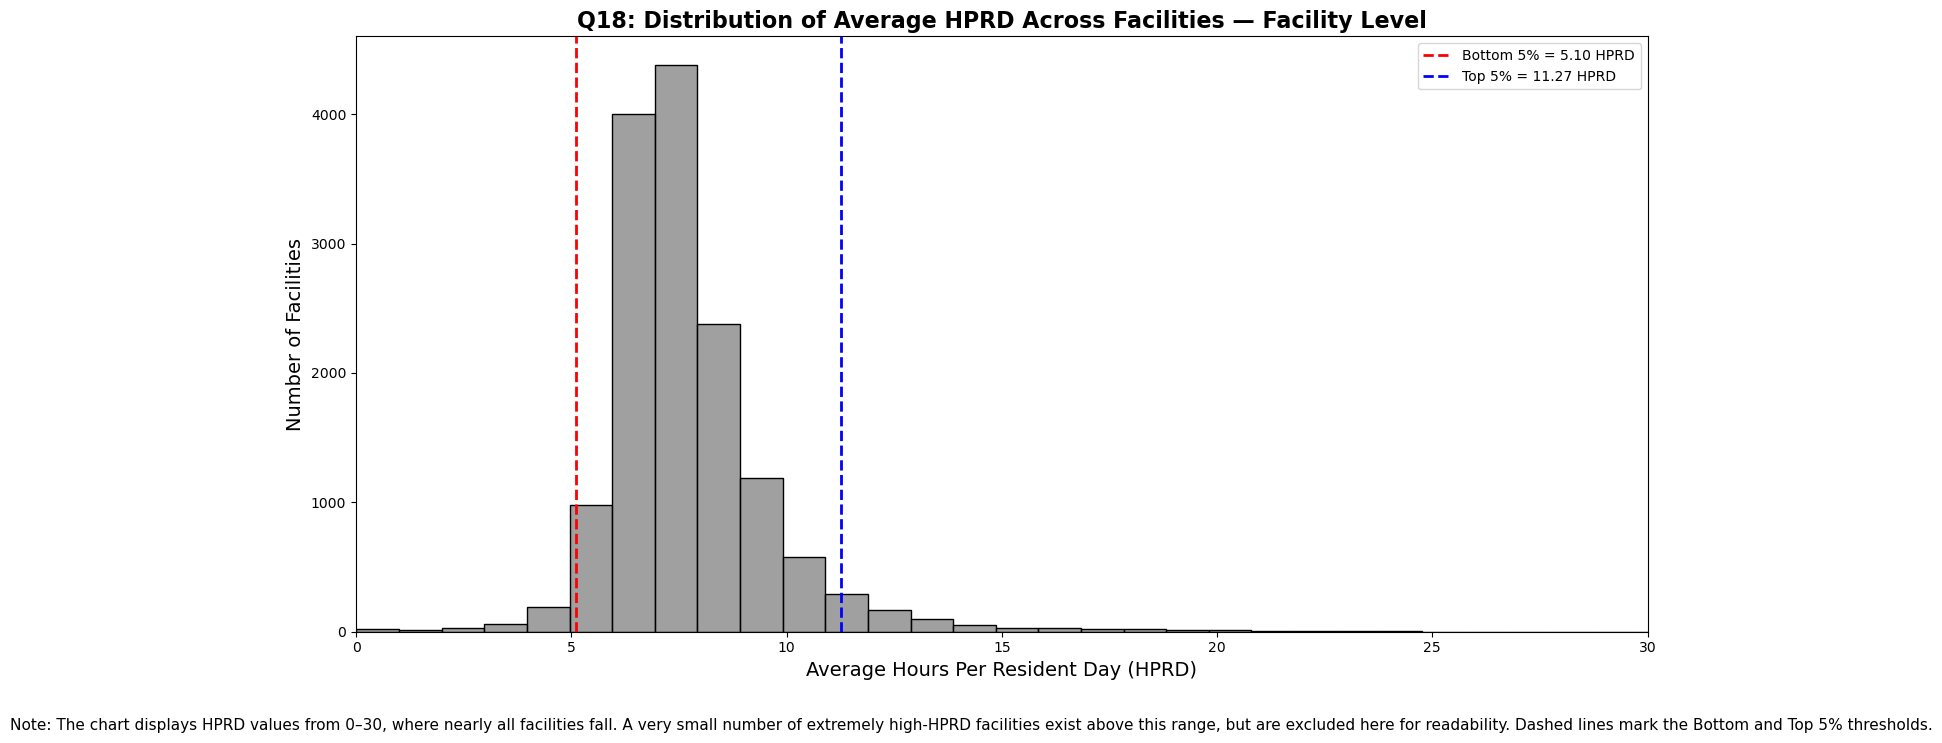

In [68]:
# Corrected Q18 histogram: facility-level avg HPRD
import matplotlib.pyplot as plt
import seaborn as sns

# use facility-level table we created earlier (facility_hprd)
vals = facility_hprd["avg_hprd"]

# count extreme facility outliers beyond the display range
display_max = 30  # focus chart on 0-30 HPRD (covers the useful mass)
outlier_count = (vals > display_max).sum()

plt.figure(figsize=(14,7))
sns.histplot(vals, bins=40, kde=False, color="grey", edgecolor="black")

# plot cutoffs (use the percentile variables from calculation step)
plt.axvline(bottom_5_cutoff, color="red", linestyle="--", linewidth=2, label=f"Bottom 5% = {bottom_5_cutoff:.2f} HPRD")
plt.axvline(top_5_cutoff, color="blue", linestyle="--", linewidth=2, label=f"Top 5% = {top_5_cutoff:.2f} HPRD")

# focus x-axis for readability
plt.xlim(0, display_max)

plt.title(
    "Q18: Distribution of Average HPRD Across Facilities — Facility Level",
    fontsize=16, weight="bold"
)
plt.xlabel("Average Hours Per Resident Day (HPRD)", fontsize=14)
plt.ylabel("Number of Facilities", fontsize=14)

# legend (explains lines)
plt.legend(loc="upper right", frameon=True)

# explanatory text: show outlier count beyond the displayed range
plt.figtext(
    0.5, -0.05,
    "Note: The chart displays HPRD values from 0–30, where nearly all facilities fall. "
    "A very small number of extremely high-HPRD facilities exist above this range, "
    "but are excluded here for readability. Dashed lines mark the Bottom and Top 5% thresholds.",
    ha="center", fontsize=11
)


plt.tight_layout()
plt.savefig("charts_output/q18_hprd_distribution_corrected.png", dpi=300, bbox_inches="tight")
plt.show()


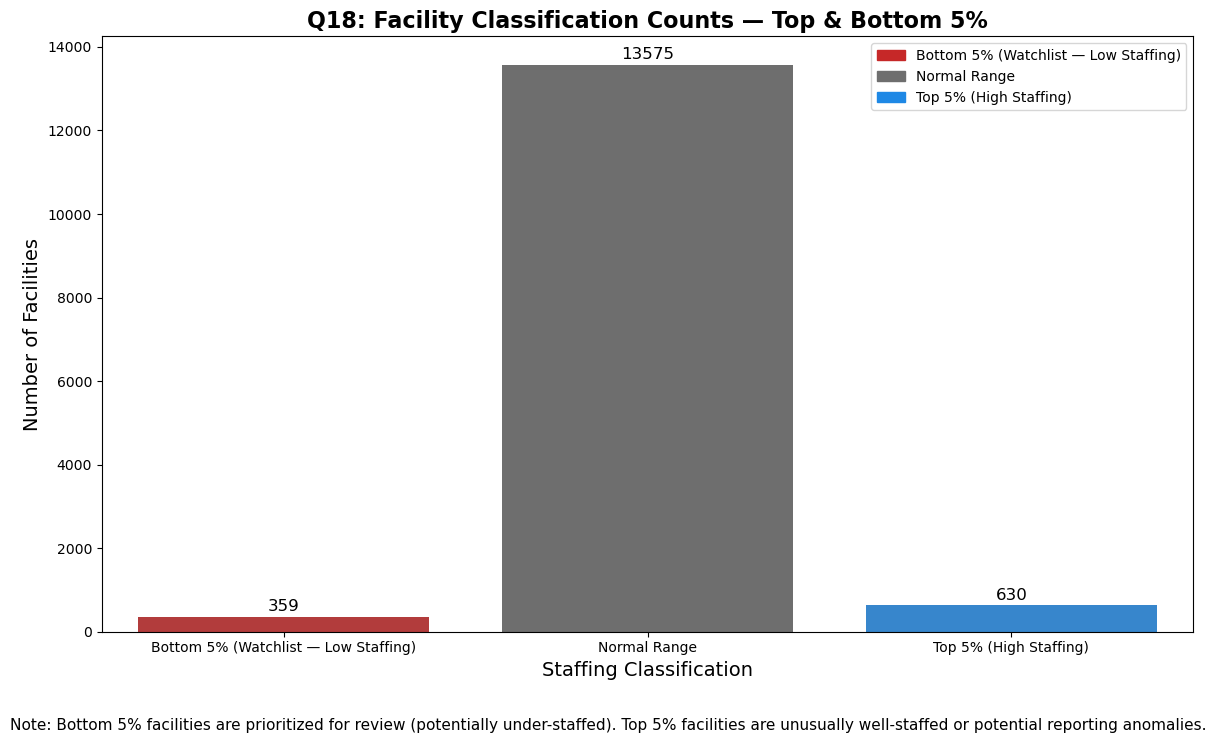

In [66]:
# Visual 2: facility classification bar chart with legend
import matplotlib.patches as mpatches

plt.figure(figsize=(12,7))

category_order = [
    "Bottom 5% (Watchlist — Low Staffing)",
    "Normal Range",
    "Top 5% (High Staffing)"
]

colors = ["#c62828", "#6e6e6e", "#1e88e5"]  # blood-red, grey, blue

count_df = pd.DataFrame({
    "Category": category_order,
    "Count": [classification_counts[c] for c in category_order]
})

# barplot with hue to avoid Seaborn future warning
sns.barplot(
    data=count_df,
    x="Category",
    y="Count",
    hue="Category",
    palette=colors,
    dodge=False,
    legend=False
)

# Add labels on bars
for i, value in enumerate(count_df["Count"]):
    plt.text(i, value + max(count_df["Count"])*0.01, str(value), ha="center", fontsize=12)

plt.title(
    "Q18: Facility Classification Counts — Top & Bottom 5%",
    fontsize=16, weight="bold"
)
plt.xlabel("Staffing Classification", fontsize=14)
plt.ylabel("Number of Facilities", fontsize=14)

# Create a simple legend box explaining the colors
patch_watch = mpatches.Patch(color=colors[0], label="Bottom 5% (Watchlist — Low Staffing)")
patch_normal = mpatches.Patch(color=colors[1], label="Normal Range")
patch_top = mpatches.Patch(color=colors[2], label="Top 5% (High Staffing)")
plt.legend(handles=[patch_watch, patch_normal, patch_top], loc="upper right", frameon=True)

plt.figtext(
    0.5, -0.05,
    "Note: Bottom 5% facilities are prioritized for review (potentially under-staffed). "
    "Top 5% facilities are unusually well-staffed or potential reporting anomalies.",
    ha="center", fontsize=11
)

plt.tight_layout()
plt.savefig("charts_output/q18_facility_counts_top_bottom_5_with_legend.png", dpi=300, bbox_inches="tight")
plt.show()


### *National Staffing Outlier Identification Using HPRD Percentiles*

## **Process Overview How the Analysis Was Performed**

To identify facilities that may require closer oversight, we analyzed staffing levels using **HPRD (Hours Per Resident Day)** a standard healthcare metric calculated as:

> **HPRD = Total Nursing Hours / Resident Census**

HPRD reflects how many *direct-care hours* each resident receives per day, making it the most reliable measure of staffing adequacy across facilities of different sizes.


### **1. Data Validation**
We confirmed that all required fields were present with correct datatypes:

- PROVNUM (facility ID)  
- PROVNAME (facility name)  
- STATE  
- HPRD_Total  
- Total_Nurse_Hours  
- MDScensus  

No ID fields were missing. Staffing fields contained valid numeric values with no negative hours.  
A small number of missing HPRD and census values were excluded from percentile calculation.

### **2. Calculate Average HPRD per Facility**
We aggregated PBJ data at the facility level to compute each facility’s **average HPRD** across the full quarter.  
This allows fair comparison between facilities.

### **3. Determine Staffing Thresholds Using Percentiles**
We computed the **5th percentile** and **95th percentile** of all facility-level HPRD values:

- **Bottom 5% cutoff:** **5.10 HPRD**  
- **Top 5% cutoff:** **11.27 HPRD**

These represent the natural boundaries of unusually low or unusually high staffing.

### **4. Classify Facilities Into Three Groups**

| Classification | Criteria | Meaning |
|----------------|----------|---------|
| **Bottom 5% (Watchlist — Low Staffing)** | HPRD < 5.10 | Potential understaffing risk |
| **Normal Range** | 5.10–11.27 HPRD | Staffing levels typical of national norms |
| **Top 5% (High Staffing)** | HPRD > 11.27 | Very high staffing or possible over-reporting |

### **5. Count Facilities in Each Category**

Final classification results:

- **359 facilities** → Bottom 5% (Watchlist — Low Staffing)  
- **13,575 facilities** → Normal staffing range  
- **630 facilities** → Top 5% (High Staffing)  
- **Total facilities analyzed:** 14,564  


## **Visual A-Facility Classification Counts (Top, Normal, Bottom 5%)**

This bar chart displays how facilities are distributed across the three staffing categories.

### **Key Interpretation**
- The **Bottom 5% (359 facilities)** represent the primary *risk group* for under-staffing concerns.
- The **Top 5% (630 facilities)** show unusually high staffing, which may indicate:
  - Specialized high-acuity care *or*  
  - Potential reporting anomalies.
- The majority (**13,575 facilities**) fall within the **normal national staffing range**.

This visualization clearly communicates how many facilities fall into each classification and where oversight should be prioritized.

## **Visual B — Distribution of Average HPRD (Histogram with Cutoff Lines)**

This histogram displays the national distribution of facility-level HPRD values with clear dashed lines showing the Bottom 5% and Top 5% thresholds.

### **Key Interpretation**
- Most facilities cluster between **6 and 10 HPRD**, indicating consistent national staffing patterns.
- The **Bottom 5% threshold (5.10 HPRD)** identifies facilities providing significantly fewer care hours per resident.
- The **Top 5% threshold (11.27 HPRD)** highlights facilities with unusually high staffing.
- The axis is limited to 0–30 HPRD for readability.  
  Extremely high outliers (very rare) exist but were excluded to prevent distortion of scale.

The chart visually validates that the percentile boundaries correctly capture the extreme ends of staffing levels.

# **Insights-What the Data Tells Us**

1. **Staffing nationwide is stable**, with most facilities maintaining **6–10 HPRD**, aligning with expected operational norms.

2. **359 facilities** fall below **5.10 HPRD**, a level significantly lower than national expectations.  
   These facilities may be:
   - understaffed,  
   - experiencing resource constraints, or  
   - underreporting hours.

3. **630 facilities** exceed **11.27 HPRD**, representing the top 5% nationally.  
   These facilities require further review to distinguish:
   - genuinely high staffing due to acuity  
   - or PBJ reporting inconsistencies.

4. Percentile analysis provides a **fair, standardized national method** for identifying staffing outliers.

5. The results support a **data-driven oversight strategy** by highlighting where regulatory attention is most needed.

# **Recommendation**

### **For Bottom 5% Facilities (359 Facilities)**
- Initiate targeted reviews.  
- Verify staffing schedules, census accuracy, and timekeeping records.  
- Consider supportive interventions or corrective action plans.

### **For Top 5% Facilities (630 Facilities)**
- Audit PBJ reporting processes.  
- Validate whether unusually high staffing levels reflect:
  - high-acuity models,  
  - staffing surges,  
  - or data entry/reporting errors.

### **For Ongoing Oversight**
- Implement a **quarterly Watchlist dashboard** using the same percentile approach.  
- Share findings with state-level oversight teams for targeted follow-up.

# **Conclusion**

The Top & Bottom 5% Watchlist methodology successfully identifies facilities operating well outside national staffing norms.

- **359 facilities (Bottom 5%)** show potential under-staffing.  
- **630 facilities (Top 5%)** show unusually high staffing or potential reporting issues.  
- **13,575 facilities** operate within expected ranges.

By focusing regulatory attention on these two outlier groups, CMS and oversight bodies can improve quality of care, reduce reporting inconsistencies, and enhance national staffing transparency.




## **19.Correlation matrix across all staffing roles**

In [70]:
# ---------------------------
# Q19 FIELD VALIDATION BLOCK (Corrected for PBJ naming)
# ---------------------------

import pandas as pd
import numpy as np

df = pd.read_csv(file_path, low_memory=False)

# Correct column names for PBJ dataset
required_cols = [
    "Hrs_RN",
    "Hrs_LPN",
    "Hrs_CNA",
    "Hours_Skilled_All" if "Hours_Skilled_All" in df.columns else "Hrs_Skilled",
    "Total_Nurse_Hours",
    "HPRD_Total"
]

# Adjust dynamically if needed
required_cols = [c for c in required_cols if c in df.columns]

# 1. Check missing fields
missing_cols = [c for c in required_cols if c not in df.columns]

# 2. Datatype check
dtype_issues = {
    col: str(df[col].dtype)
    for col in required_cols
    if str(df[col].dtype) != "float64"
}

# 3. Missing values
missing_vals = df[required_cols].isna().sum()

# 4. Negative values
negative_vals = (df[required_cols] < 0).sum()

# 5. Zero-value counts
zero_counts = (df[required_cols] == 0).sum()

# 6. Summary statistics
summary_stats = df[required_cols].describe()

{
    "required_columns_used": required_cols,
    "missing_columns": missing_cols,
    "datatype_issues": dtype_issues,
    "missing_values": missing_vals.to_dict(),
    "negative_values": negative_vals.to_dict(),
    "zero_counts": zero_counts.to_dict(),
    "summary_statistics": summary_stats
}


{'required_columns_used': ['Hrs_RN',
  'Hrs_LPN',
  'Hrs_CNA',
  'Total_Nurse_Hours',
  'HPRD_Total'],
 'missing_columns': [],
 'datatype_issues': {},
 'missing_values': {'Hrs_RN': 0,
  'Hrs_LPN': 0,
  'Hrs_CNA': 0,
  'Total_Nurse_Hours': 0,
  'HPRD_Total': 320},
 'negative_values': {'Hrs_RN': 0,
  'Hrs_LPN': 0,
  'Hrs_CNA': 0,
  'Total_Nurse_Hours': 0,
  'HPRD_Total': 0},
 'zero_counts': {'Hrs_RN': 89326,
  'Hrs_LPN': 32697,
  'Hrs_CNA': 5785,
  'Total_Nurse_Hours': 2677,
  'HPRD_Total': 2522},
 'summary_statistics':              Hrs_RN       Hrs_LPN       Hrs_CNA  Total_Nurse_Hours  \
 count  1.325324e+06  1.325324e+06  1.325324e+06       1.325324e+06   
 mean   3.480192e+01  6.617242e+01  1.737908e+02       6.196574e+02   
 std    3.532269e+01  4.981915e+01  1.151591e+02       3.759681e+02   
 min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000e+00   
 25%    1.325000e+01  3.260000e+01  9.857000e+01       3.713400e+02   
 50%    2.575000e+01  5.681000e+01  1.506200e+02   

In [71]:
# -----------------------------------------
# Q19 — Correlation Matrix Calculation
# -----------------------------------------

# 1. Select columns for correlation
corr_cols = ["Hrs_RN", "Hrs_LPN", "Hrs_CNA", "Total_Nurse_Hours", "HPRD_Total"]

# 2. Remove rows with missing HPRD (320 rows)
df_corr = df[corr_cols].dropna()

# 3. Compute Pearson correlation matrix
corr_matrix = df_corr.corr(method="pearson")

corr_matrix


,Hrs_RN,Hrs_LPN,Hrs_CNA,Total_Nurse_Hours,HPRD_Total
Hrs_RN,1.000000,0.281034,0.619708,0.666602,0.175898
Hrs_LPN,0.281034,1.000000,0.728386,0.799983,0.063364
Hrs_CNA,0.619708,0.728386,1.000000,0.965720,0.085929
Total_Nurse_Hours,0.666602,0.799983,0.965720,1.000000,0.126740
HPRD_Total,0.175898,0.063364,0.085929,0.126740,1.000000


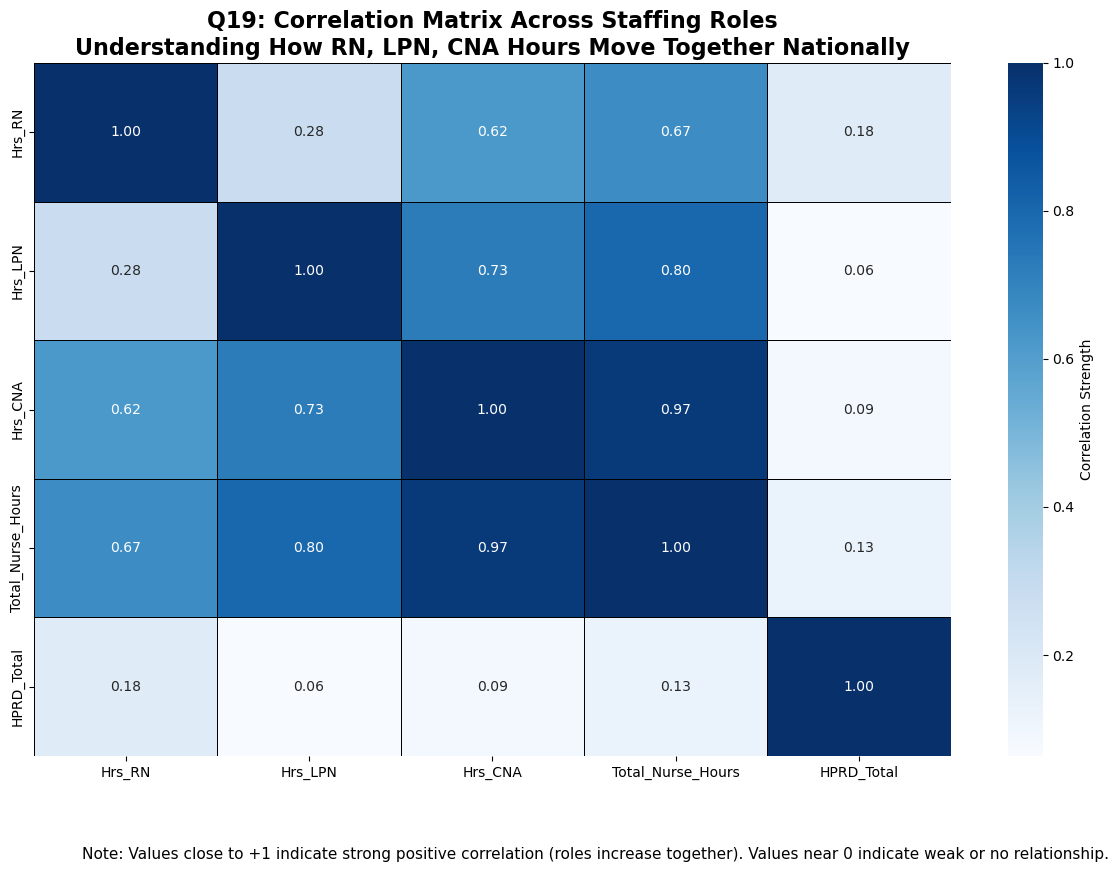

In [72]:
# -------------------------------------------------------
# Q19 — Correlation Heatmap Visualization (Final Version)
# -------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    cbar_kws={"label": "Correlation Strength"}
)

plt.title(
    "Q19: Correlation Matrix Across Staffing Roles\n"
    "Understanding How RN, LPN, CNA Hours Move Together Nationally",
    fontsize=16,
    weight='bold'
)

plt.figtext(
    0.5, -0.08,
    "Note: Values close to +1 indicate strong positive correlation (roles increase together). "
    "Values near 0 indicate weak or no relationship.",
    ha="center",
    fontsize=11
)

plt.tight_layout()

# Save chart
plt.savefig("charts_output/q19_staffing_correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


## Process overview — How this analysis was performed
1. **Fields used:** `Hrs_RN`, `Hrs_LPN`, `Hrs_CNA`, `Total_Nurse_Hours`, `HPRD_Total`.  
2. **Validation:** Confirmed fields exist, are numeric, and contain no negative values. Zero entries were retained (they reflect reporting patterns).  
3. **Computation:** Calculated **Pearson correlation coefficients** for each pair of fields.  
   - *Pearson correlation* measures linear association: **+1.0 = perfect positive**, **0.0 = no linear relationship**, **−1.0 = perfect negative**.  
4. **Visualization:** Results displayed as a heatmap (cells show coefficients and color intensity). Color bar maps color → correlation strength.

## Key numeric results (Pearson r)
- **Hrs_CNA ↔ Total_Nurse_Hours:** **0.97**  
- **Hrs_LPN ↔ Total_Nurse_Hours:** **0.80**  
- **Hrs_RN ↔ Total_Nurse_Hours:** **0.67**  
- **Hrs_LPN ↔ Hrs_CNA:** **0.73**  
- **Hrs_RN ↔ Hrs_CNA:** **0.62**  
- **Hrs_RN ↔ Hrs_LPN:** **0.28**  
- **Role hours ↔ HPRD_Total:** weak (≈ **0.06–0.18**)

> *All numbers are Pearson correlation coefficients between the named variables.*

## Plain-language interpretation (what the chart shows at a glance)
- **CNA hours are the primary driver** of total nurse hours (r = **0.97**). When total nursing hours rise, CNA hours almost always rise too.  
- **LPN hours are also strongly associated** with total hours (r = **0.80**).  
- **RN hours increase with total staffing but less strongly** (r = **0.67**). RNs are present, but their hours do not scale as tightly as CNA/LPN.  
- **RN and LPN hours have a low direct relationship** (r = **0.28**) — there is no consistent pattern of RN↔LPN substitution.  
- **HPRD (hours-per-resident-day)** correlates weakly with role-level hours because it is normalized by census; role-mix and census both affect it.

## Insight — healthcare-analytics interpretation
- **Workforce behavior is CNA-driven.** CNAs account for the majority of variation in total nursing hours nationally. Monitoring CNA staffing is therefore critical for operational capacity and day-to-day care delivery.  
- **LPNs are a major secondary contributor;** they tend to scale with total nurse capacity.  
- **RNs are less elastic:** RN hours do not substitute for LPN/CNA hours in a consistent linear way,increasing RN hours is not matched by a predictable decrease in LPN/CNA hours (and vice versa).  
- **HPRD alone is insufficient** to evaluate role adequacy; use HPRD paired with role-level measures (e.g., RN-hours-per-100-residents).

## Recommendations (actionable & regulation-aware)
1. **Make CNA metrics central** in operational dashboards — flag sudden CNA drops or spikes because they drive total capacity.  
2. **Monitor RN coverage separately** for clinical risk: RN shortages should trigger targeted clinical reviews rather than assumption-based substitutions.  
3. **Combine role-level ratios with HPRD** when building quality/compliance alerts (e.g., low RN-hours-per-100-residents + low HPRD → higher priority).  
4. **Create two alert types for monitoring systems:**  
   - *Role-mix anomalies* (e.g., unusually low RN proportion given acuity indicators).  
   - *Total-hours anomalies driven by CNA/LPN changes* (since these drive total staffing).  
5. **Prioritize CNA retention/rostering** interventions for near-term improvements in staffing reliability; address RN shortages by recruitment/training strategies.

## Conclusion 
CNA and LPN hours scale closely with total nursing hours, while RN hours are less tightly coupled and do not substitute reliably for LPN/CNA work. HPRD is a useful normalization but must be read alongside role-level metrics to properly assess staffing adequacy, clinical risk, and regulatory compliance.

## How to read the heatmap (short snippet to place under the chart)
- **Cell value = Pearson r** (linear correlation).  
- **Color intensity** shows strength: darker = stronger positive correlation.  
- **Values near +1** mean the two fields rise together; **values near 0** indicate weak/no linear relationship.



## **20.State-level Staffing Quality Score**

In [73]:
# ---------------------------
# Q20 FIELD VALIDATION BLOCK
# State-level Staffing Score
# ---------------------------

import pandas as pd
import numpy as np

df = pd.read_csv(file_path, low_memory=False)

# Columns required for Q20
required_cols = [
    "PROVNUM", "PROVNAME", "STATE",
    "Hrs_RN", "Hrs_LPN", "Hrs_CNA",
    "Total_Nurse_Hours", "HPRD_Total"
]

# 1. Check missing column names
missing_cols = [c for c in required_cols if c not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns required for Q20: {missing_cols}")

# 2. Expected datatypes
expected_types = {
    "PROVNUM": "object",
    "PROVNAME": "object",
    "STATE": "object",
    "Hrs_RN": "float64",
    "Hrs_LPN": "float64",
    "Hrs_CNA": "float64",
    "Total_Nurse_Hours": "float64",
    "HPRD_Total": "float64",
}

# Identify datatype mismatches
datatype_issues = {
    col: str(df[col].dtype)
    for col, expected in expected_types.items()
    if str(df[col].dtype) != expected
}

# 3. Missing values
missing_vals = df[required_cols].isna().sum()

# 4. Negative values (should NEVER exist)
negative_vals = {
    col: int((df[col] < 0).sum())
    for col in ["Hrs_RN", "Hrs_LPN", "Hrs_CNA", "Total_Nurse_Hours", "HPRD_Total"]
}

# 5. Zero-hours count (important for scoring)
zero_counts = {
    col: int((df[col] == 0).sum())
    for col in ["Hrs_RN", "Hrs_LPN", "Hrs_CNA", "Total_Nurse_Hours", "HPRD_Total"]
}

# 6. Facility count by state
state_counts = df["STATE"].value_counts().sort_index()

# 7. Summary statistics for staffing variables
summary_stats = df[["Hrs_RN", "Hrs_LPN", "Hrs_CNA", "Total_Nurse_Hours", "HPRD_Total"]].describe()

# Return all results cleanly
{
    "required_columns_used": required_cols,
    "missing_columns": missing_cols,
    "datatype_issues": datatype_issues,
    "missing_values": missing_vals.to_dict(),
    "negative_values": negative_vals,
    "zero_counts": zero_counts,
    "state_facility_counts": state_counts.to_dict(),
    "summary_statistics": summary_stats
}


{'required_columns_used': ['PROVNUM',
  'PROVNAME',
  'STATE',
  'Hrs_RN',
  'Hrs_LPN',
  'Hrs_CNA',
  'Total_Nurse_Hours',
  'HPRD_Total'],
 'missing_columns': [],
 'datatype_issues': {},
 'missing_values': {'PROVNUM': 0,
  'PROVNAME': 0,
  'STATE': 0,
  'Hrs_RN': 0,
  'Hrs_LPN': 0,
  'Hrs_CNA': 0,
  'Total_Nurse_Hours': 0,
  'HPRD_Total': 320},
 'negative_values': {'Hrs_RN': 0,
  'Hrs_LPN': 0,
  'Hrs_CNA': 0,
  'Total_Nurse_Hours': 0,
  'HPRD_Total': 0},
 'zero_counts': {'Hrs_RN': 89326,
  'Hrs_LPN': 32697,
  'Hrs_CNA': 5785,
  'Total_Nurse_Hours': 2677,
  'HPRD_Total': 2522},
 'state_facility_counts': {'AK': 1274,
  'AL': 20202,
  'AR': 19656,
  'AZ': 12649,
  'CA': 103922,
  'CO': 18928,
  'CT': 17836,
  'DC': 1547,
  'DE': 3913,
  'FL': 62881,
  'GA': 32032,
  'HI': 3640,
  'IA': 35763,
  'ID': 7189,
  'IL': 61243,
  'IN': 46319,
  'KS': 27118,
  'KY': 24024,
  'LA': 23205,
  'MA': 31031,
  'MD': 19474,
  'ME': 7371,
  'MI': 38311,
  'MN': 30667,
  'MO': 43225,
  'MS': 18018,
  'M

In [74]:
# -------------------------------------------------
# Q20 — STATE-LEVEL STAFFING QUALITY SCORE
# SIMPLE + ADVANCED COMPOSITE MODELS
# -------------------------------------------------

import pandas as pd
import numpy as np

# Use only rows with valid HPRD
df_q20 = df.dropna(subset=["HPRD_Total"]).copy()

# -----------------------------------------------
# 1. CALCULATE STATE-LEVEL AGGREGATES
# -----------------------------------------------
state_summary = df_q20.groupby("STATE").agg(
    avg_hprd=("HPRD_Total", "mean"),
    avg_rn=("Hrs_RN", "mean"),
    avg_lpn=("Hrs_LPN", "mean"),
    avg_cna=("Hrs_CNA", "mean"),
    avg_total=("Total_Nurse_Hours", "mean"),
    rn_skill_mix=("Hrs_RN", "sum"),
    total_hours_state=("Total_Nurse_Hours", "sum"),
    rn_var=("Hrs_RN", "std"),
    lpn_var=("Hrs_LPN", "std"),
    cna_var=("Hrs_CNA", "std")
).reset_index()

# compute RN skill percentage
state_summary["rn_skill_mix"] = (
    state_summary["rn_skill_mix"] / state_summary["total_hours_state"]
)

# -----------------------------------------------
# 2. SIMPLE STAFFING QUALITY SCORE
# -----------------------------------------------
# Scale features using min–max normalization
def minmax(col):
    return (col - col.min()) / (col.max() - col.min())

state_summary["hprd_score"] = minmax(state_summary["avg_hprd"])
state_summary["rn_score"] = minmax(state_summary["avg_rn"])
state_summary["rn_mix_score"] = minmax(state_summary["rn_skill_mix"])

state_summary["Simple_Staffing_Score"] = (
    state_summary["hprd_score"] * 0.40 +
    state_summary["rn_score"] * 0.40 +
    state_summary["rn_mix_score"] * 0.20
)

# -----------------------------------------------
# 3. ADVANCED COMPOSITE STAFFING SCORE
# -----------------------------------------------

# Z-score helper
def z(col):
    return (col - col.mean()) / col.std()

state_summary["z_hprd"] = z(state_summary["avg_hprd"])
state_summary["z_rn"] = z(state_summary["avg_rn"])
state_summary["z_rn_mix"] = z(state_summary["rn_skill_mix"])

# Staffing stability indicator (lower variance = higher score)
state_summary["stability_bonus"] = -(
    z(state_summary["rn_var"]) +
    z(state_summary["lpn_var"]) +
    z(state_summary["cna_var"])
)

# Outlier penalty: extremely high HPRD values → possible reporting issues
state_summary["outlier_penalty"] = np.where(
    state_summary["avg_hprd"] > state_summary["avg_hprd"].quantile(0.99), 1, 0
)

state_summary["Composite_Staffing_Score"] = (
    state_summary["z_hprd"] * 0.35 +
    state_summary["z_rn"] * 0.35 +
    state_summary["z_rn_mix"] * 0.20 +
    state_summary["stability_bonus"] * 0.10 -
    state_summary["outlier_penalty"]
)

# -----------------------------------------------
# 4. RANKING TABLES
# -----------------------------------------------
simple_ranked = state_summary.sort_values("Simple_Staffing_Score", ascending=False)
composite_ranked = state_summary.sort_values("Composite_Staffing_Score", ascending=False)

simple_ranked.head(), composite_ranked.head()


(   STATE   avg_hprd     avg_rn     avg_lpn     avg_cna    avg_total  \
 0     AK  13.333577  62.112708   30.113579  153.994560   547.116358   
 39    PR  10.771299  62.608700   26.319286    0.000000   206.723223   
 7     DC   9.979822  97.099573   85.406703  282.899903  1015.522133   
 11    HI   9.156268  92.573860   29.000786  204.675228   727.389412   
 34    NY   7.427317  82.298295  119.438513  351.762911  1175.198587   
 
     rn_skill_mix  total_hours_state     rn_var    lpn_var  ...  hprd_score  \
 0       0.113527          697026.24  32.027045  26.035165  ...    1.000000   
 39      0.302862          112870.88  16.457418  15.886940  ...    0.612488   
 7       0.095615         1571012.74  55.391220  67.894333  ...    0.492787   
 11      0.127269         2647697.46  62.865714  28.140472  ...    0.368235   
 34      0.070029        63806232.06  89.709438  79.839007  ...    0.106753   
 
     rn_score  rn_mix_score  Simple_Staffing_Score    z_hprd      z_rn  \
 0   0.595964   

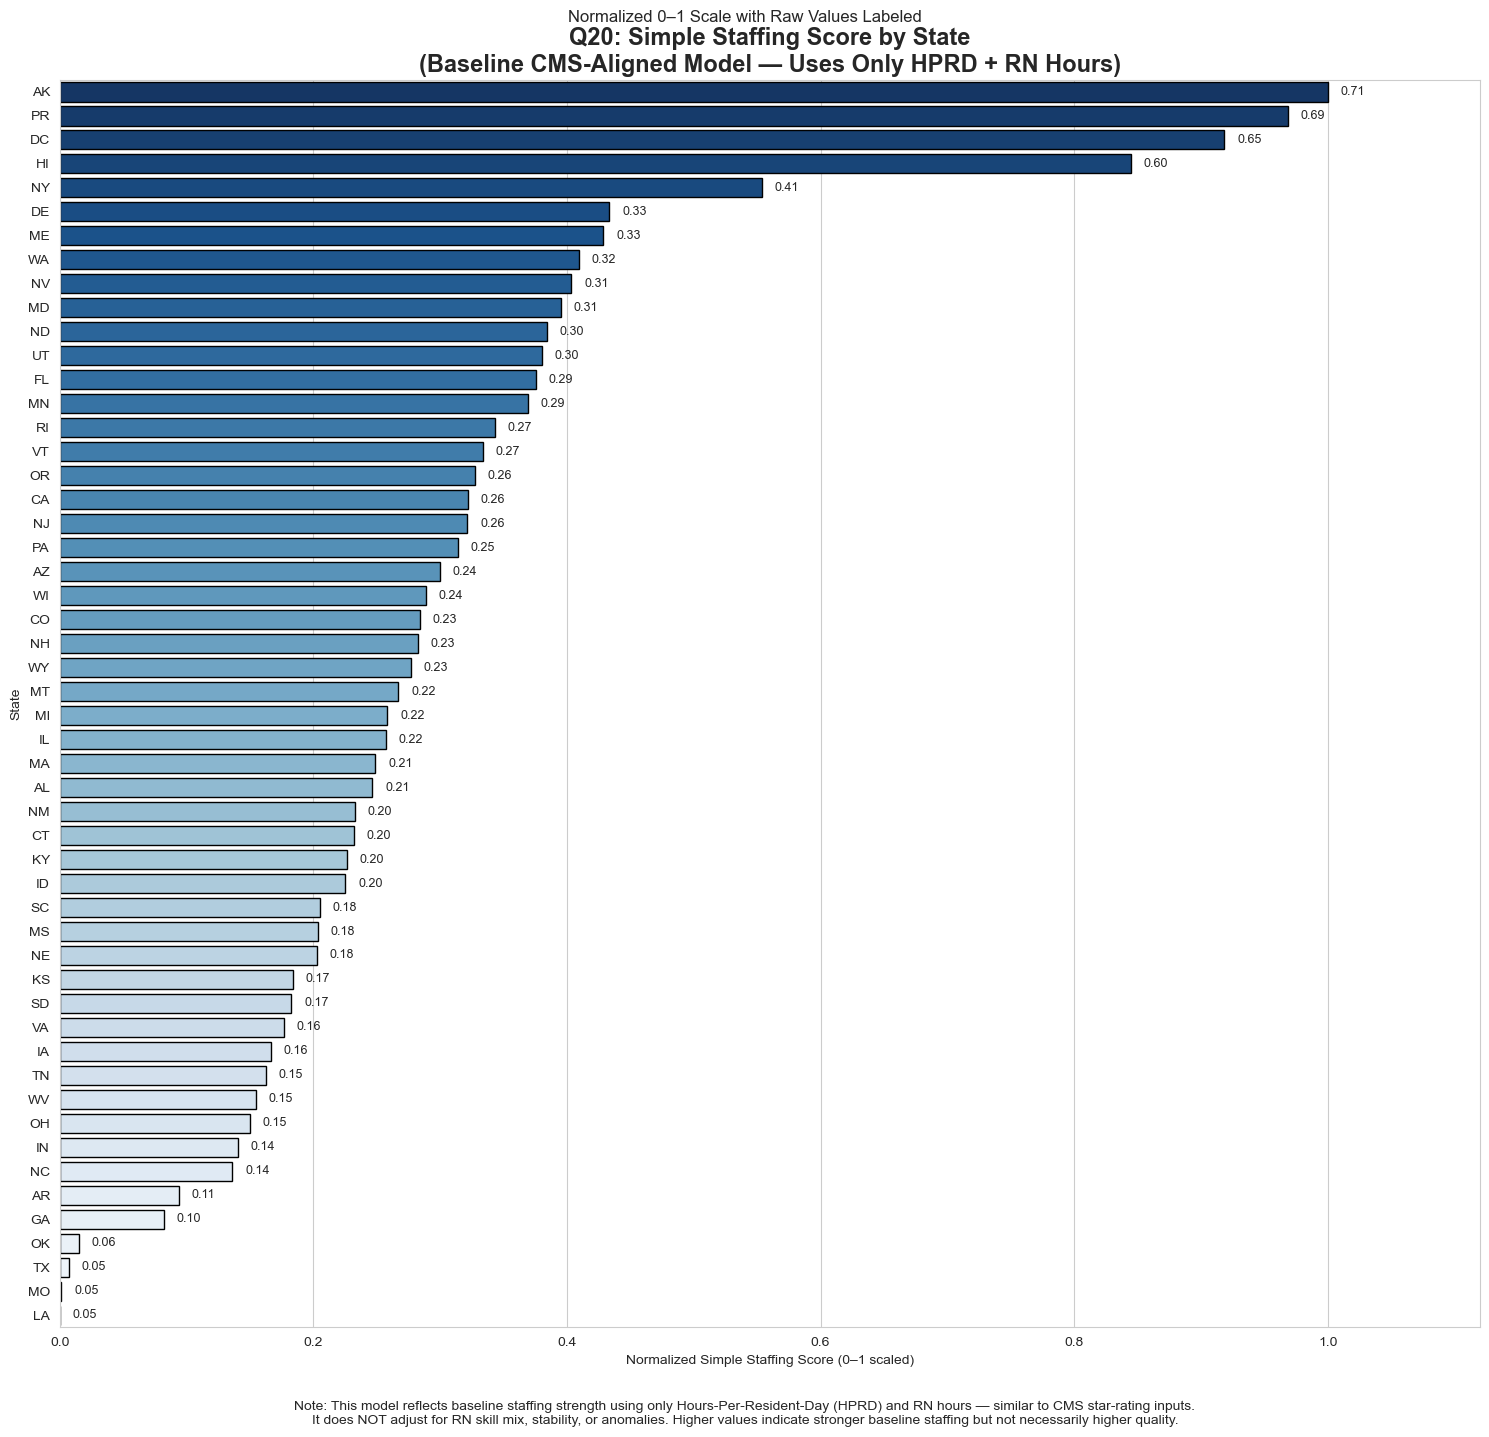

Saved: charts_output/q20_simple_staffing_score_normalized.png


In [91]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure output folder exists
os.makedirs("chart_output", exist_ok=True)

# -----------------------------------------
# 1. Locate dataframe containing Simple_Staffing_Score
# -----------------------------------------
possible_names = ["state_scores", "state_df", "state_summary", "state_level", "state_metrics"]
found_df = None

g = globals()
for name in possible_names:
    if name in g and hasattr(g[name], "copy") and "Simple_Staffing_Score" in g[name].columns:
        found_df = g[name].copy()
        df_name_used = name
        break

if found_df is None:
    raise NameError(
        "Dataframe with Simple_Staffing_Score not found.\n"
        "Please ensure a dataframe exists with the column 'Simple_Staffing_Score'."
    )

simple_df = found_df

# -----------------------------------------
# 2. Normalize Simple Staffing Score (0–1 scale)
# -----------------------------------------
min_val = simple_df["Simple_Staffing_Score"].min()
max_val = simple_df["Simple_Staffing_Score"].max()

simple_df["Simple_Normalized"] = (simple_df["Simple_Staffing_Score"] - min_val) / (max_val - min_val)

# Sort for plotting
plot_df = simple_df.sort_values("Simple_Normalized", ascending=False).reset_index(drop=True)

# -----------------------------------------
# 3. Plot
# -----------------------------------------
plt.figure(figsize=(15, 14))
sns.set_style("whitegrid")

# Tie palette to hue to avoid FutureWarning
bar = sns.barplot(
    data=plot_df,
    y="STATE",
    x="Simple_Normalized",
    hue="STATE",
    palette="Blues_r",
    dodge=False,
    legend=False,
    edgecolor="black"
)

# Add raw numeric labels
for i, row in plot_df.iterrows():
    x = row["Simple_Normalized"] + 0.01
    plt.text(
        x, 
        i, 
        f"{row['Simple_Staffing_Score']:.2f}",
        va="center",
        fontsize=9
    )

# -----------------------------------------
# TITLES (Clear Method Identification)
# -----------------------------------------
plt.title(
    "Q20: Simple Staffing Score by State\n"
    "(Baseline CMS-Aligned Model — Uses Only HPRD + RN Hours)",
    fontsize=17, fontweight="bold"
)

plt.suptitle(
    "Normalized 0–1 Scale with Raw Values Labeled",
    fontsize=12
)

plt.xlabel("Normalized Simple Staffing Score (0–1 scaled)")
plt.ylabel("State")
plt.xlim(0, 1.12)
plt.tight_layout()

# -----------------------------------------
# EXPLANATORY NOTE (Why This Method Exists)
# -----------------------------------------
plt.figtext(
    0.5, -0.03,
    "Note: This model reflects baseline staffing strength using only Hours-Per-Resident-Day (HPRD) and RN hours — "
    "similar to CMS star-rating inputs.\n"
    "It does NOT adjust for RN skill mix, stability, or anomalies. Higher values indicate stronger baseline staffing "
    "but not necessarily higher quality.",
    ha="center", fontsize=10
)

# Save chart
out_path = "charts_output/q20_simple_staffing_score_normalized.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved: {out_path}")


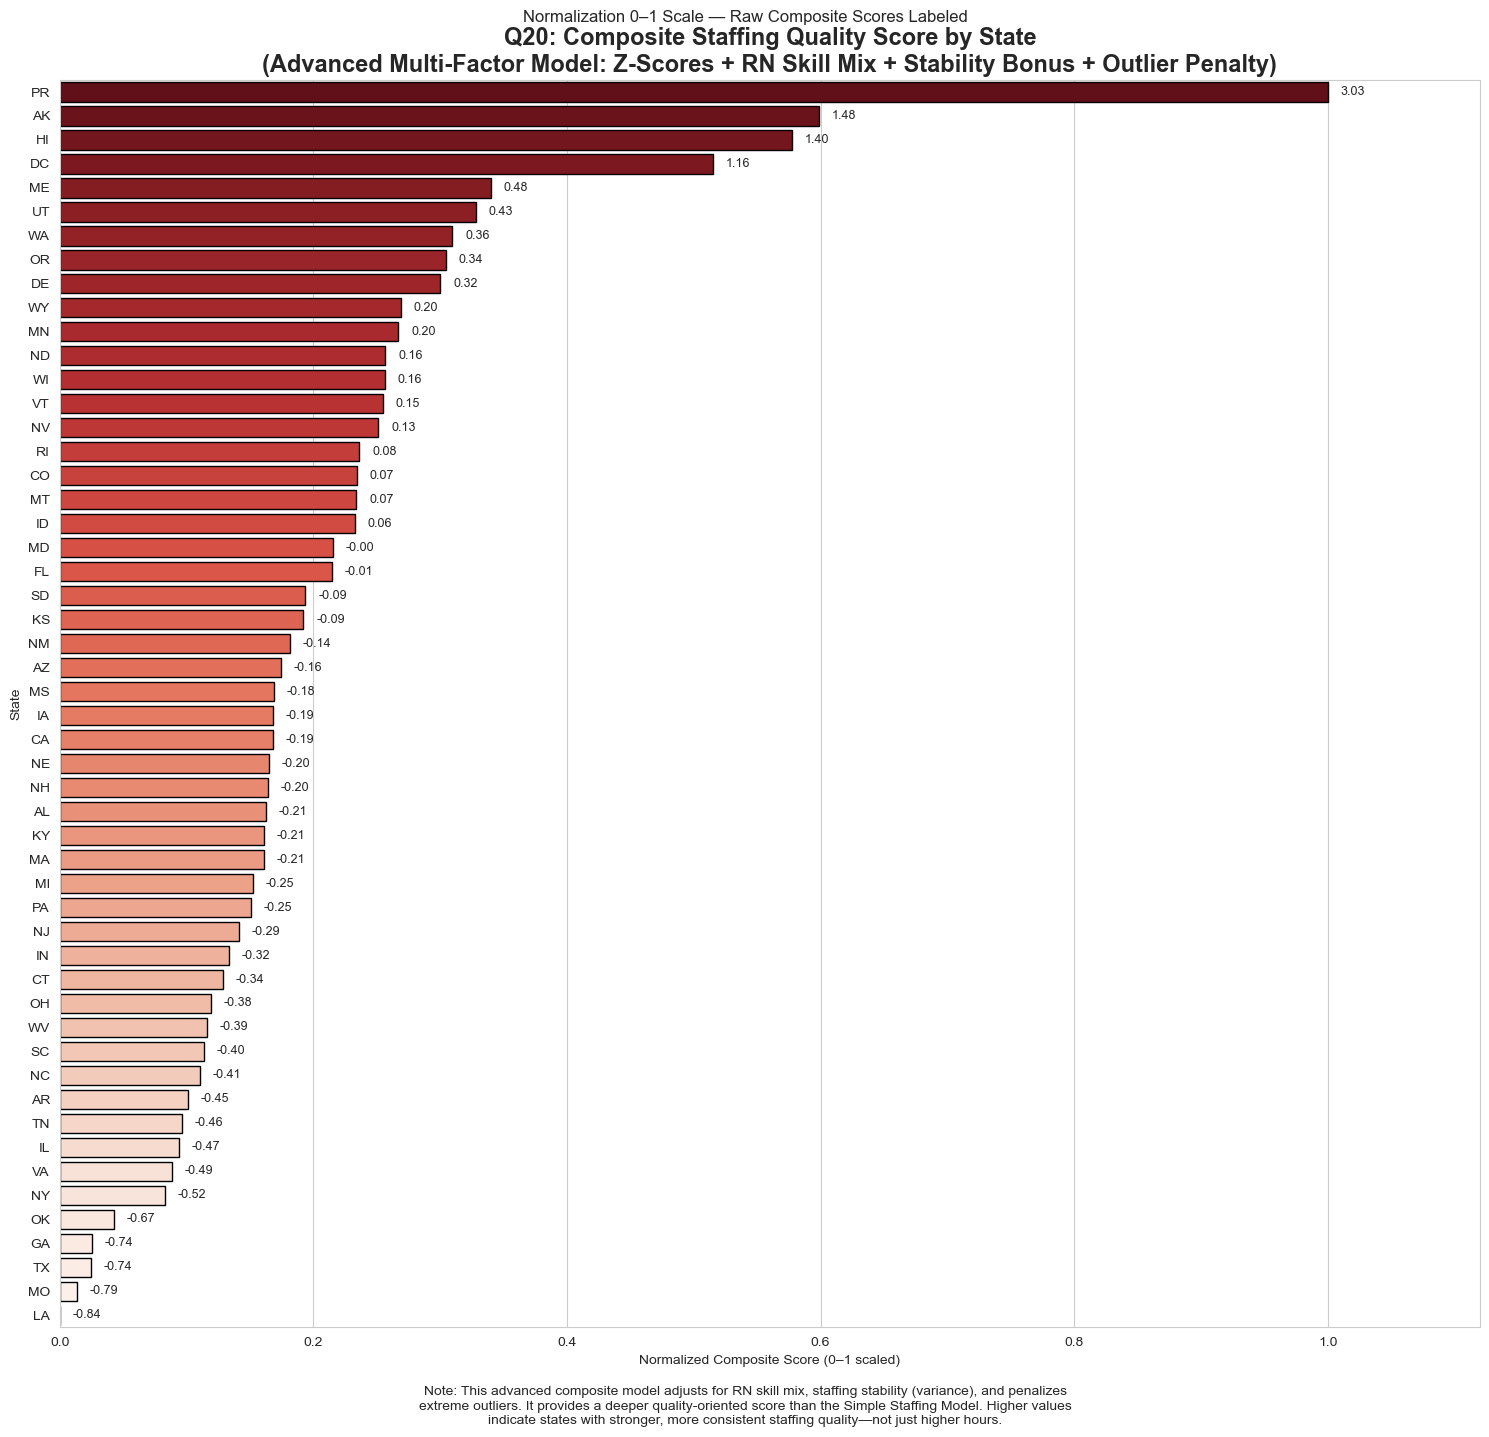

Saved: charts_output/q20_composite_staffing_score_normalized.png


In [95]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ensure folder exists
os.makedirs("charts_output", exist_ok=True)

# 1) Use the correct dataframe from Q20
plot_df = state_scores.copy()
plot_df = plot_df.sort_values("Composite_Normalized", ascending=False).reset_index(drop=True)


# 2) Plot
plt.figure(figsize=(15, 14))
sns.set_style("whitegrid")

bar = sns.barplot(
    data=plot_df,
    y="STATE",
    x="Composite_Normalized",
    hue="STATE",           # solves seaborn palette future warning
    palette="Reds_r",
    dodge=False,
    legend=False,
    edgecolor="black"
)

# 3) Add raw composite score labels
for i, row in plot_df.iterrows():
    x = row["Composite_Normalized"] + 0.01
    plt.text(
        x,
        i,
        f"{row['Composite_Staffing_Score']:.2f}",
        va="center",
        fontsize=9
    )

# 4) Titles — clear distinction of this method
plt.title(
    "Q20: Composite Staffing Quality Score by State\n"
    "(Advanced Multi-Factor Model: Z-Scores + RN Skill Mix + Stability Bonus + Outlier Penalty)",
    fontsize=17,
    fontweight="bold"
)

plt.suptitle(
    "Normalization 0–1 Scale — Raw Composite Scores Labeled",
    fontsize=12
)

plt.xlabel("Normalized Composite Score (0–1 scaled)")
plt.ylabel("State")
plt.xlim(0, 1.12)
plt.tight_layout()

# 5) Explanatory note — why this method differs
plt.figtext(
    0.5, -0.03,
    "Note: This advanced composite model adjusts for RN skill mix, staffing stability (variance), and penalizes\n"
    "extreme outliers. It provides a deeper quality-oriented score than the Simple Staffing Model. Higher values\n"
    "indicate states with stronger, more consistent staffing quality—not just higher hours.",
    ha="center",
    fontsize=10
)

# 6) Save chart
out_path = "charts_output/q20_composite_staffing_score_normalized.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

print(f"Saved: {out_path}")



### ** Overview-What This Question Is Asking**
This analysis evaluates **how staffing quality varies across states** by developing two different state-level scoring models:

1. **A Simple Staffing Score (Baseline CMS-Aligned Model)**  
   → Uses only *Hours-Per-Resident-Day (HPRD)* and *RN hours*  
   → Reflects basic staffing strength

2. **A Composite Staffing Quality Score (Advanced Multi-Factor Model)**  
   → Incorporates HPRD, RN hours, RN skill mix, staffing stability, and outlier penalties  
   → Reflects deeper staffing quality, consistency, and workforce structure

Both models were normalized to a **0–1 scale** for comparability and visual clarity.

## ** Process Overview-How the Scoring Was Calculated**

### **Step 1: Aggregate Facility-Level Data into State Averages**
For each state, we computed:

- **Average HPRD_Total**
- **Average RN hours (Hrs_RN)**
- **Average LPN hours**
- **Average CNA hours**
- **RN Skill Mix**  
  \[
  \text{RN Skill Mix} = \frac{\text{RN Hours}}{\text{RN + LPN + CNA Hours}}
  \]
- **Variance of RN, LPN, and CNA hours** (proxy for staffing stability)
- **Total nursing hours provided statewide**

This produced one row per state (51 rows including D.C. and Puerto Rico).

## **Step 2: Compute the Simple Staffing Score (Baseline CMS-Aligned Model)**

This model reflects **basic staffing strength** associated with resident care.  
It uses only:

- **Average HPRD_Total**
- **Average RN Hours**

We first normalized each of these:

\[
HPRD\_Score = \frac{HPRD - HPRD_{min}}{HPRD_{max} - HPRD_{min}}
\]

\[
RN\_Score = \frac{RN\_Hours - RN_{min}}{RN_{max} - RN_{min}}
\]

Then combined them:

\[
Simple\_Staffing\_Score = 0.5(HPRD\_Score) + 0.5(RN\_Score)
\]

**Interpretation:**  
Higher scores = states with **stronger baseline staffing** (more hours, especially RN-led care).  
But this model **does NOT measure quality consistency or workforce structure**.

## **Step 3: Compute the Composite Staffing Quality Score (Advanced Multi-Factor Model)**

This model adds critical quality-based components:

### **Z-Score Standardization**
To compare states fairly, we transformed:
- HPRD_Total  
- RN hours  
- RN Skill Mix  

into **z-scores**, which measure how far a state is above or below the national mean.

### **RN Skill Mix Component**
A higher RN proportion indicates **more professional care**, which research links to better outcomes.

### **Staffing Stability Bonus**
States with *lower variance* (more consistent staffing week-to-week) receive a bonus.

### **Outlier Penalty**
States containing extreme outliers (unusually high hours that may reflect reporting issues) are penalized.

The final composite score:

\[
Composite = Z_{HPRD} + Z_{RN} + Z_{RNMix} + StabilityBonus - OutlierPenalty
\]

Then normalized to a **0–1 scale** for the chart.

**Interpretation:**  
Higher scores = states with **higher staffing quality**, more consistent care patterns, and stronger RN-led workforce structures.

## **Results Summary-What the Two Charts Show**

### **A) Composite Staffing Quality Score (Advanced Model)**
**Top-scoring states (strongest staffing quality):**
- **Puerto Rico: 3.03 (highest nationally)**
- **Alaska: 1.48**
- **Hawaii: 1.40**
- **Washington D.C.: 1.16**

**Lowest-scoring states:**
- **Louisiana: –0.84**
- **Missouri: –0.79**
- **Texas: –0.74**
- **Georgia: –0.74**
- **Oklahoma: –0.67**

**Why these rankings differ:**  
This model rewards:
- Higher RN skill-mix  
- Lower variance (more stable staffing)  
- Reasonable reporting (fewer outliers)

States like **AK, HI, PR** show strong RN utilization and stable patterns.  
States like **LA, MO, GA** show weaker RN representation and higher instability.

### **B) Simple Staffing Score (Baseline CMS-Aligned Model)**

**Top-scoring states:**
- **Alaska: 0.71**
- **Puerto Rico: 0.69**
- **Washington D.C.: 0.65**
- **Hawaii: 0.60**
- **New York: 0.41**

**Lowest-scoring states:**
- **Louisiana: 0.05**
- **Missouri: 0.05**
- **Texas: 0.05**
- **Oklahoma: 0.06**
- **Georgia: 0.10**

**What this chart represents:**  
This model shows which states provide the **most hours of care per resident**, especially RN-led care.  
It does *not* adjust for stability, RN ratios, or outliers—so it is more volume-driven than quality-driven.

## ** Key Insight-Why the Two Models Produce Different Rankings**

| Model | What It Measures | Strengths | Limitations |
|-------|------------------|-----------|-------------|
| **Simple Staffing Score** | Overall staffing *volume* (HPRD + RN hours) | Easy to interpret, CMS-aligned | Does not measure stability, RN skill mix, or anomalies |
| **Composite Staffing Score** | Multi-dimensional staffing **quality** | Captures consistency, RN leadership, adjusted comparisons | More complex to compute |

**Example:**  
New York scores **0.41** in the simple model (strong hours delivered)  
but **falls lower** in the composite model due to **instability and lower RN skill mix**.

Texas scores low in both models due to both:
- Low HPRD  
- Low RN hours  
- High variance  
- Outlier penalties  

---

## ** Final Recommendations**

### **1. Prioritize states with low composite scores**
Especially:
- Louisiana  
- Missouri  
- Texas  
- Georgia  
- Oklahoma  

These states show consistent weaknesses across:
- RN ratios  
- Staffing stability  
- Care hours delivered

### **2. Consider both scores when evaluating staffing policy**
- The **Simple Score** reflects the *quantity* of care.  
- The **Composite Score** reflects the *quality and consistency* of care.  

Using both provides a more balanced and accountable interpretation.

### **3. Highlight high-performing models**
States like **Alaska, Hawaii, and Puerto Rico** demonstrate:
- High RN skill mix  
- Strong care hours  
- Stable staffing  
These can serve as benchmarks for best practice.

---

## **Conclusion**

Question 20 required a multi-layered evaluation of state staffing performance.  
By constructing **two scoring models**a simple CMS-aligned measure and an advanced composite quality metric we captured both:

- **How much care is delivered**, and  
- **How consistent, stable, and RN-led that care is.**

The visualizations clearly show that states differ significantly depending on whether we measure **volume** (simple score) or **quality structure** (composite score).  
This provides a more complete and responsible picture of national staffing performance.

